# Telecom Churn Case Study

# Introduction And Problem Statement

# Business problem overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become more important than customer acquisition.

For many incumbent operators, retaining highly profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which highly profitable customers are at risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 
# Understanding and defining churn

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe and North America.

 
This project is based on the Indian and Southeast Asian market.

 
# Definitions of churn

There are various ways to define churn, such as:

# Revenue-based churn:
Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 
# Usage-based churn: 
Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.


In this project, you will use the usage-based definition to define churn.

 
# High-value churn

In the Indian and Southeast Asian markets, approximately 80% of revenue comes from the top 20% of customers (called high-value customers). Thus, if we can reduce the churn of high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

In [1]:
##To capture processing time of the script
import time
start = time.time()

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import VarianceThreshold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, auc, roc_auc_score
import sys
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from collections import OrderedDict
from itertools import islice

In [3]:
##Importing dataset
df = pd.read_csv('telecom_churn_data.csv')
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

## Inspecting Dataset

In [4]:
df.shape

(99999, 226)

In [5]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [7]:
# Mobile number is insignificant, thus dropping it. Circle ID has same value for all rows thus not necessary.
df1 = df.copy()   #Backup
df1.drop('mobile_number',inplace=True,axis=1)
df1.drop('circle_id',inplace=True,axis=1)

In [8]:
# Checking for Null values
round(100*(df.isnull().sum()/len(df.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [9]:
#Filtering high value customers
#Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount 
#in the first two months (the good phase).

df1['total_rech_amt_good_phase'] = (df1['total_rech_amt_6'] + df1['total_rech_amt_7'])/2  #Good Phase
df1 = df1[df1['total_rech_amt_good_phase'] > df1['total_rech_amt_good_phase'].quantile(0.70)]
df1['total_usage_col'] = df1['total_og_mou_9'] + df1['total_ic_mou_9'] + df1['vol_2g_mb_9'] + df1['vol_3g_mb_9']
df1['churn'] = np.where(df1['total_usage_col']== 0, 1, 0)

In [10]:
#Checking the percentage of Churns for high value customers
df1['churn'].value_counts(normalize=True)*100

churn
0    91.363955
1     8.636045
Name: proportion, dtype: float64

It is a highly imbalanced dataset

In [11]:
#Dropping the column created for filtration only
df1.drop(['total_rech_amt_good_phase','total_usage_col'],axis=1,inplace=True)
df1.shape

(29979, 225)

In [12]:
#After tagging churners, removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)
df1.drop([col for col in df1.columns if '_9' in col], axis = 1,inplace=True)
df1.drop('sep_vbc_3g', axis=1,inplace=True)
df1.shape

(29979, 170)

In [13]:
#Removing Last Date of Month columns since they add no value to the churn logic and have zero variance
df1.drop([col for col in df1.columns if 'last_date_of_month' in col], axis = 1,inplace=True)
df1.shape

(29979, 167)

In [14]:
#Checking remaining non numeric columns, and convert datetime columns to Datetime type
dt_cols = df1.select_dtypes(exclude=[np.number]).columns.tolist()
df1[dt_cols] = df1[dt_cols].apply(pd.to_datetime)

In [15]:
#Removing all columns which has zero variance and does not aid in the churn prediction
df1_temp = df1.drop(dt_cols,axis=1)
selector = VarianceThreshold(0)
selector.fit(df1_temp)
filtered_columns = df1_temp.columns[selector.get_support(indices=True)]
df2 = df1[filtered_columns]
df2[dt_cols] = df1[dt_cols]

#List of columns removed for zero variance
df1_temp.columns[~selector.get_support(indices=False)]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [16]:
#Populating the missing dates for data with the last original recharge 
df2['date_of_last_rech_data_6'].fillna(df2['date_of_last_rech_6'],inplace=True)
df2['date_of_last_rech_data_7'].fillna(df2['date_of_last_rech_7'],inplace=True)
df2['date_of_last_rech_data_8'].fillna(df2['date_of_last_rech_8'],inplace=True)

df2['date_of_last_rech_6'] = pd.to_datetime(df2.date_of_last_rech_6).dt.day
df2['date_of_last_rech_7'] = pd.to_datetime(df2.date_of_last_rech_7).dt.day
df2['date_of_last_rech_8'] = pd.to_datetime(df2.date_of_last_rech_8).dt.day
df2['date_of_last_rech_data_6'] = pd.to_datetime(df2.date_of_last_rech_data_6).dt.day
df2['date_of_last_rech_data_7'] = pd.to_datetime(df2.date_of_last_rech_data_7).dt.day
df2['date_of_last_rech_data_8'] = pd.to_datetime(df2.date_of_last_rech_data_8).dt.day

In [17]:
#Now populating the date column with their modes for the few missing values
for i in dt_cols:
    df2[i].fillna(df2[i].mode()[0],inplace=True)
    
#Populating FB User Nulls with -1, assuming no facebook usage and no night packs taken
df2['fb_user_6'].fillna(-1,inplace=True)
df2['fb_user_7'].fillna(-1,inplace=True)
df2['fb_user_8'].fillna(-1,inplace=True)
df2['night_pck_user_6'].fillna(-1,inplace=True)
df2['night_pck_user_7'].fillna(-1,inplace=True)
df2['night_pck_user_8'].fillna(-1,inplace=True)

#In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
               'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
               'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8' ]
df2[zero_impute] = df2[zero_impute].apply(lambda x: x.fillna(0))

In [18]:
# Checking for Null values again
round(100*(df2.isnull().sum()/len(df2.index)), 2)

arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.05
onnet_mou_7                  1.01
onnet_mou_8                  3.13
offnet_mou_6                 1.05
offnet_mou_7                 1.01
offnet_mou_8                 3.13
roam_ic_mou_6                1.05
roam_ic_mou_7                1.01
roam_ic_mou_8                3.13
roam_og_mou_6                1.05
roam_og_mou_7                1.01
roam_og_mou_8                3.13
loc_og_t2t_mou_6             1.05
loc_og_t2t_mou_7             1.01
loc_og_t2t_mou_8             3.13
loc_og_t2m_mou_6             1.05
loc_og_t2m_mou_7             1.01
loc_og_t2m_mou_8             3.13
loc_og_t2f_mou_6             1.05
loc_og_t2f_mou_7             1.01
loc_og_t2f_mou_8             3.13
loc_og_t2c_mou_6             1.05
loc_og_t2c_mou_7             1.01
loc_og_t2c_mou_8             3.13
loc_og_mou_6                 1.05
loc_og_mou_7                 1.01
loc_og_mou_8  

In [19]:
#Dropping columns with veru high Null Values
drop_cols = ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8', 'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
            'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8']
df2.drop(drop_cols,axis=1,inplace=True)
round(100*(df2.isnull().sum()/len(df2.index)), 2)

arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
onnet_mou_6                 1.05
onnet_mou_7                 1.01
onnet_mou_8                 3.13
offnet_mou_6                1.05
offnet_mou_7                1.01
offnet_mou_8                3.13
roam_ic_mou_6               1.05
roam_ic_mou_7               1.01
roam_ic_mou_8               3.13
roam_og_mou_6               1.05
roam_og_mou_7               1.01
roam_og_mou_8               3.13
loc_og_t2t_mou_6            1.05
loc_og_t2t_mou_7            1.01
loc_og_t2t_mou_8            3.13
loc_og_t2m_mou_6            1.05
loc_og_t2m_mou_7            1.01
loc_og_t2m_mou_8            3.13
loc_og_t2f_mou_6            1.05
loc_og_t2f_mou_7            1.01
loc_og_t2f_mou_8            3.13
loc_og_t2c_mou_6            1.05
loc_og_t2c_mou_7            1.01
loc_og_t2c_mou_8            3.13
loc_og_mou_6                1.05
loc_og_mou_7                1.01
loc_og_mou_8                3.13
std_og_t2t

## Imputing Values using KNN Imputer

In [20]:
 date_cols = ['last_date_of_month_6',
              'last_date_of_month_7',
              'last_date_of_month_8',
              'date_of_last_rech_6',
              'date_of_last_rech_7',
              'date_of_last_rech_8',
              'date_of_last_rech_data_6',
              'date_of_last_rech_data_7',
              'date_of_last_rech_data_8',
             ]
#Using Iterative Imputer or KNN to impute missing values
df2_temp = df2.drop(dt_cols,axis=1)
imputer = IterativeImputer(random_state=0)
imputer = KNNImputer()
df2_temp[:]= imputer.fit_transform(df2_temp)
imputed_cols = df2_temp.columns
df2[imputed_cols] = df2_temp
round(100*(df2.isnull().sum()/len(df2.index)), 2)

arpu_6                      0.0
arpu_7                      0.0
arpu_8                      0.0
onnet_mou_6                 0.0
onnet_mou_7                 0.0
onnet_mou_8                 0.0
offnet_mou_6                0.0
offnet_mou_7                0.0
offnet_mou_8                0.0
roam_ic_mou_6               0.0
roam_ic_mou_7               0.0
roam_ic_mou_8               0.0
roam_og_mou_6               0.0
roam_og_mou_7               0.0
roam_og_mou_8               0.0
loc_og_t2t_mou_6            0.0
loc_og_t2t_mou_7            0.0
loc_og_t2t_mou_8            0.0
loc_og_t2m_mou_6            0.0
loc_og_t2m_mou_7            0.0
loc_og_t2m_mou_8            0.0
loc_og_t2f_mou_6            0.0
loc_og_t2f_mou_7            0.0
loc_og_t2f_mou_8            0.0
loc_og_t2c_mou_6            0.0
loc_og_t2c_mou_7            0.0
loc_og_t2c_mou_8            0.0
loc_og_mou_6                0.0
loc_og_mou_7                0.0
loc_og_mou_8                0.0
std_og_t2t_mou_6            0.0
std_og_t

In [21]:
############In case the above imputaion is heavy run the below script for median imputation
#Filing missing values with the median
missing_cols = df2.columns[df2.isnull().sum()>0]
for col in missing_cols:
    df2[col].fillna((df2[col].median()), inplace=True)
round(100*(df2.isnull().sum()/len(df2.index)), 2) 

arpu_6                      0.0
arpu_7                      0.0
arpu_8                      0.0
onnet_mou_6                 0.0
onnet_mou_7                 0.0
onnet_mou_8                 0.0
offnet_mou_6                0.0
offnet_mou_7                0.0
offnet_mou_8                0.0
roam_ic_mou_6               0.0
roam_ic_mou_7               0.0
roam_ic_mou_8               0.0
roam_og_mou_6               0.0
roam_og_mou_7               0.0
roam_og_mou_8               0.0
loc_og_t2t_mou_6            0.0
loc_og_t2t_mou_7            0.0
loc_og_t2t_mou_8            0.0
loc_og_t2m_mou_6            0.0
loc_og_t2m_mou_7            0.0
loc_og_t2m_mou_8            0.0
loc_og_t2f_mou_6            0.0
loc_og_t2f_mou_7            0.0
loc_og_t2f_mou_8            0.0
loc_og_t2c_mou_6            0.0
loc_og_t2c_mou_7            0.0
loc_og_t2c_mou_8            0.0
loc_og_mou_6                0.0
loc_og_mou_7                0.0
loc_og_mou_8                0.0
std_og_t2t_mou_6            0.0
std_og_t

In [22]:
df2.shape

(29979, 146)

## Outlier Treatment

In [23]:
#Outlier Treatment
df2.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean     587.587624    589.424681    535.067748    296.835912    304.996754   
std      442.848876    463.049067    492.447887    460.749854    481.757510   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
1%        18.221200     25.600600      0.000000      0.000000      0.000000   
10%      270.692200    274.458200    134.118600     11.810000     11.240000   
25%      364.352500    365.235000    289.782000     42.230000     41.685000   
50%      495.951000    493.781000    452.232000    126.190000    125.790000   
75%      704.184500    700.986000    671.349500    353.620000    360.520000   
90%      994.311800    996.051400    985.499200    795.426000    825.486000   
95%     1240.976700   1261.848400   1258.703300   1155.531000   1208.691000   
99%     1983.590100   1999.509680   1988.082260   2166.876000   2220.577600   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29979.000000  29979.000000  29979.000000  29979.000000   29979.000000   
mean     268.862748    419.278555    424.968389    377.124879      17.642917   
std      466.270239    470.013703    486.093643    476.404104      79.444043   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
1%         0.000000      1.057800      1.099000      0.000000       0.000000   
10%        6.130000     56.438000     57.010000     29.072000       0.000000   
25%       29.235000    138.600000    136.410000     98.680000       0.000000   
50%      100.330000    282.840000    282.260000    241.530000       0.000000   
75%      298.520000    523.710000    532.905000    483.180000       0.000000   
90%      724.182000    916.532000    935.716000    854.006000      33.510000   
95%     1115.857000   1271.757000   1287.221000   1188.523000      95.436000   
99%     2189.445800   2328.192600   2411.004400   2212.303000     350.541800   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29979.000000   29979.000000   29979.000000   29979.000000   
mean       13.678924      13.569606      29.678317      22.255601   
std        76.431379      74.649304     118.918666      98.047653   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        18.994000      20.610000      66.182000      42.380000   
95%        64.068000      64.785000     170.063000     120.080000   
99%       293.756000     288.536400     545.332000     448.902000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   29979.000000      29979.000000      29979.000000      29979.000000   
mean       21.904479         94.890101         95.968307         87.590138   
std       106.340653        236.909094        248.207858        234.767600   
min         0.000000          0.000000          0.000000          0.000000   
1%          0.000000          0.000000          0.000000          0.000000   
10%         0.000000          1.110000          1.400000          0.238000   
25%         0.000000          8.650000          9.430000          6.580000   
50%         0.000000         32.810000         33.360000         29.130000   
75%         0.000000         91.570000         91.710000         84.790000   
90%        38.898000        208.006000

There are outliers present

In [24]:
#Capping to 99%
for col in df2.columns:
    percentiles = df2[col].quantile([0.01,0.99]).values
    df2[col][df2[col] <= percentiles[0]] = percentiles[0]
    df2[col][df2[col] >= percentiles[1]] = percentiles[1]

In [25]:
df2.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean     578.115790    579.934200    524.618925    288.155041    295.690812   
std      336.036348    338.202040    370.788082    404.919913    419.746361   
min       18.221200     25.600600      0.000000      0.000000      0.000000   
1%        18.228064     25.732732      0.000000      0.000000      0.000000   
10%      270.692200    274.458200    134.118600     11.810000     11.240000   
25%      364.352500    365.235000    289.782000     42.230000     41.685000   
50%      495.951000    493.781000    452.232000    126.190000    125.790000   
75%      704.184500    700.986000    671.349500    353.620000    360.520000   
90%      994.311800    996.051400    985.499200    795.426000    825.486000   
95%     1240.976700   1261.848400   1258.703300   1155.531000   1208.691000   
99%     1983.254622   1999.502130   1988.059437   2166.652920   2220.563872   
max     1983.590100   1999.509680   1988.082260   2166.876000   2220.577600   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29979.000000  29979.000000  29979.000000  29979.000000   29979.000000   
mean     259.591203    411.499382    416.386720    367.177624      15.020708   
std      399.823950    421.136852    430.337399    404.379761      51.536100   
min        0.000000      1.057800      1.099000      0.000000       0.000000   
1%         0.000000      1.059516      1.107580      0.000000       0.000000   
10%        6.130000     56.438000     57.010000     29.072000       0.000000   
25%       29.235000    138.600000    136.410000     98.680000       0.000000   
50%      100.330000    282.840000    282.260000    241.530000       0.000000   
75%      298.520000    523.710000    532.905000    483.180000       0.000000   
90%      724.182000    916.532000    935.716000    854.006000      33.510000   
95%     1115.857000   1271.757000   1287.221000   1188.523000      95.436000   
99%     2189.207276   2326.763172   2410.915168   2212.191460     350.423396   
max     2189.445800   2328.192600   2411.004400   2212.303000     350.541800   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29979.000000   29979.000000   29979.000000   29979.000000   
mean       10.797230      10.904976      25.923002      18.823012   
std        41.008021      40.520233      83.801632      65.949856   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        18.994000      20.610000      66.182000      42.380000   
95%        64.068000      64.785000     170.063000     120.080000   
99%       293.618720     288.515808     545.314840     448.455840   
max       293.756000     288.536400     545.332000     448.902000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   29979.000000      29979.000000      29979.000000      29979.000000   
mean       18.010232         86.810965         86.796512         79.110203   
std        62.941939        160.043702        158.099964        144.569857   
min         0.000000          0.000000          0.000000          0.000000   
1%          0.000000          0.000000          0.000000          0.000000   
10%         0.000000          1.110000          1.400000          0.238000   
25%         0.000000          8.650000          9.430000          6.580000   
50%         0.000000         32.810000         33.360000         29.130000   
75%         0.000000         91.570000         91.710000         84.790000   
90%        38.898000        208.006000

Calculate difference between 8th and previous months
Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

# Feature Engineering

In [26]:
df2['arpu_diff'] = df2.arpu_8 - ((df2.arpu_6 + df2.arpu_7)/2)
df2['onnet_mou_diff'] = df2.onnet_mou_8 - ((df2.onnet_mou_6 + df2.onnet_mou_7)/2)
df2['offnet_mou_diff'] = df2.offnet_mou_8 - ((df2.offnet_mou_6 + df2.offnet_mou_7)/2)
df2['roam_ic_mou_diff'] = df2.roam_ic_mou_8 - ((df2.roam_ic_mou_6 + df2.roam_ic_mou_7)/2)
df2['roam_og_mou_diff'] = df2.roam_og_mou_8 - ((df2.roam_og_mou_6 + df2.roam_og_mou_7)/2)
df2['loc_og_mou_diff'] = df2.loc_og_mou_8 - ((df2.loc_og_mou_6 + df2.loc_og_mou_7)/2)
df2['std_og_mou_diff'] = df2.std_og_mou_8 - ((df2.std_og_mou_6 + df2.std_og_mou_7)/2)
df2['isd_og_mou_diff'] = df2.isd_og_mou_8 - ((df2.isd_og_mou_6 + df2.isd_og_mou_7)/2)
df2['spl_og_mou_diff'] = df2.spl_og_mou_8 - ((df2.spl_og_mou_6 + df2.spl_og_mou_7)/2)
df2['total_og_mou_diff'] = df2.total_og_mou_8 - ((df2.total_og_mou_6 + df2.total_og_mou_7)/2)
df2['loc_ic_mou_diff'] = df2.loc_ic_mou_8 - ((df2.loc_ic_mou_6 + df2.loc_ic_mou_7)/2)
df2['std_ic_mou_diff'] = df2.std_ic_mou_8 - ((df2.std_ic_mou_6 + df2.std_ic_mou_7)/2)
df2['isd_ic_mou_diff'] = df2.isd_ic_mou_8 - ((df2.isd_ic_mou_6 + df2.isd_ic_mou_7)/2)
df2['spl_ic_mou_diff'] = df2.spl_ic_mou_8 - ((df2.spl_ic_mou_6 + df2.spl_ic_mou_7)/2)
df2['total_ic_mou_diff'] = df2.total_ic_mou_8 - ((df2.total_ic_mou_6 + df2.total_ic_mou_7)/2)
df2['total_rech_num_diff'] = df2.total_rech_num_8 - ((df2.total_rech_num_6 + df2.total_rech_num_7)/2)
df2['total_rech_amt_diff'] = df2.total_rech_amt_8 - ((df2.total_rech_amt_6 + df2.total_rech_amt_7)/2)
df2['max_rech_amt_diff'] = df2.max_rech_amt_8 - ((df2.max_rech_amt_6 + df2.max_rech_amt_7)/2)
df2['total_rech_data_diff'] = df2.total_rech_data_8 - ((df2.total_rech_data_6 + df2.total_rech_data_7)/2)
df2['max_rech_data_diff'] = df2.max_rech_data_8 - ((df2.max_rech_data_6 + df2.max_rech_data_7)/2)
df2['av_rech_amt_data_diff'] = df2.av_rech_amt_data_8 - ((df2.av_rech_amt_data_6 + df2.av_rech_amt_data_7)/2)
df2['vol_2g_mb_diff'] = df2.vol_2g_mb_8 - ((df2.vol_2g_mb_6 + df2.vol_2g_mb_7)/2)
df2['vol_3g_mb_diff'] = df2.vol_3g_mb_8 - ((df2.vol_3g_mb_6 + df2.vol_3g_mb_7)/2)  

#Median value of Internet usage (2G + 3G) across months was created to capture the churn rate as it was observed majority of the churn happens when the internet usage pattern shows a decline
df2['int_usage_median'] = df2[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].median(axis=1)
df2['int_usage_median'] = df2.int_usage_median.map(lambda x: 1 if x == 0 else 0)
df2.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],axis=1,inplace=True)

In [27]:
#Categorizing Columns
date_cols = ['date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
            ]
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
            ]
num_cols = [column for column in df2.columns if column not in date_cols + cat_cols]

In [28]:
# change columns types
df2[num_cols] = df2[num_cols].apply(pd.to_numeric)
df2[cat_cols] = df2[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [29]:
df2.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 29979 entries, 7 to 99997
Data columns (total 164 columns):
 #    Column                    Dtype   
---   ------                    -----   
 0    arpu_6                    float64 
 1    arpu_7                    float64 
 2    arpu_8                    float64 
 3    onnet_mou_6               float64 
 4    onnet_mou_7               float64 
 5    onnet_mou_8               float64 
 6    offnet_mou_6              float64 
 7    offnet_mou_7              float64 
 8    offnet_mou_8              float64 
 9    roam_ic_mou_6             float64 
 10   roam_ic_mou_7             float64 
 11   roam_ic_mou_8             float64 
 12   roam_og_mou_6             float64 
 13   roam_og_mou_7             float64 
 14   roam_og_mou_8             float64 
 15   loc_og_t2t_mou_6          float64 
 16   loc_og_t2t_mou_7          float64 
 17   loc_og_t2t_mou_8          float64 
 18   loc_og_t2m_mou_6          float64 
 19   loc_og_t2m_mou_7          fl

In [30]:
# Checking correlation and dropping columns with high correlation
# Create correlation matrix
corr_matrix = df2.corr().abs()

# Create upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop columns from the dataframe with high correlation
df3 = df2.drop(to_drop, axis=1)

In [31]:
df2.shape

(29979, 164)

In [32]:
df3.shape

(29979, 84)

## EDA

In [33]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    else:
        return 'categorical'
    
def univariate(variable, stats=True):    
    if data_type(variable) == 'numerical':
        sns.distplot(variable,kde_kws={'bw': 0.1})
        plt.show()
        if stats == True:
            print(variable.describe())    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        plt.show()
        if stats == True:
            print(variable.value_counts())            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(x=var1, y=var2)
        plt.show()
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.regplot(x=var1, y=var2)
        plt.show()

### Univariate and Bivariate Analysis

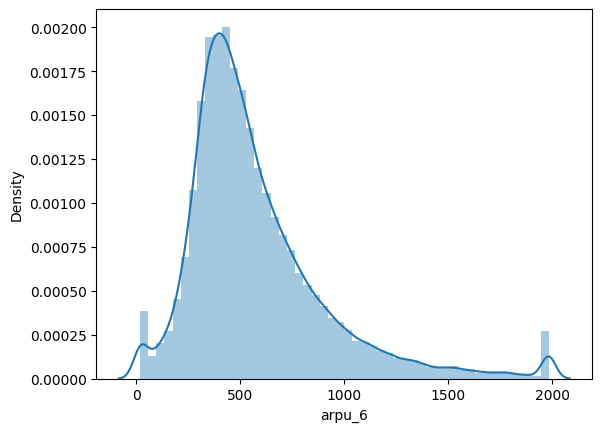

count    29979.000000
mean       578.115790
std        336.036348
min         18.221200
25%        364.352500
50%        495.951000
75%        704.184500
max       1983.590100
Name: arpu_6, dtype: float64


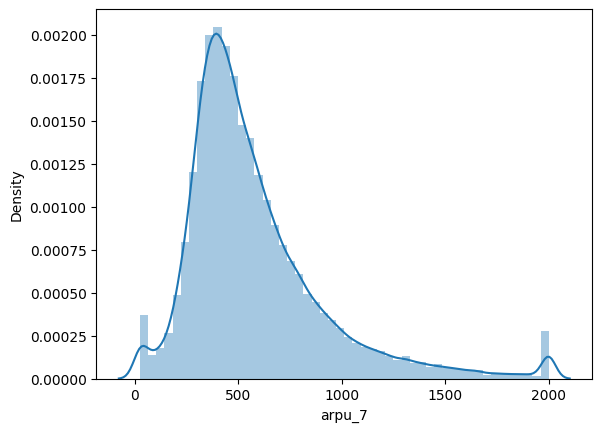

count    29979.00000
mean       579.93420
std        338.20204
min         25.60060
25%        365.23500
50%        493.78100
75%        700.98600
max       1999.50968
Name: arpu_7, dtype: float64


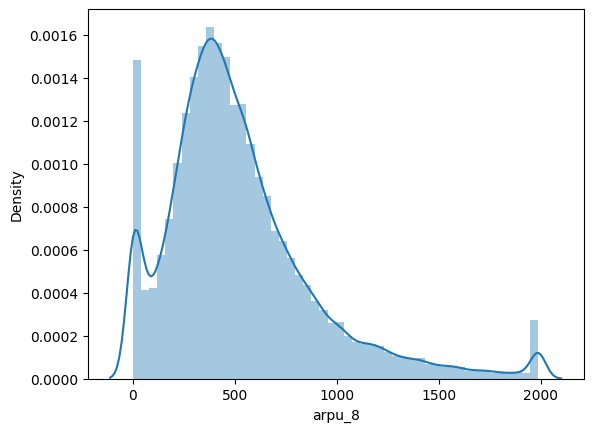

count    29979.000000
mean       524.618925
std        370.788082
min          0.000000
25%        289.782000
50%        452.232000
75%        671.349500
max       1988.082260
Name: arpu_8, dtype: float64


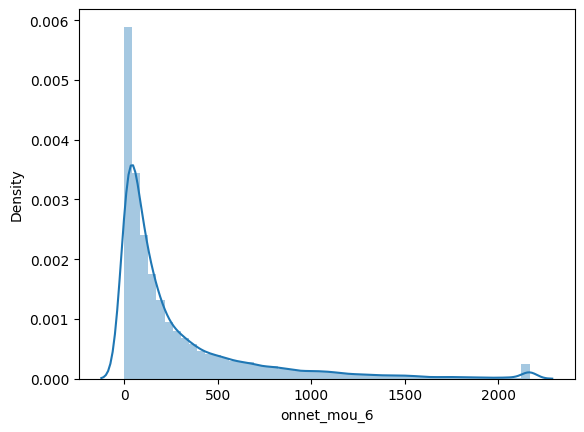

count    29979.000000
mean       288.155041
std        404.919913
min          0.000000
25%         42.230000
50%        126.190000
75%        353.620000
max       2166.876000
Name: onnet_mou_6, dtype: float64


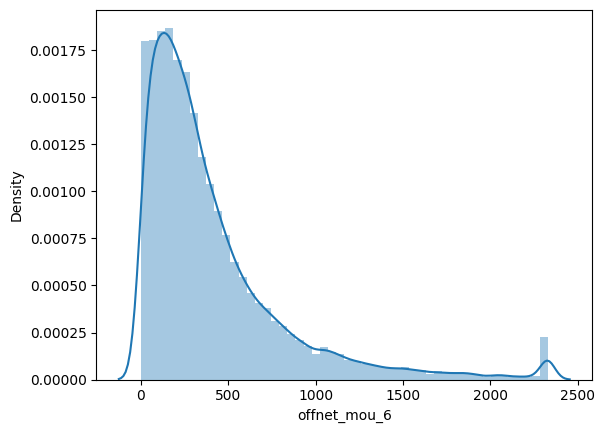

count    29979.000000
mean       411.499382
std        421.136852
min          1.057800
25%        138.600000
50%        282.840000
75%        523.710000
max       2328.192600
Name: offnet_mou_6, dtype: float64


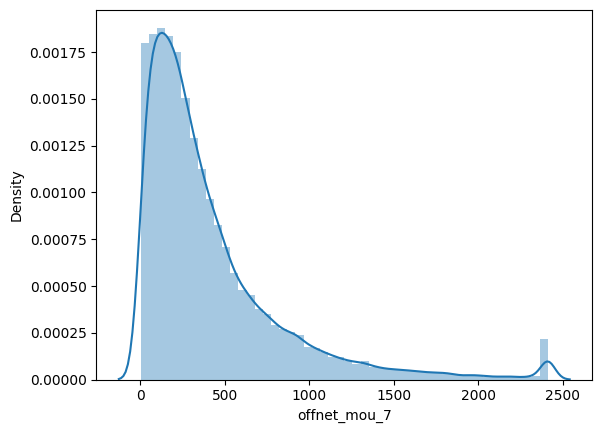

count    29979.000000
mean       416.386720
std        430.337399
min          1.099000
25%        136.410000
50%        282.260000
75%        532.905000
max       2411.004400
Name: offnet_mou_7, dtype: float64


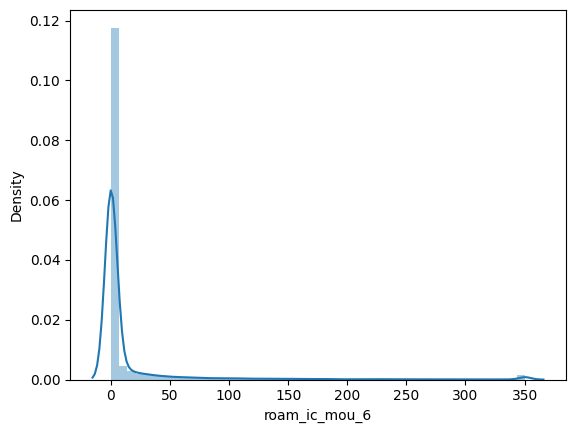

count    29979.000000
mean        15.020708
std         51.536100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        350.541800
Name: roam_ic_mou_6, dtype: float64


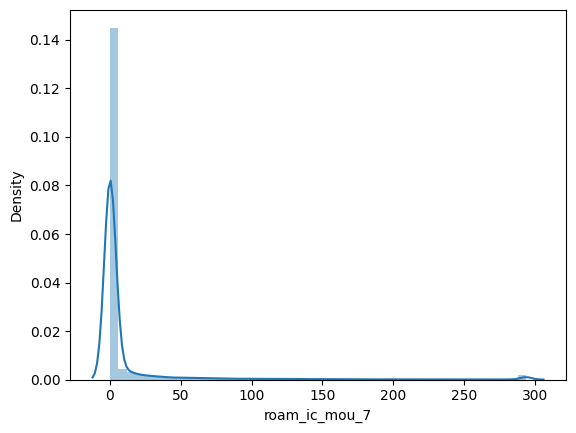

count    29979.000000
mean        10.797230
std         41.008021
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        293.756000
Name: roam_ic_mou_7, dtype: float64


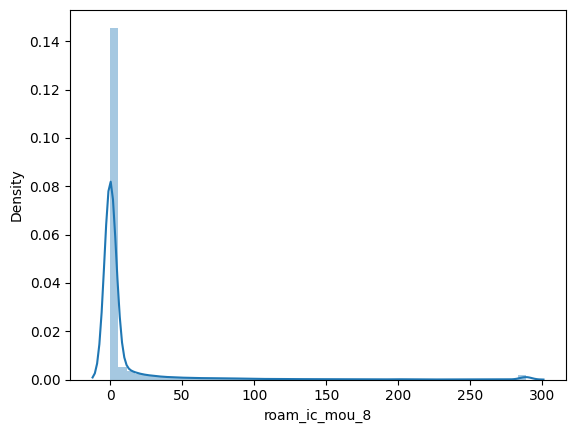

count    29979.000000
mean        10.904976
std         40.520233
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        288.536400
Name: roam_ic_mou_8, dtype: float64


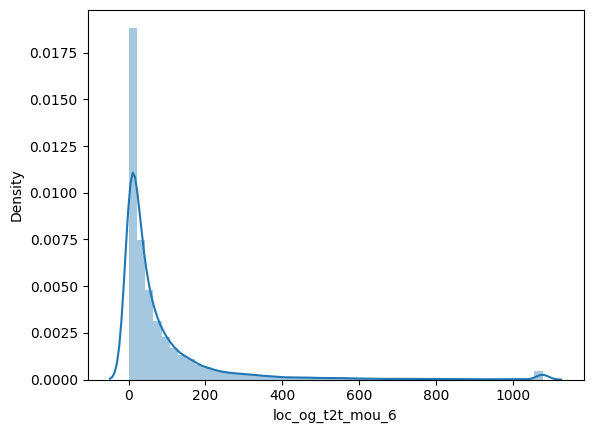

count    29979.000000
mean        86.810965
std        160.043702
min          0.000000
25%          8.650000
50%         32.810000
75%         91.570000
max       1076.635600
Name: loc_og_t2t_mou_6, dtype: float64


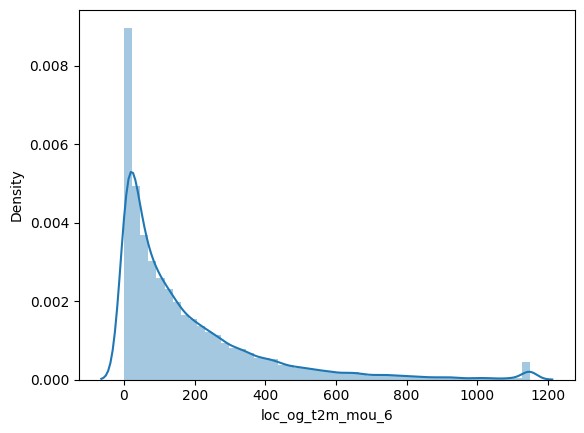

count    29979.000000
mean       176.324738
std        213.322743
min          0.000000
25%         31.280000
50%        101.760000
75%        240.260000
max       1147.821600
Name: loc_og_t2m_mou_6, dtype: float64


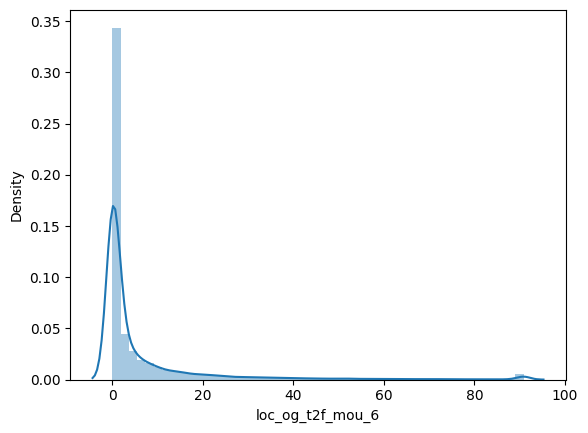

count    29979.000000
mean         6.315566
std         14.603978
min          0.000000
25%          0.000000
50%          0.380000
75%          5.180000
max         90.894400
Name: loc_og_t2f_mou_6, dtype: float64


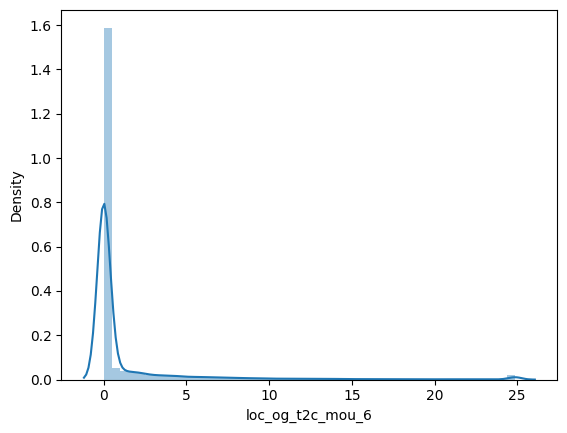

count    29979.000000
mean         1.339335
std          3.958866
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.877600
Name: loc_og_t2c_mou_6, dtype: float64


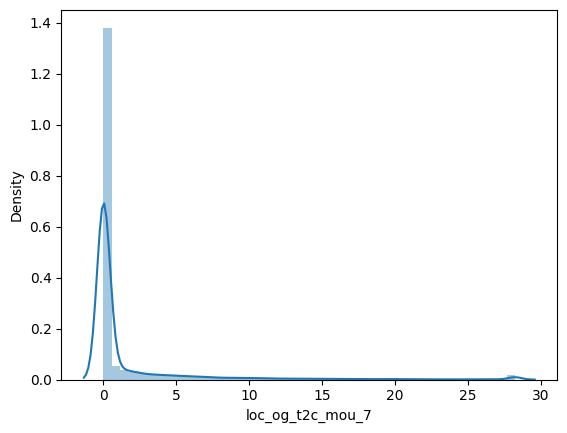

count    29979.000000
mean         1.548622
std          4.476507
min          0.000000
25%          0.000000
50%          0.000000
75%          0.150000
max         28.240000
Name: loc_og_t2c_mou_7, dtype: float64


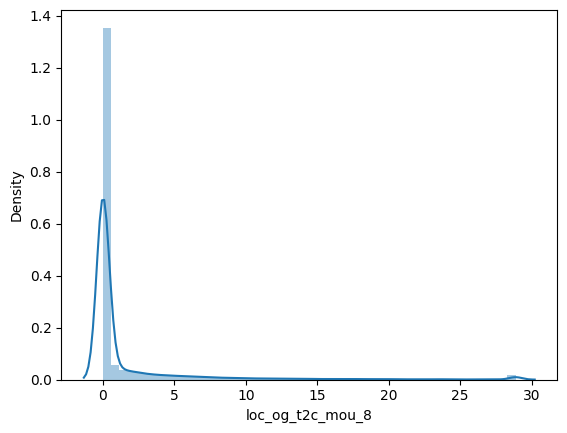

count    29979.000000
mean         1.499196
std          4.434908
min          0.000000
25%          0.000000
50%          0.000000
75%          0.180000
max         28.882200
Name: loc_og_t2c_mou_8, dtype: float64


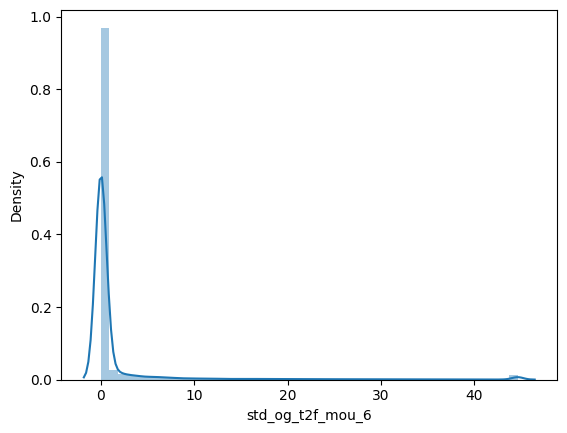

count    29979.000000
mean         1.507898
std          6.069563
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         44.649400
Name: std_og_t2f_mou_6, dtype: float64


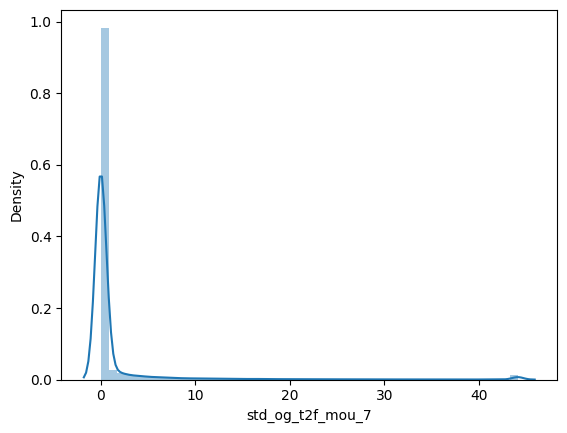

count    29979.000000
mean         1.460600
std          5.938864
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         44.102000
Name: std_og_t2f_mou_7, dtype: float64


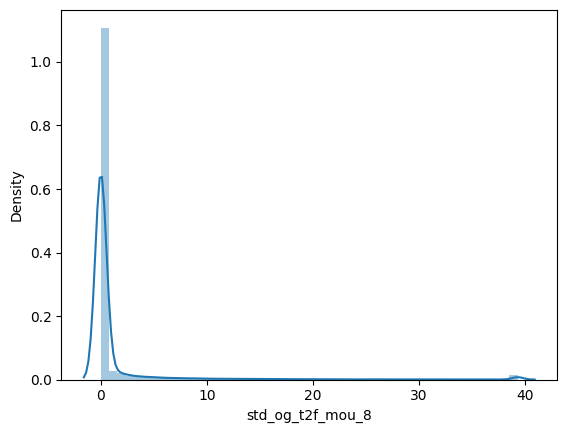

count    29979.000000
mean         1.292319
std          5.326021
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         39.343000
Name: std_og_t2f_mou_8, dtype: float64


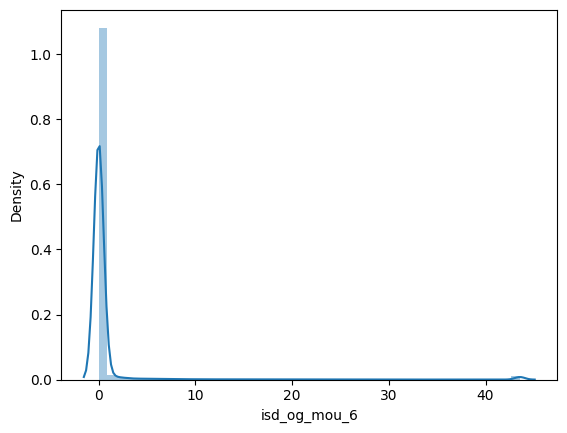

count    29979.000000
mean         0.846982
std          5.109570
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         43.555400
Name: isd_og_mou_6, dtype: float64


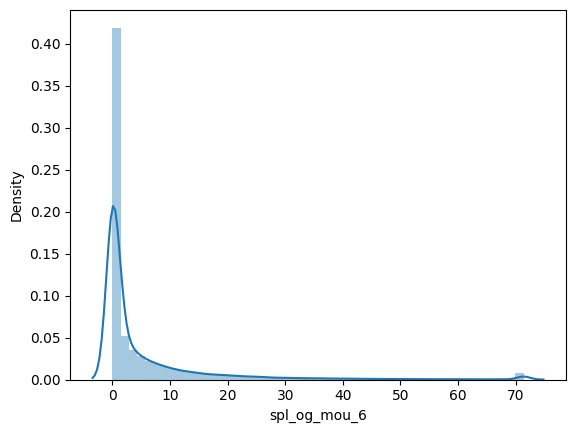

count    29979.000000
mean         5.354501
std         11.521228
min          0.000000
25%          0.000000
50%          0.300000
75%          5.260000
max         71.382000
Name: spl_og_mou_6, dtype: float64


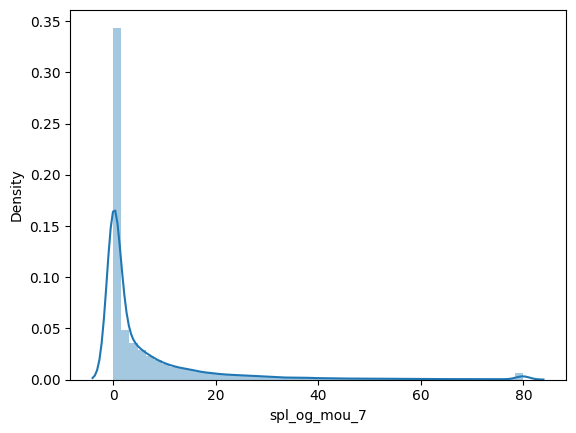

count    29979.000000
mean         6.660812
std         13.307061
min          0.000000
25%          0.000000
50%          0.850000
75%          7.195000
max         79.916400
Name: spl_og_mou_7, dtype: float64


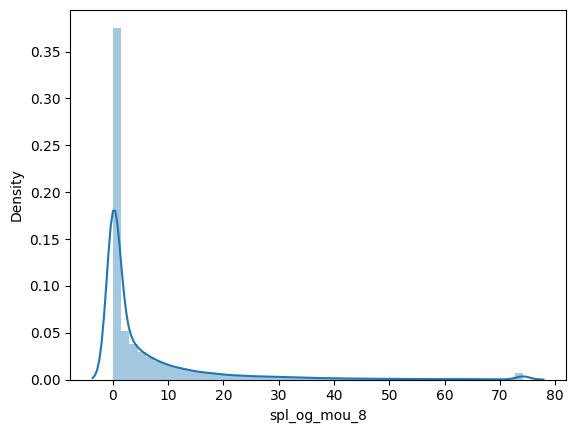

count    29979.000000
mean         6.110269
std         12.269510
min          0.000000
25%          0.000000
50%          0.730000
75%          6.540000
max         74.209800
Name: spl_og_mou_8, dtype: float64


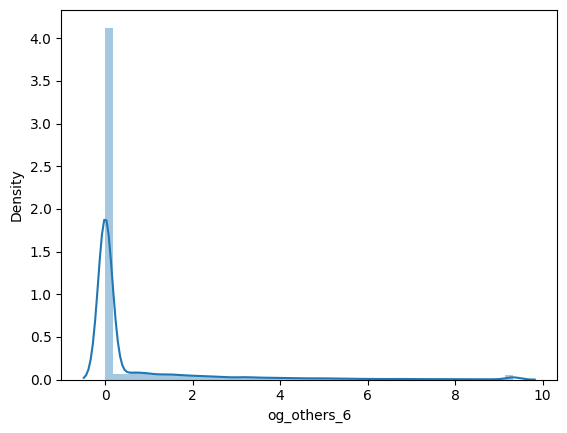

count    29979.000000
mean         0.632008
std          1.628282
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.330000
Name: og_others_6, dtype: float64


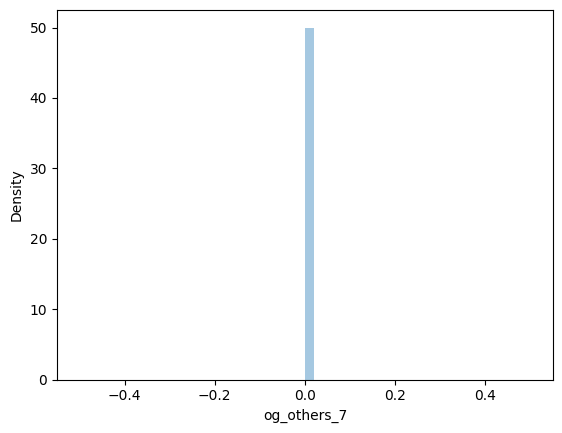

count    29979.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: og_others_7, dtype: float64


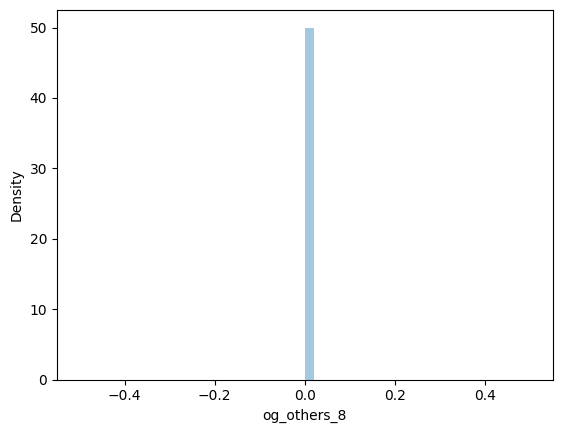

count    29979.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: og_others_8, dtype: float64


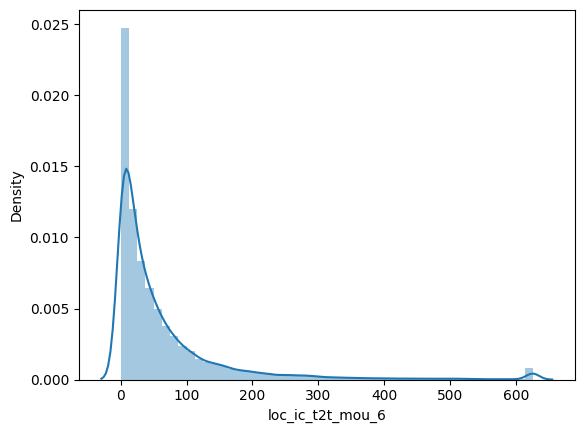

count    29979.000000
mean        63.054029
std         98.149712
min          0.000000
25%          8.690000
50%         29.340000
75%         73.785000
max        625.532600
Name: loc_ic_t2t_mou_6, dtype: float64


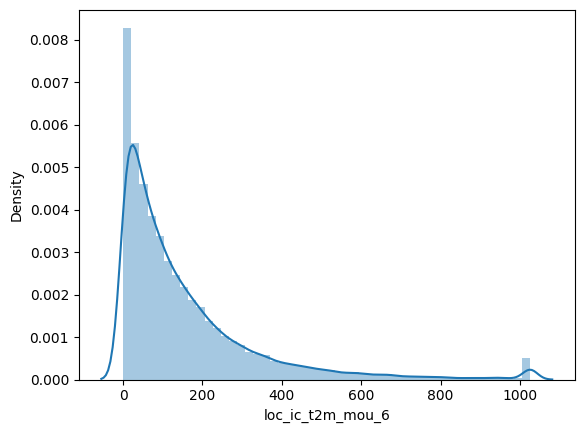

count    29979.000000
mean       154.831940
std        183.291265
min          0.000000
25%         34.400000
50%         94.340000
75%        202.940000
max       1026.568000
Name: loc_ic_t2m_mou_6, dtype: float64


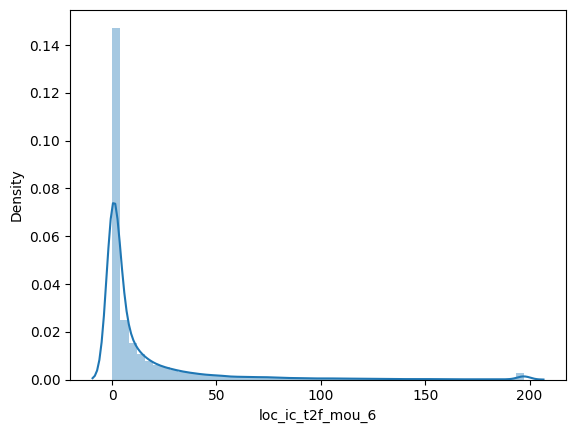

count    29979.000000
mean        14.185489
std         31.228280
min          0.000000
25%          0.000000
50%          2.060000
75%         12.580000
max        197.311000
Name: loc_ic_t2f_mou_6, dtype: float64


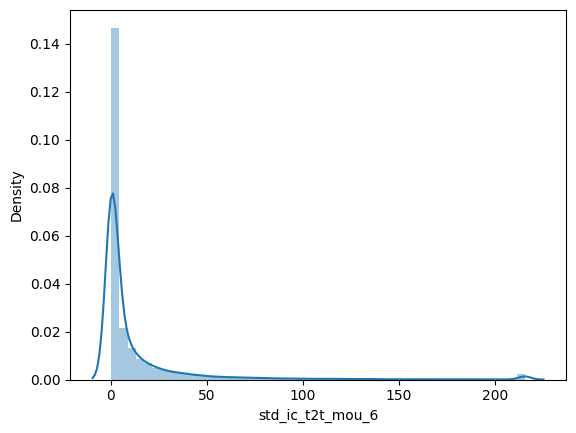

count    29979.000000
mean        13.003215
std         31.984235
min          0.000000
25%          0.000000
50%          1.140000
75%         10.405000
max        215.680000
Name: std_ic_t2t_mou_6, dtype: float64


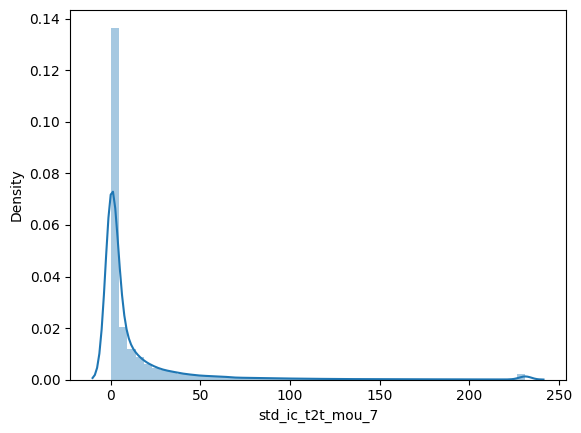

count    29979.000000
mean        13.697557
std         33.750248
min          0.000000
25%          0.000000
50%          1.280000
75%         11.060000
max        231.310400
Name: std_ic_t2t_mou_7, dtype: float64


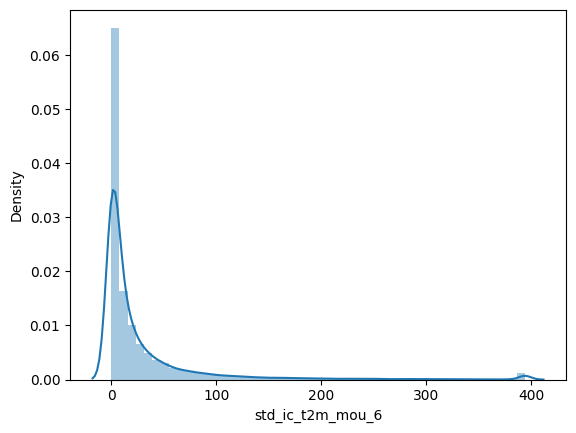

count    29979.000000
mean        28.330058
std         58.796910
min          0.000000
25%          0.560000
50%          7.290000
75%         27.620000
max        393.930200
Name: std_ic_t2m_mou_6, dtype: float64


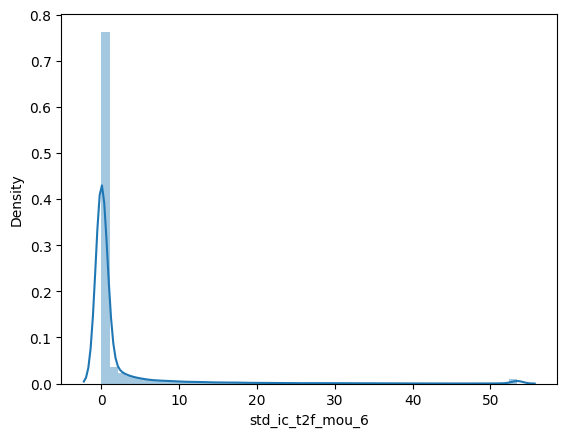

count    29979.000000
mean         2.118814
std          7.456697
min          0.000000
25%          0.000000
50%          0.000000
75%          0.230000
max         53.455400
Name: std_ic_t2f_mou_6, dtype: float64


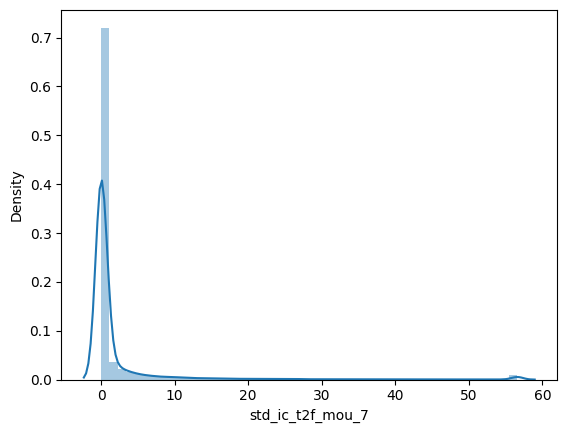

count    29979.000000
mean         2.218255
std          7.830048
min          0.000000
25%          0.000000
50%          0.000000
75%          0.300000
max         56.605400
Name: std_ic_t2f_mou_7, dtype: float64


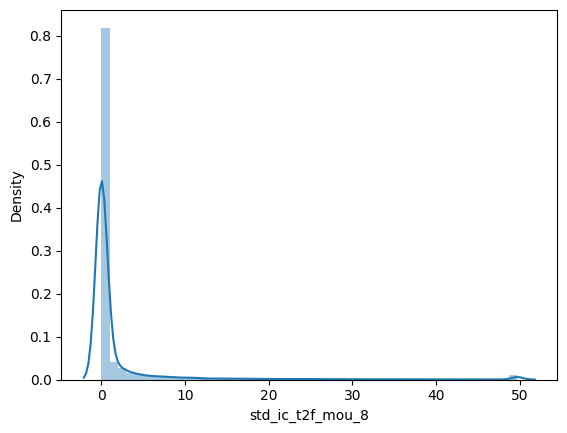

count    29979.000000
mean         1.960985
std          6.912769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.240000
max         49.714400
Name: std_ic_t2f_mou_8, dtype: float64


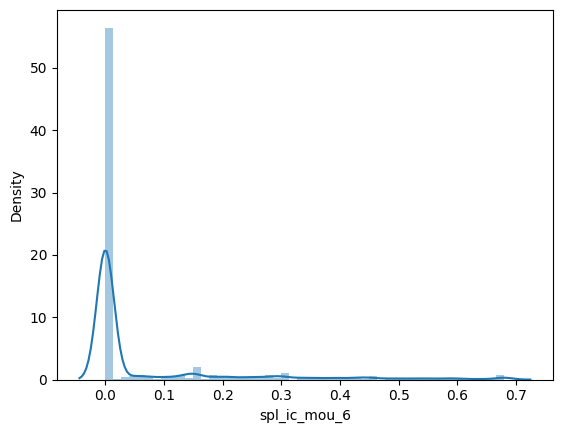

count    29979.000000
mean         0.065372
std          0.147281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.680000
Name: spl_ic_mou_6, dtype: float64


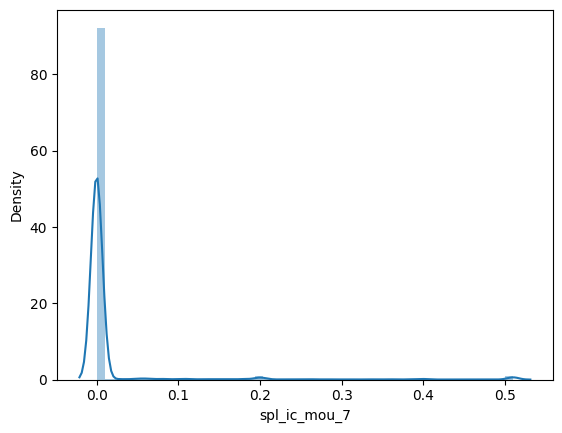

count    29979.000000
mean         0.014549
std          0.070333
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.510000
Name: spl_ic_mou_7, dtype: float64


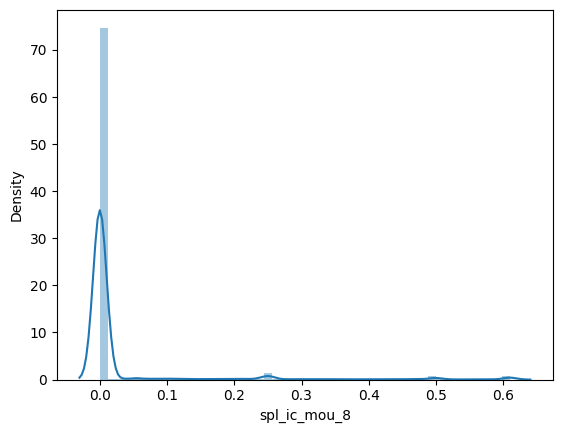

count    29979.000000
mean         0.026571
std          0.101105
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.610000
Name: spl_ic_mou_8, dtype: float64


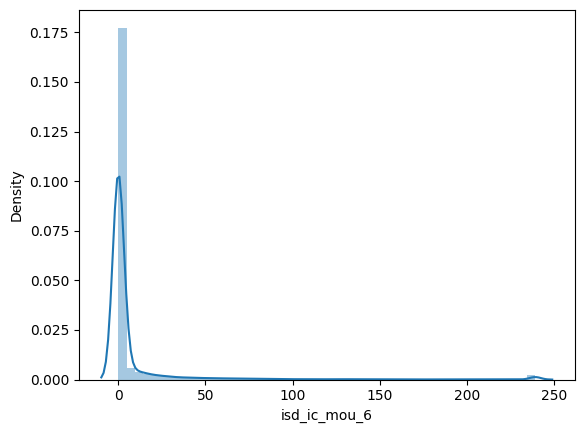

count    29979.000000
mean         8.362923
std         32.299064
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        239.192000
Name: isd_ic_mou_6, dtype: float64


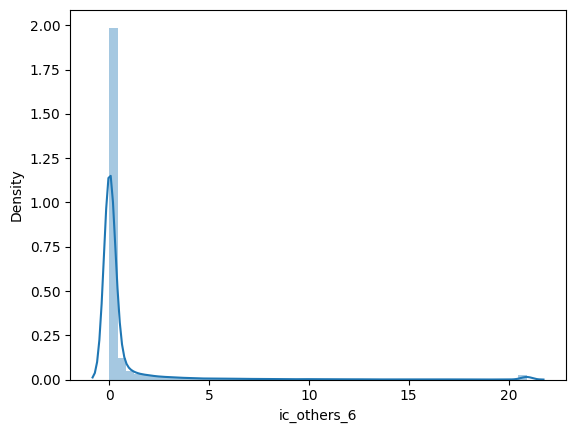

count    29979.000000
mean         0.723819
std          2.791733
min          0.000000
25%          0.000000
50%          0.000000
75%          0.080000
max         20.914400
Name: ic_others_6, dtype: float64


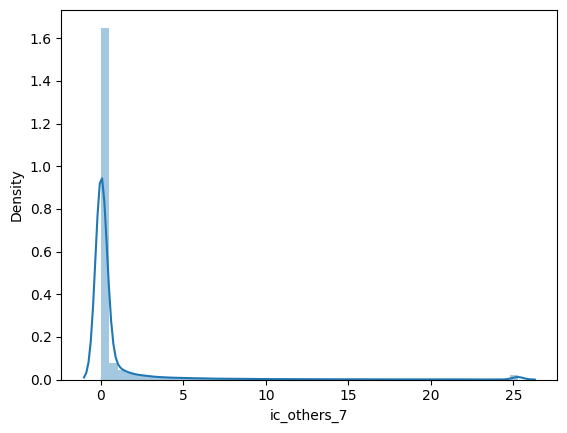

count    29979.000000
mean         0.912584
std          3.435468
min          0.000000
25%          0.000000
50%          0.000000
75%          0.050000
max         25.266600
Name: ic_others_7, dtype: float64


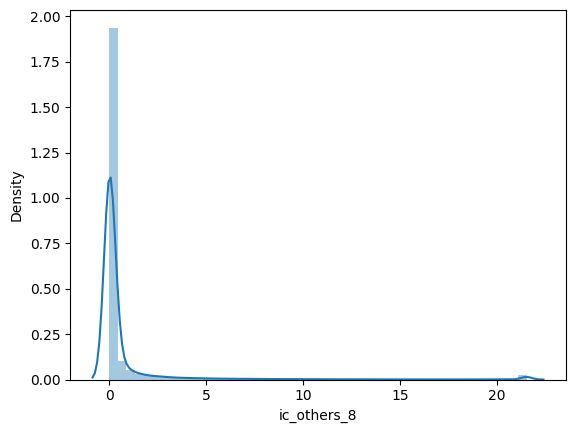

count    29979.000000
mean         0.762765
std          2.909411
min          0.000000
25%          0.000000
50%          0.000000
75%          0.080000
max         21.530000
Name: ic_others_8, dtype: float64


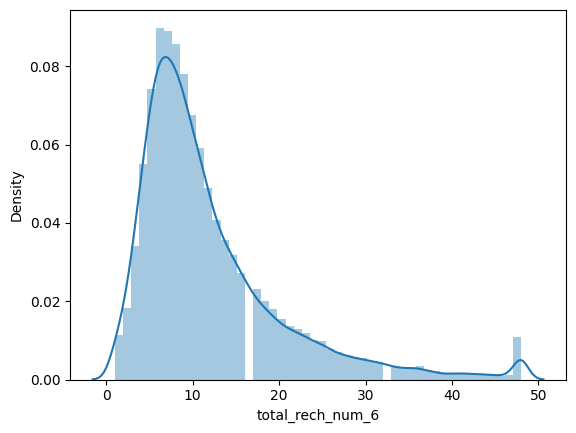

count    29979.000000
mean        11.985323
std          8.627454
min          1.000000
25%          6.000000
50%          9.000000
75%         15.000000
max         48.000000
Name: total_rech_num_6, dtype: float64


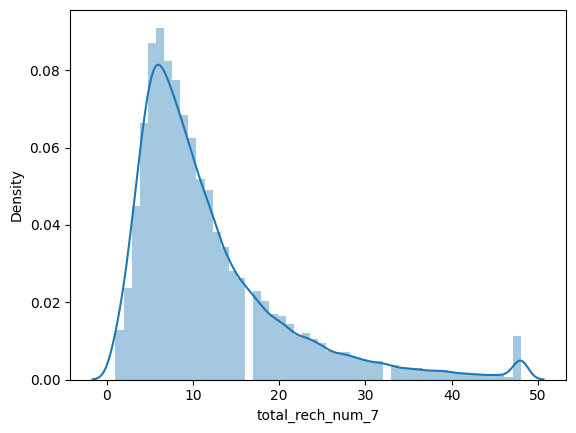

count    29979.000000
mean        11.777077
std          8.825703
min          1.000000
25%          6.000000
50%          9.000000
75%         15.000000
max         48.000000
Name: total_rech_num_7, dtype: float64


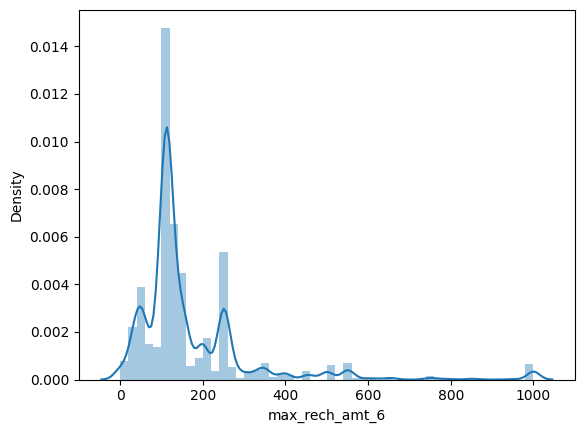

count    29979.000000
mean       168.899263
std        151.404909
min          0.000000
25%        110.000000
50%        120.000000
75%        200.000000
max       1000.000000
Name: max_rech_amt_6, dtype: float64


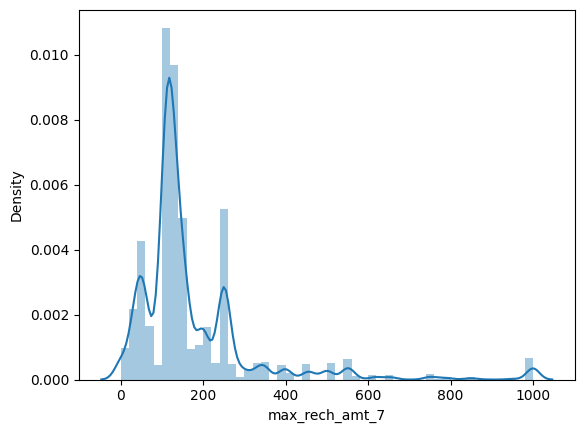

count    29979.000000
mean       172.643917
std        155.496760
min          0.000000
25%        110.000000
50%        128.000000
75%        200.000000
max       1000.000000
Name: max_rech_amt_7, dtype: float64


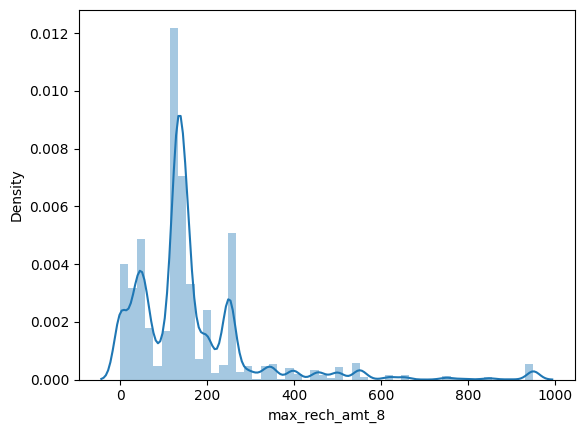

count    29979.000000
mean       160.017279
std        145.059778
min          0.000000
25%         67.000000
50%        130.000000
75%        198.000000
max        951.000000
Name: max_rech_amt_8, dtype: float64


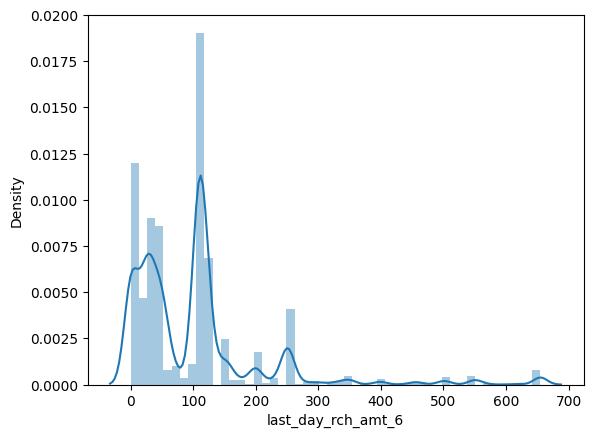

count    29979.000000
mean       100.382568
std        109.365698
min          0.000000
25%         30.000000
50%        110.000000
75%        120.000000
max        655.000000
Name: last_day_rch_amt_6, dtype: float64


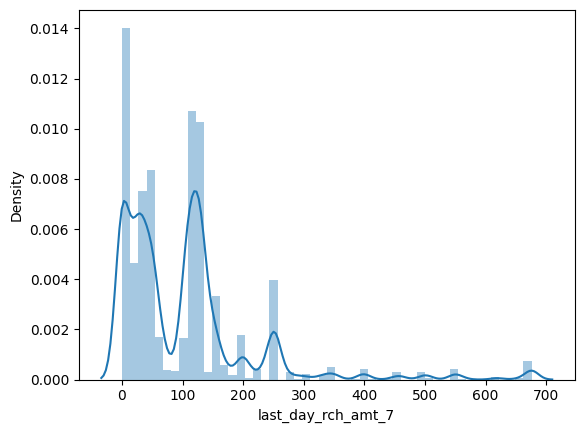

count    29979.000000
mean       101.662264
std        113.498072
min          0.000000
25%         27.000000
50%         98.000000
75%        130.000000
max        675.900000
Name: last_day_rch_amt_7, dtype: float64


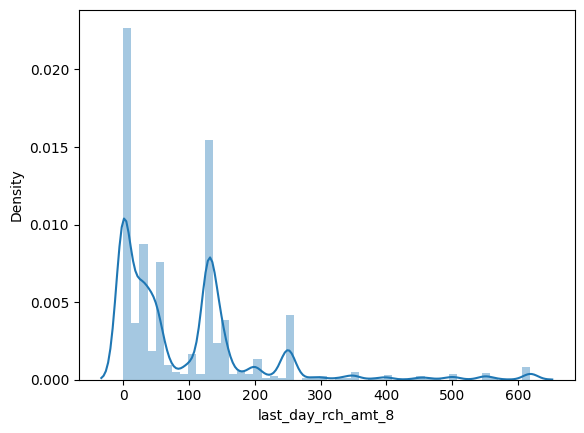

count    29979.000000
mean        91.687781
std        110.360527
min          0.000000
25%          0.000000
50%         50.000000
75%        130.000000
max        619.000000
Name: last_day_rch_amt_8, dtype: float64


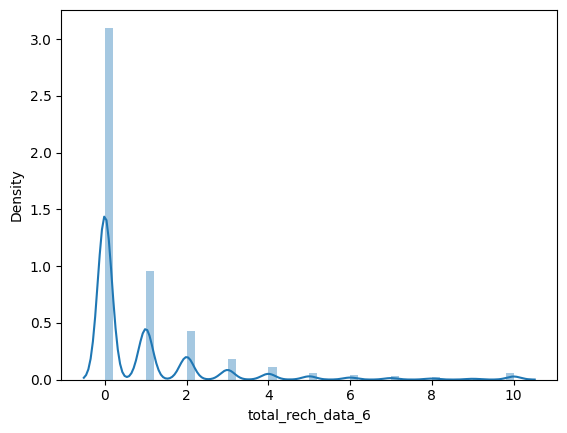

count    29979.000000
mean         0.880316
std          1.716269
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: total_rech_data_6, dtype: float64


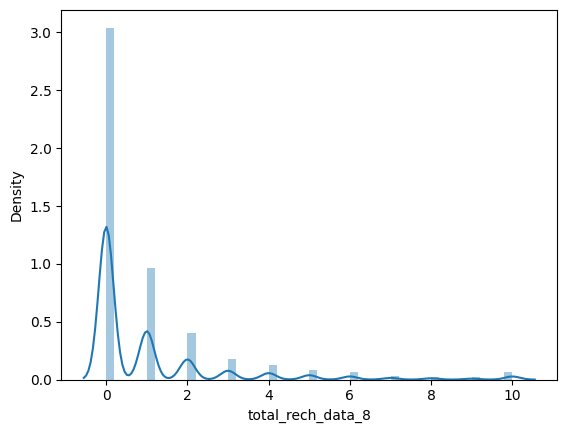

count    29979.000000
mean         0.967777
std          1.837345
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: total_rech_data_8, dtype: float64


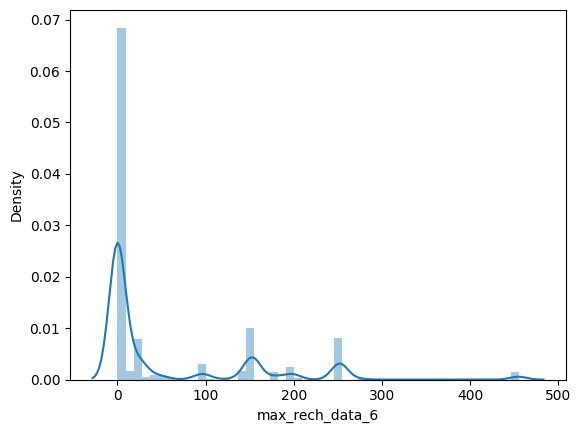

count    29979.000000
mean        55.106508
std         94.240261
min          0.000000
25%          0.000000
50%          0.000000
75%         98.000000
max        455.000000
Name: max_rech_data_6, dtype: float64


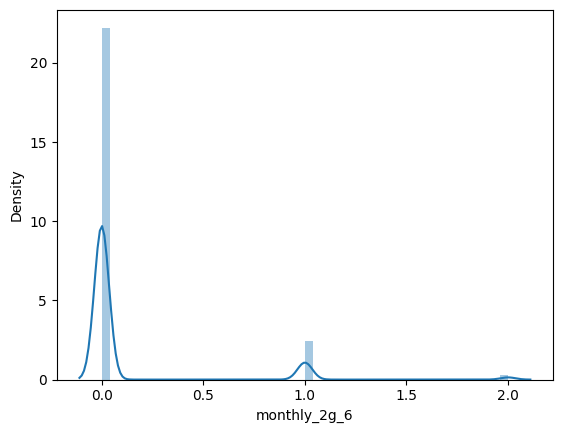

count    29979.000000
mean         0.123620
std          0.365459
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: monthly_2g_6, dtype: float64


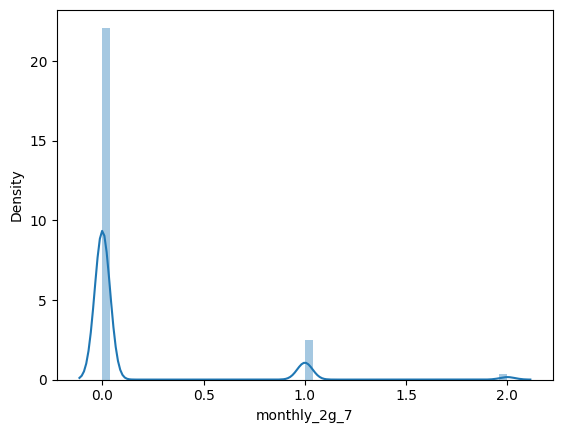

count    29979.000000
mean         0.129924
std          0.377539
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: monthly_2g_7, dtype: float64


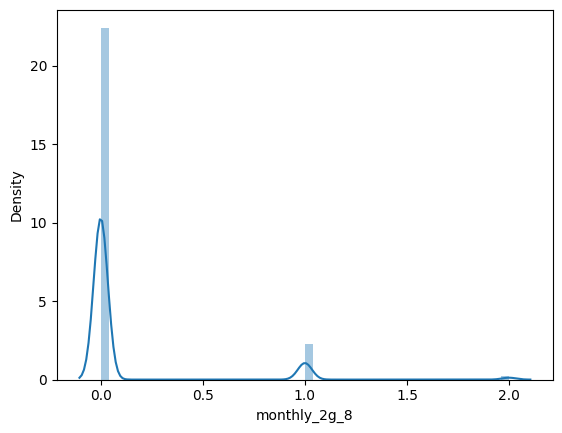

count    29979.000000
mean         0.112812
std          0.347713
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: monthly_2g_8, dtype: float64


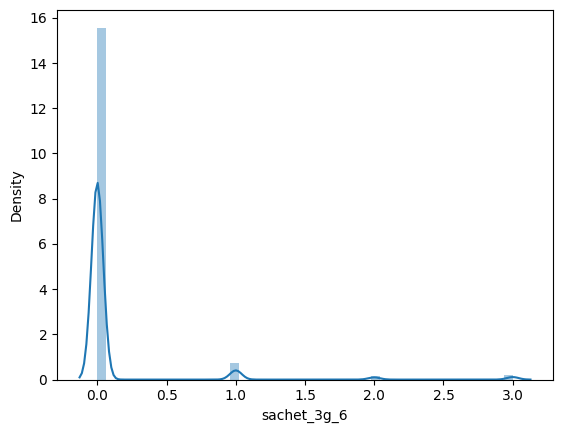

count    29979.000000
mean         0.100304
std          0.427528
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: sachet_3g_6, dtype: float64


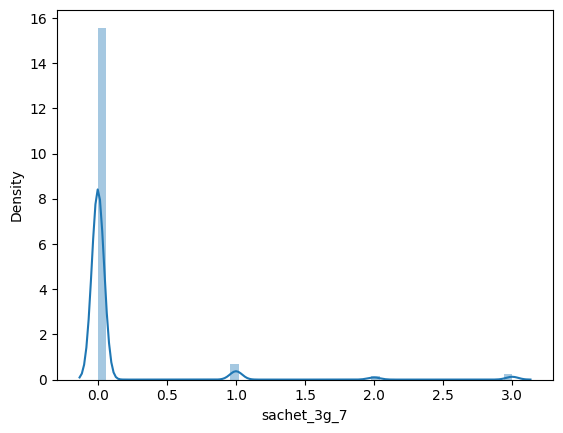

count    29979.000000
mean         0.103239
std          0.442786
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: sachet_3g_7, dtype: float64


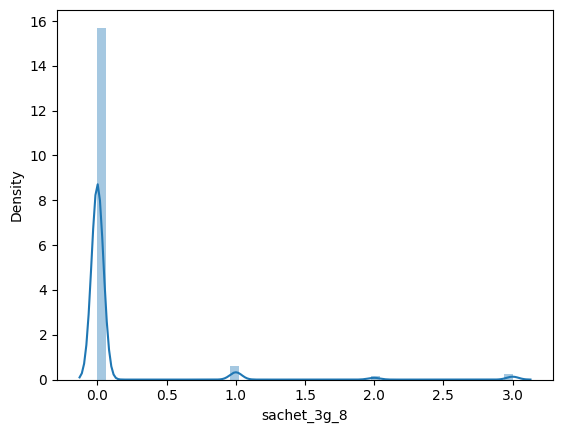

count    29979.000000
mean         0.093966
std          0.431060
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: sachet_3g_8, dtype: float64


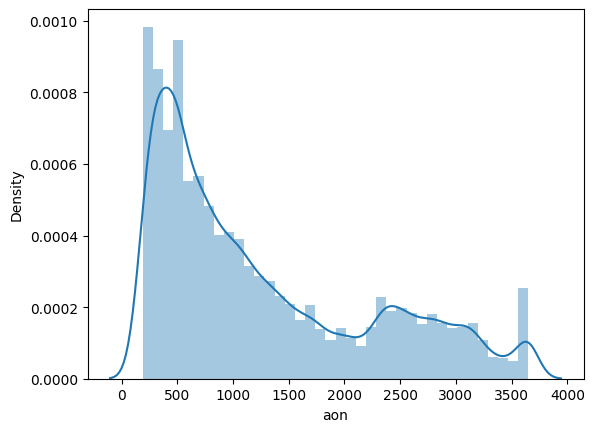

count    29979.000000
mean      1263.461223
std        973.137375
min        189.000000
25%        480.000000
50%        914.000000
75%       1923.500000
max       3651.000000
Name: aon, dtype: float64


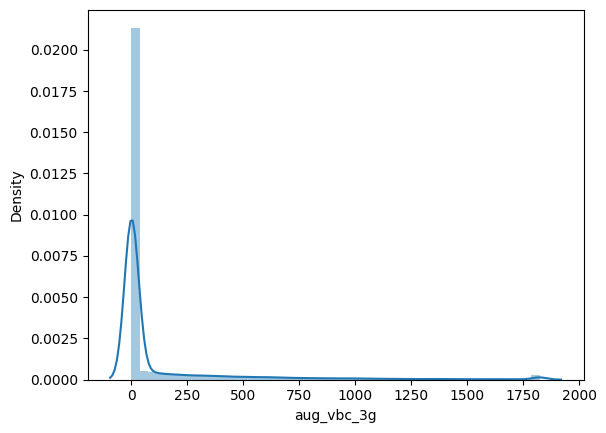

count    29979.000000
mean       120.468609
std        318.585454
min          0.000000
25%          0.000000
50%          0.000000
75%          1.600000
max       1822.698400
Name: aug_vbc_3g, dtype: float64


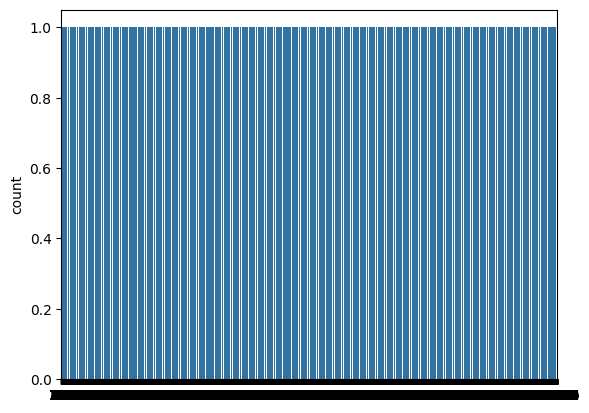

churn
0    27390
1     2589
Name: count, dtype: int64


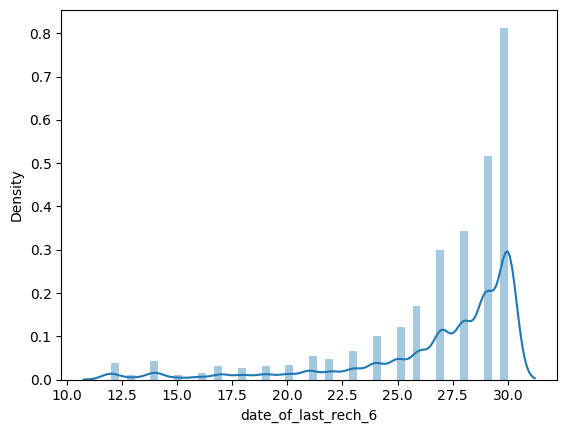

count    29979.000000
mean        26.867274
std          4.068977
min         12.000000
25%         26.000000
50%         28.000000
75%         30.000000
max         30.000000
Name: date_of_last_rech_6, dtype: float64


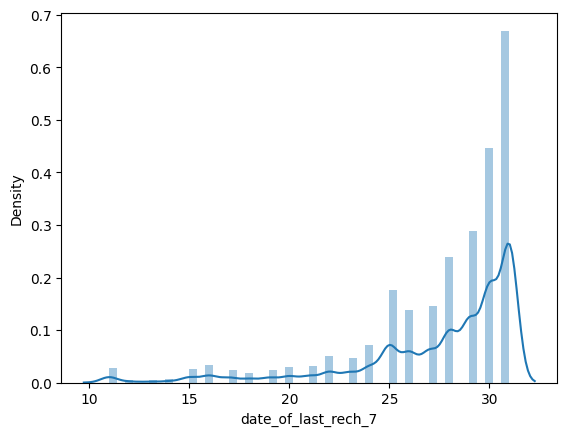

count    29979.000000
mean        27.558858
std          4.207741
min         11.000000
25%         26.000000
50%         29.000000
75%         31.000000
max         31.000000
Name: date_of_last_rech_7, dtype: float64


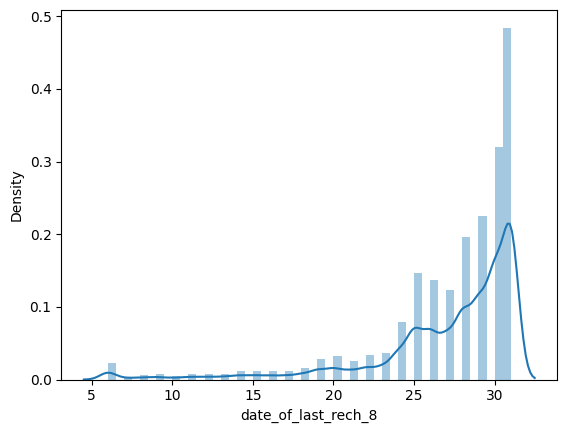

count    29979.000000
mean        27.013443
std          4.971570
min          6.000000
25%         25.000000
50%         29.000000
75%         30.000000
max         31.000000
Name: date_of_last_rech_8, dtype: float64


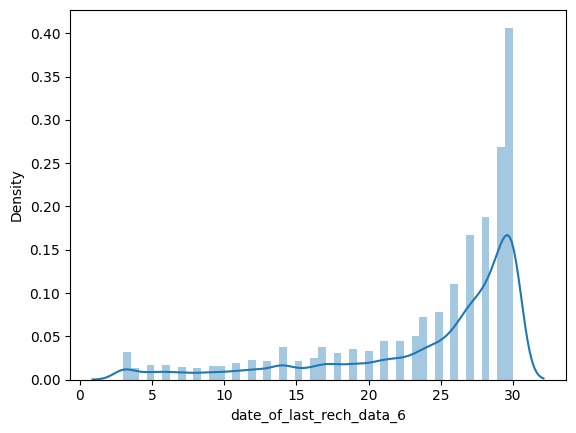

count    29979.000000
mean        24.155075
std          7.091503
min          3.000000
25%         21.000000
50%         27.000000
75%         29.000000
max         30.000000
Name: date_of_last_rech_data_6, dtype: float64


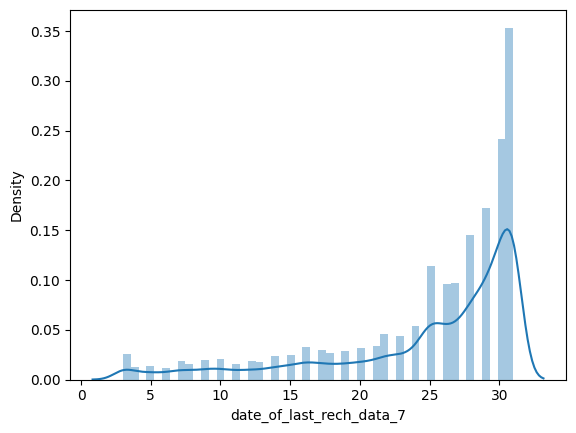

count    29979.000000
mean        24.739985
std          7.260009
min          3.000000
25%         22.000000
50%         28.000000
75%         30.000000
max         31.000000
Name: date_of_last_rech_data_7, dtype: float64


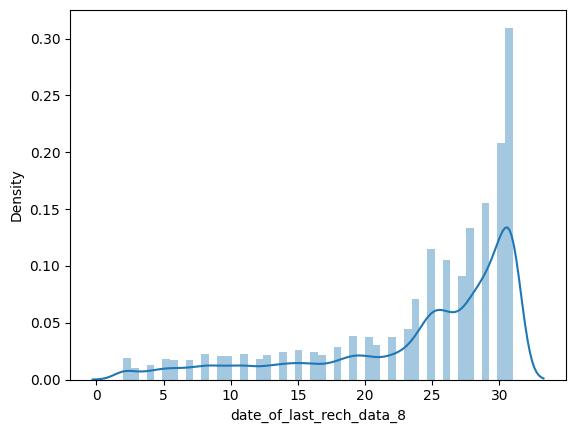

count    29979.000000
mean        24.131659
std          7.605296
min          2.000000
25%         21.000000
50%         27.000000
75%         30.000000
max         31.000000
Name: date_of_last_rech_data_8, dtype: float64


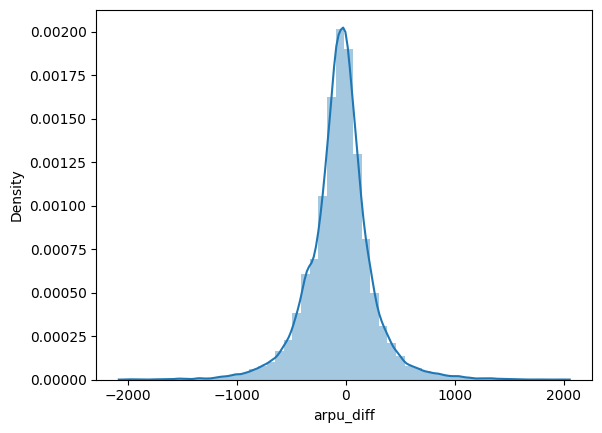

count    29979.000000
mean       -54.406070
std        296.627987
min      -1991.549890
25%       -193.421000
50%        -45.089500
75%         89.438250
max       1966.171360
Name: arpu_diff, dtype: float64


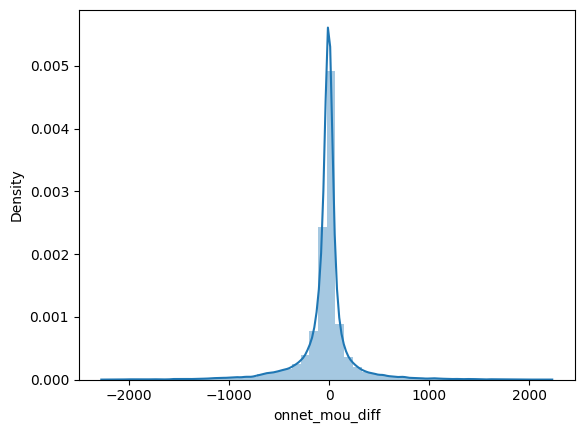

count    29979.000000
mean       -32.331723
std        274.208932
min      -2193.726800
25%        -71.902500
50%         -8.715000
75%         28.415000
max       2146.095800
Name: onnet_mou_diff, dtype: float64


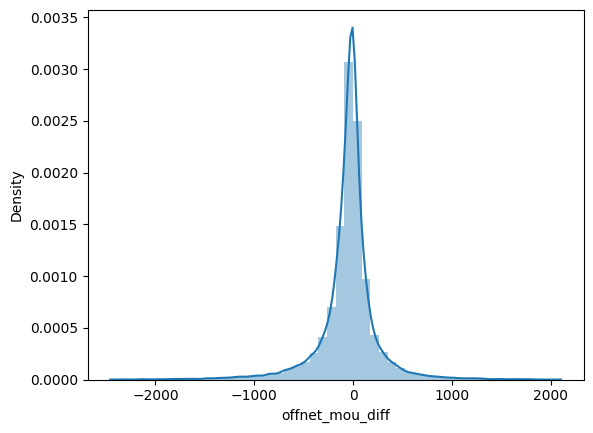

count    29979.000000
mean       -46.765427
std        299.778313
min      -2369.168500
25%       -126.332500
50%        -23.330000
75%         54.122500
max       2014.383000
Name: offnet_mou_diff, dtype: float64


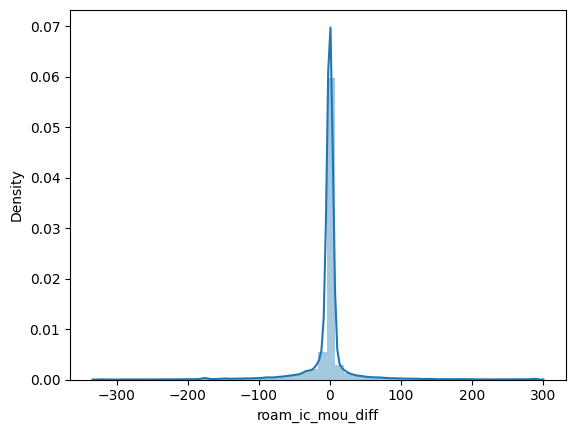

count    29979.000000
mean        -2.003993
std         39.966539
min       -322.148900
25%          0.000000
50%          0.000000
75%          0.000000
max        288.536400
Name: roam_ic_mou_diff, dtype: float64


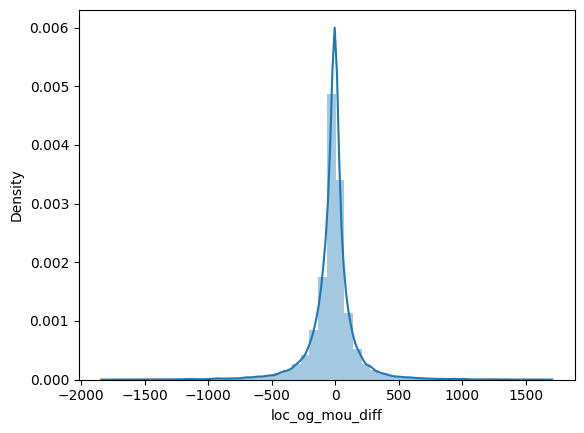

count    29979.000000
mean       -20.929031
std        184.920893
min      -1785.131300
25%        -72.782500
50%         -9.405000
75%         34.870000
max       1651.288800
Name: loc_og_mou_diff, dtype: float64


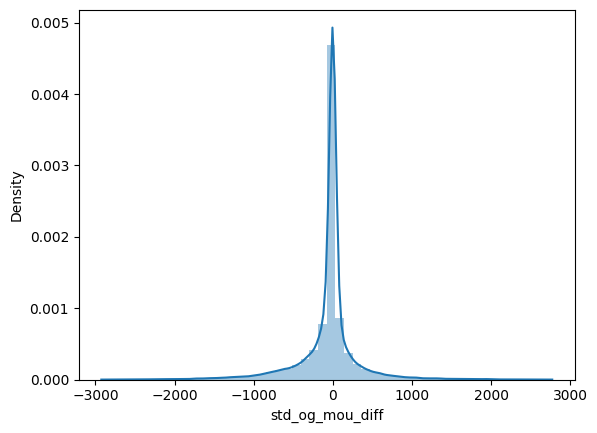

count    29979.000000
mean       -52.204040
std        386.150862
min      -2810.206800
25%        -90.537500
50%         -2.260000
75%         19.972500
max       2656.733000
Name: std_og_mou_diff, dtype: float64


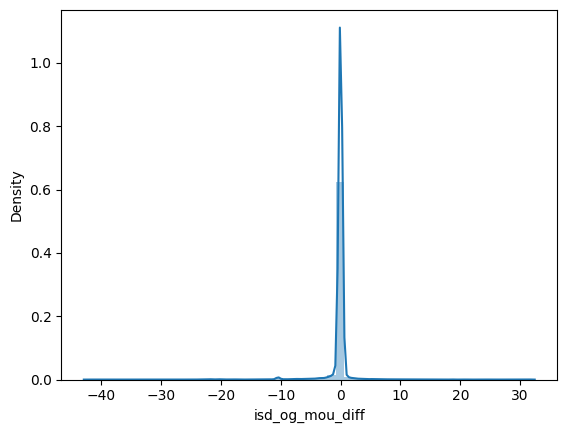

count    29979.000000
mean        -0.251115
std          3.012306
min        -41.973200
25%          0.000000
50%          0.000000
75%          0.000000
max         31.531800
Name: isd_og_mou_diff, dtype: float64


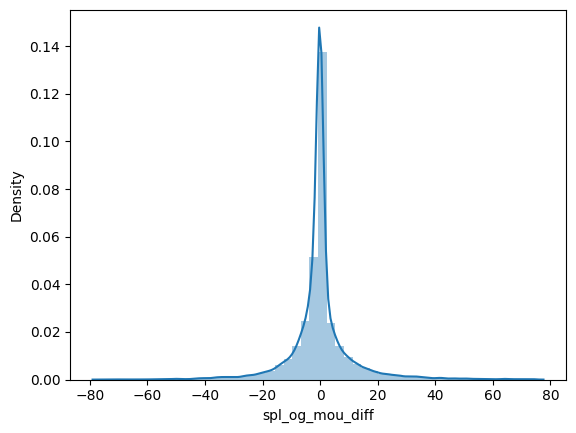

count    29979.000000
mean         0.102612
std         11.194148
min        -75.649200
25%         -2.625000
50%          0.000000
75%          1.630000
max         74.209800
Name: spl_og_mou_diff, dtype: float64


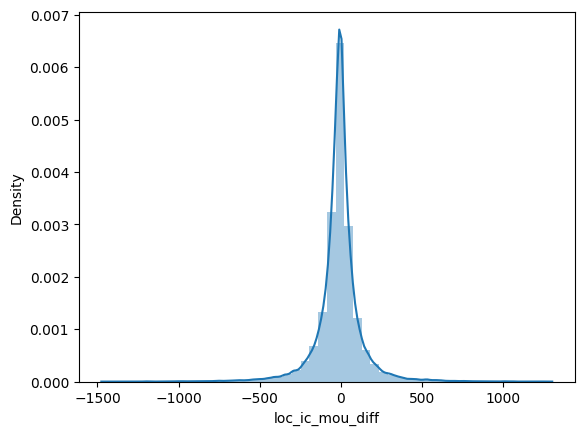

count    29979.000000
mean        -9.973345
std        145.110111
min      -1432.676500
25%        -53.957500
50%         -6.105000
75%         36.982500
max       1260.737600
Name: loc_ic_mou_diff, dtype: float64


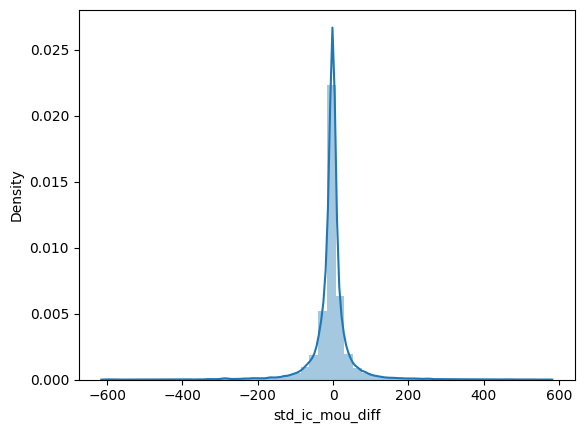

count    29979.000000
mean        -4.009866
std         58.733132
min       -597.537800
25%        -14.335000
50%         -1.320000
75%          6.847500
max        564.345000
Name: std_ic_mou_diff, dtype: float64


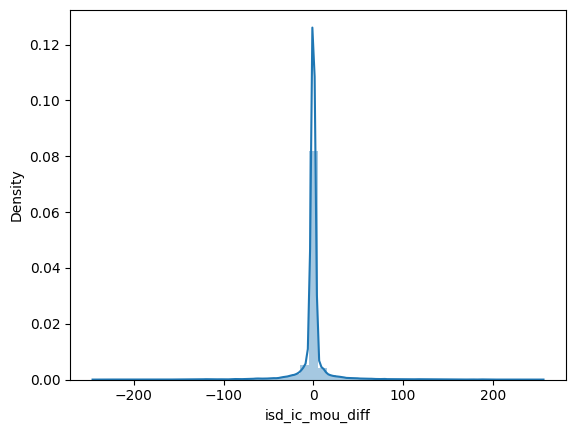

count    29979.000000
mean        -0.126579
std         22.067622
min       -239.391800
25%          0.000000
50%          0.000000
75%          0.000000
max        250.013400
Name: isd_ic_mou_diff, dtype: float64


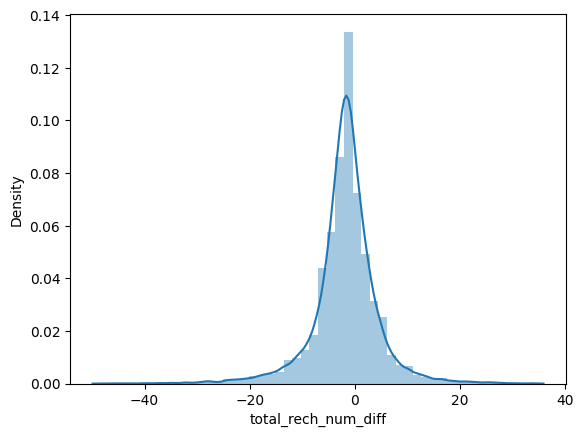

count    29979.000000
mean        -1.789336
std          6.275418
min        -48.000000
25%         -4.000000
50%         -1.500000
75%          1.000000
max         34.000000
Name: total_rech_num_diff, dtype: float64


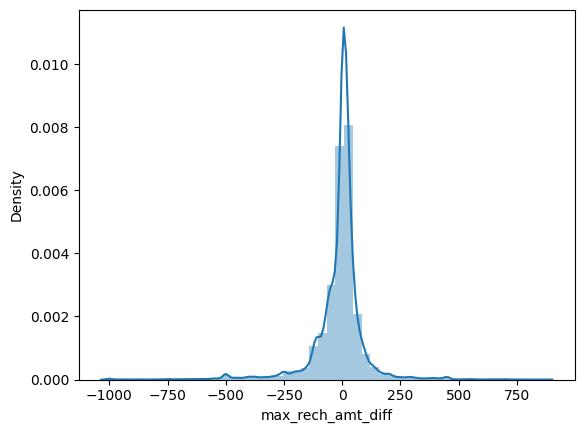

count    29979.000000
mean       -10.754311
std        115.530175
min      -1000.000000
25%        -34.250000
50%          0.000000
75%         25.000000
max        867.500000
Name: max_rech_amt_diff, dtype: float64


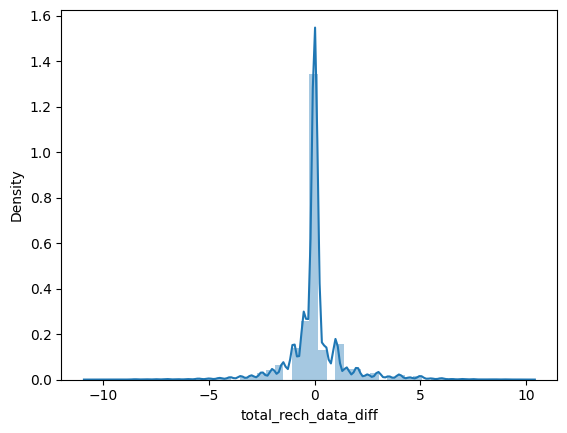

count    29979.000000
mean         0.030054
std          1.408676
min        -10.500000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: total_rech_data_diff, dtype: float64


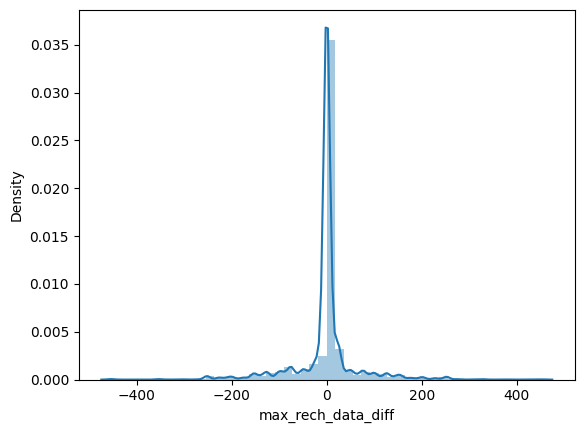

count    29979.000000
mean        -2.318056
std         64.705494
min       -455.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        455.000000
Name: max_rech_data_diff, dtype: float64


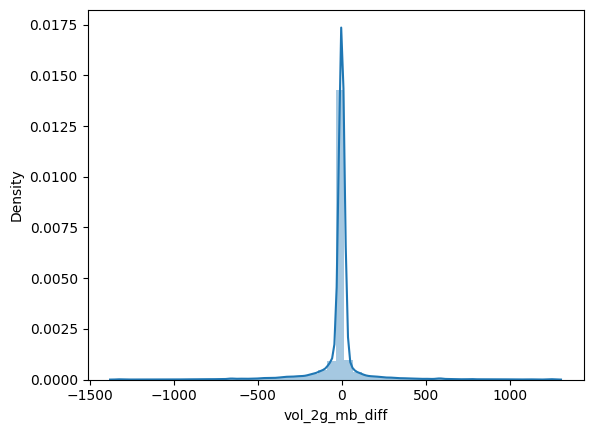

count    29979.000000
mean        -9.266441
std        161.896477
min      -1331.297700
25%         -0.587500
50%          0.000000
75%          0.000000
max       1257.791000
Name: vol_2g_mb_diff, dtype: float64


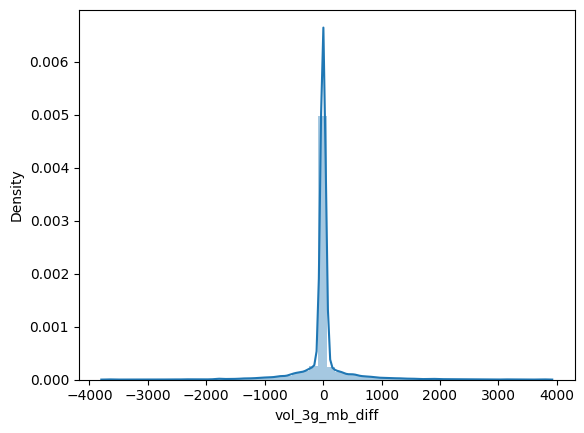

count    29979.000000
mean         2.516832
std        433.954504
min      -3665.940100
25%          0.000000
50%          0.000000
75%          0.000000
max       3791.762200
Name: vol_3g_mb_diff, dtype: float64


In [34]:
#Univariate Analysis of all columns
for i in df3.columns:
    univariate(df3[i])

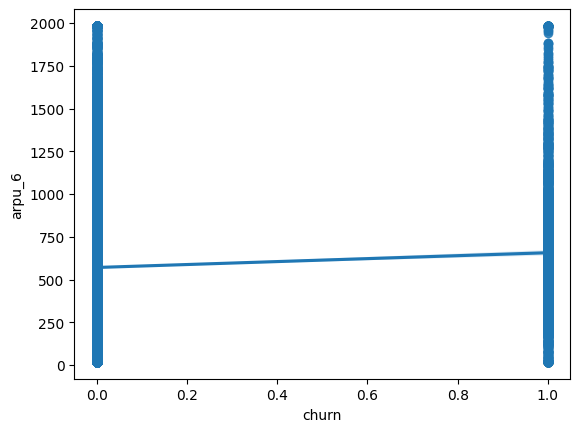

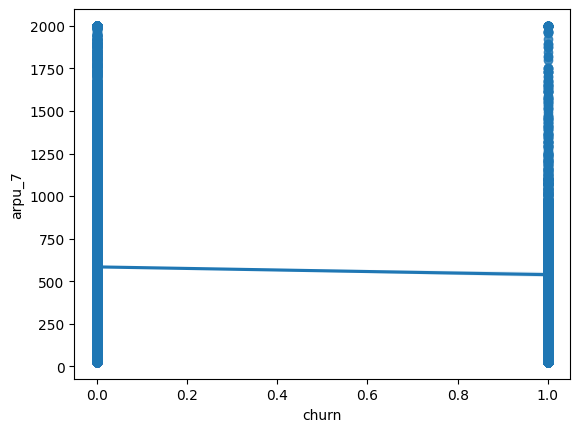

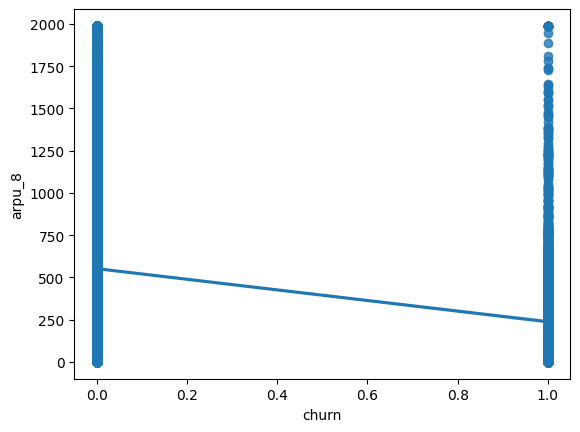

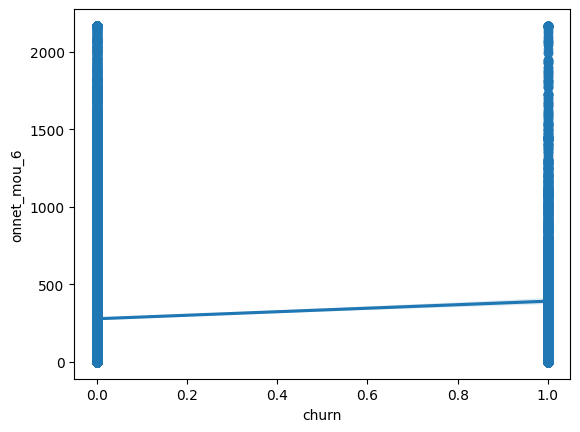

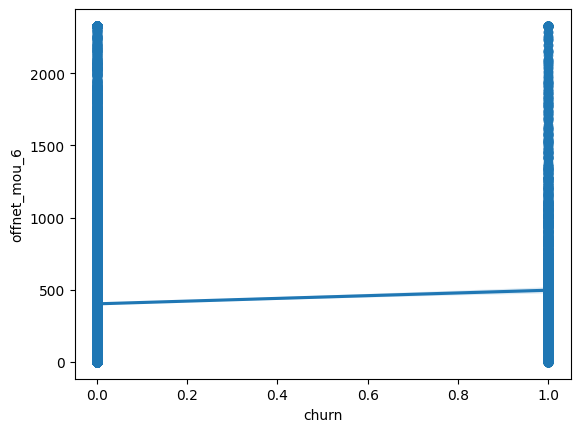

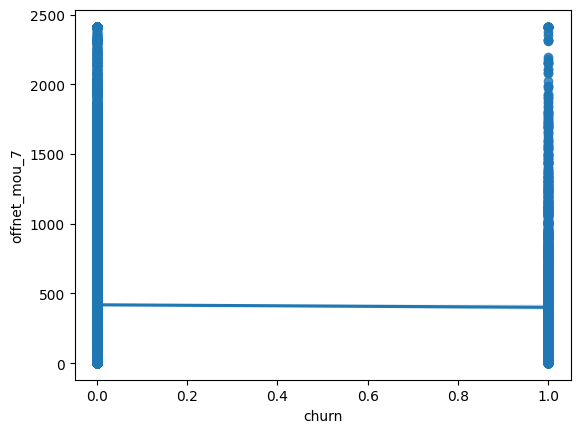

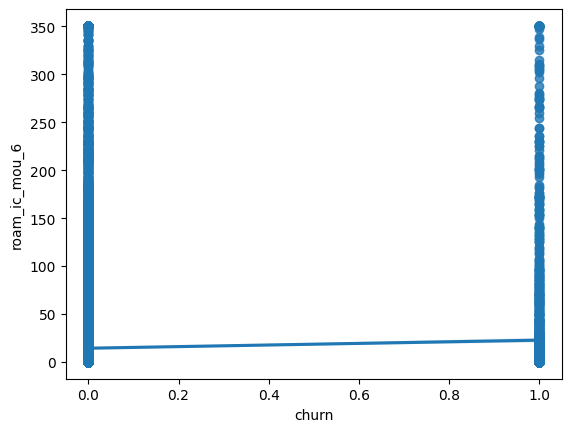

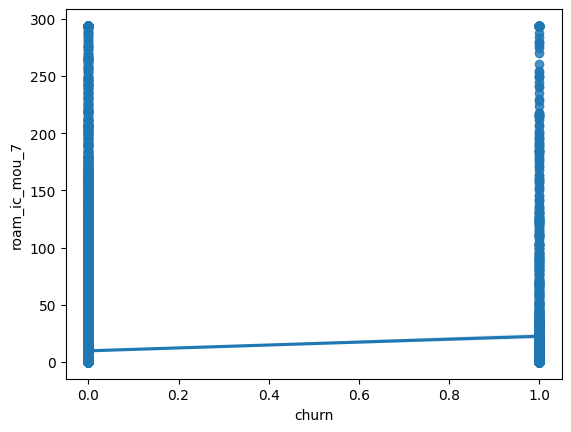

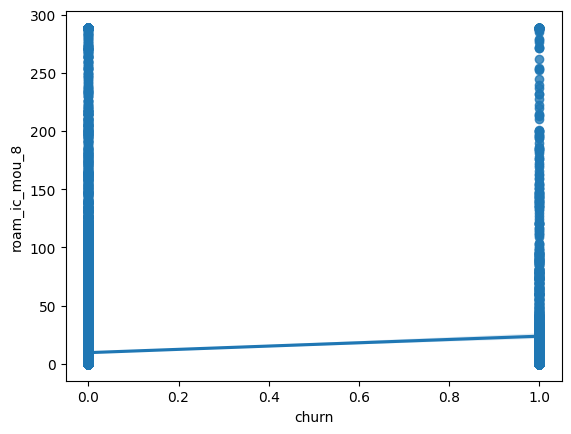

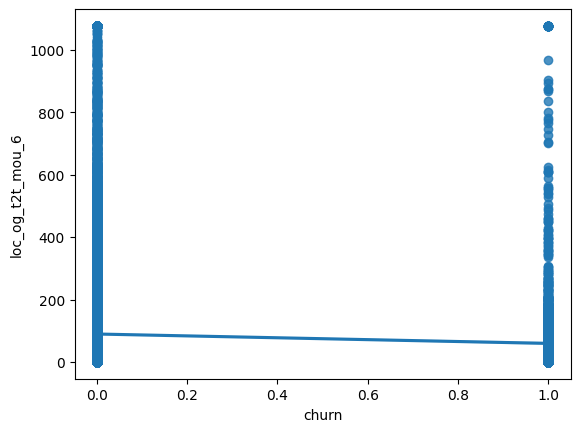

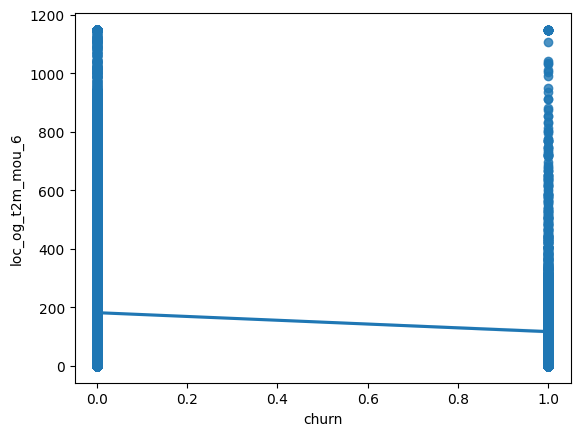

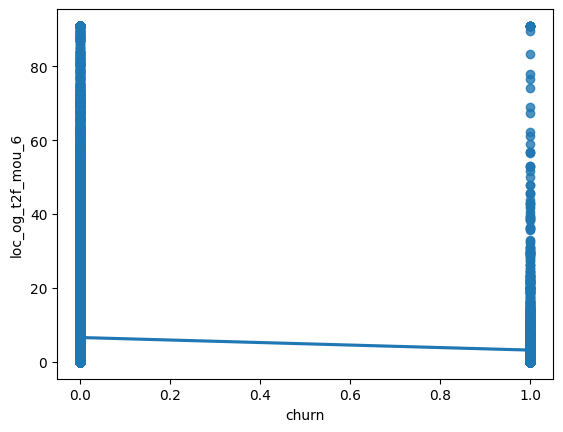

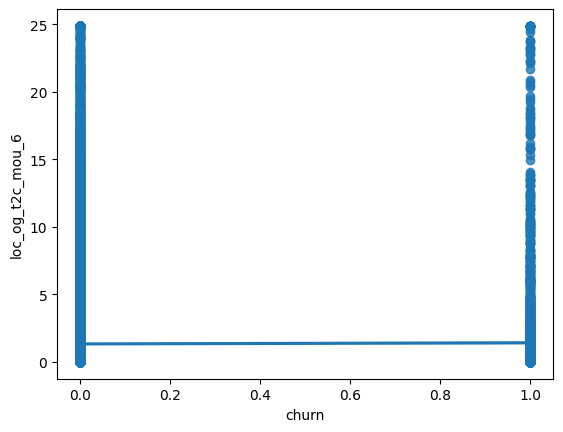

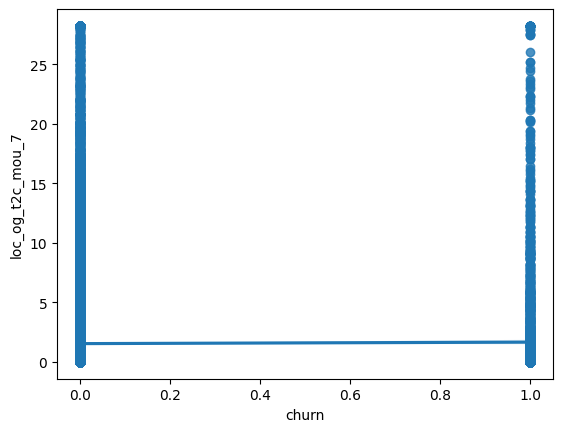

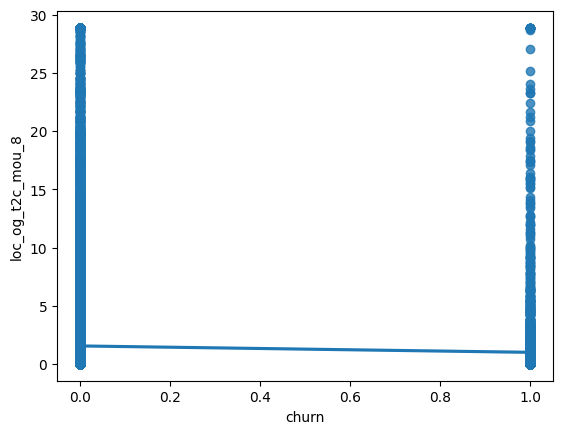

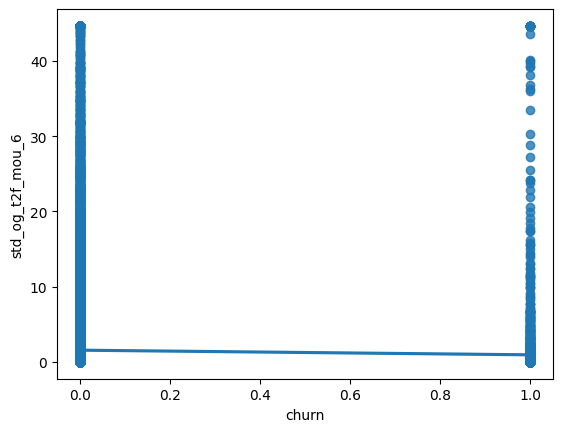

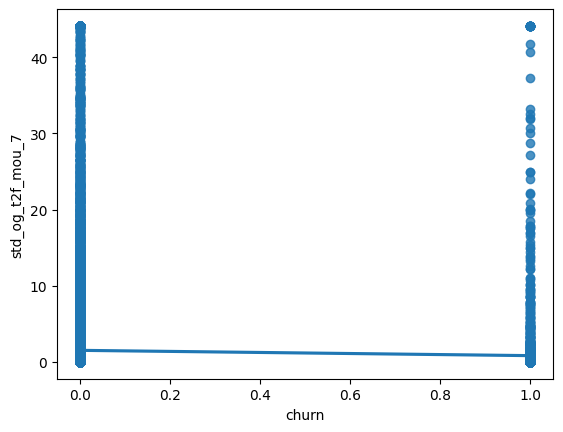

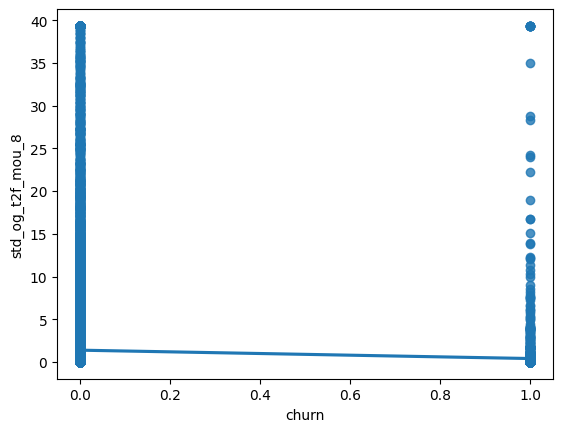

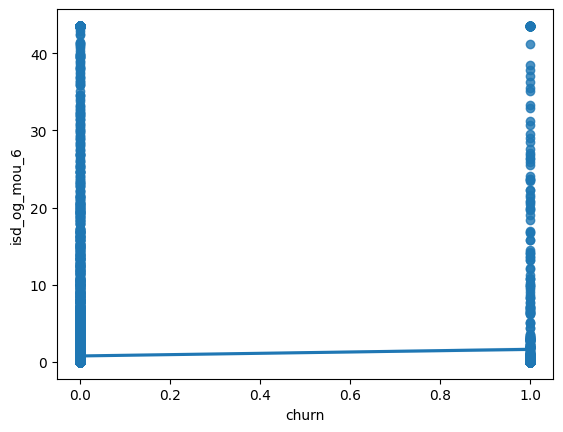

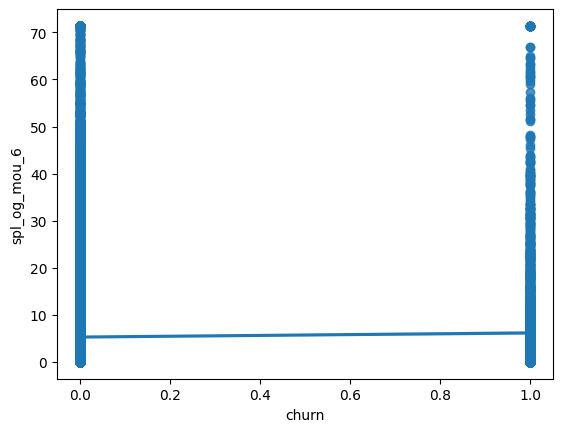

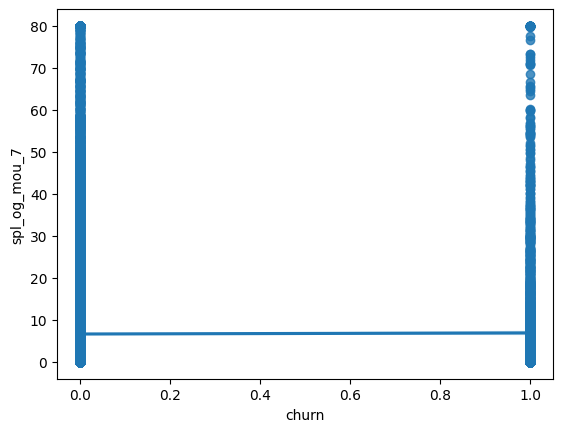

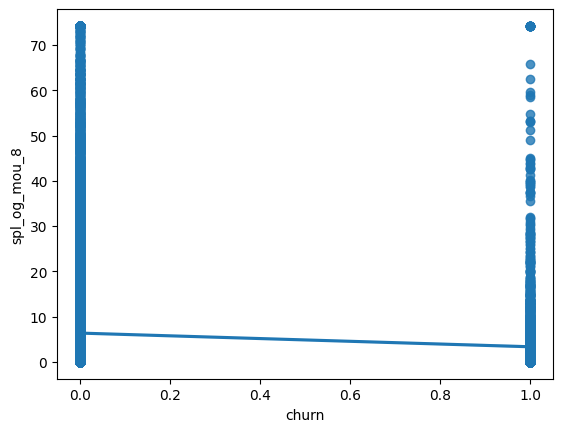

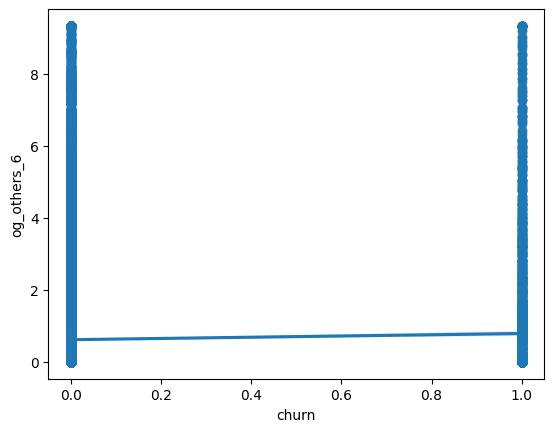

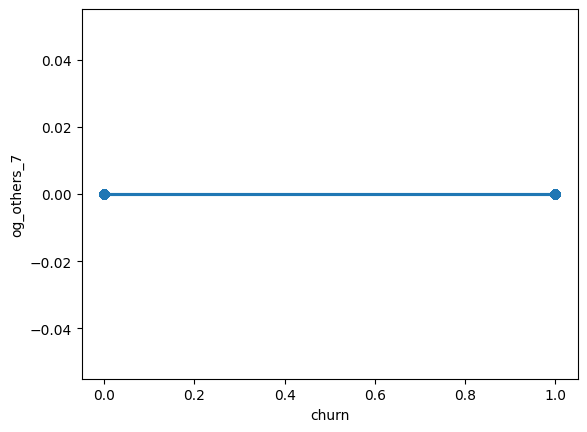

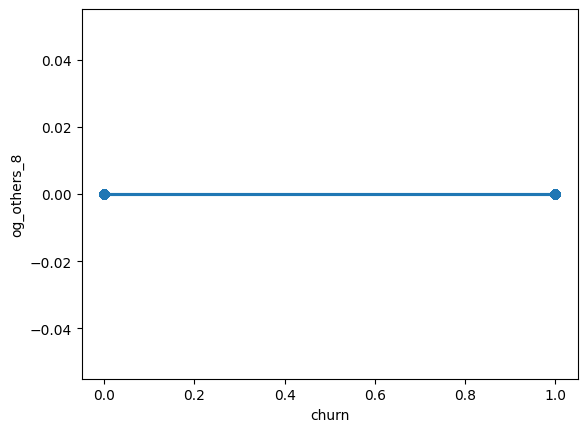

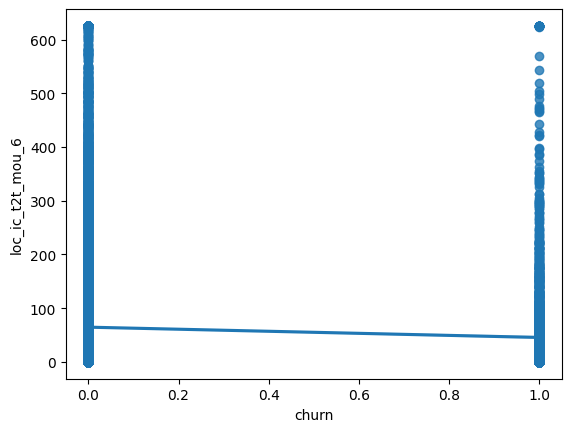

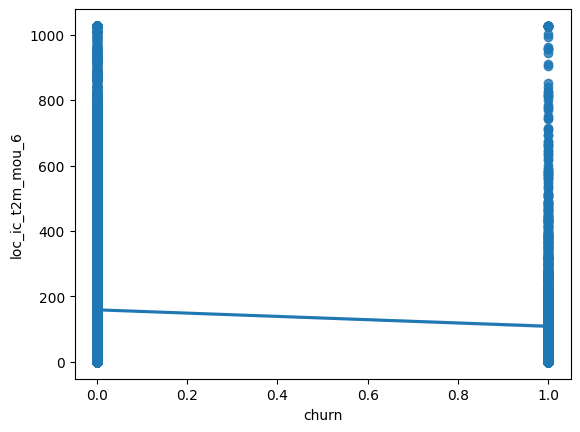

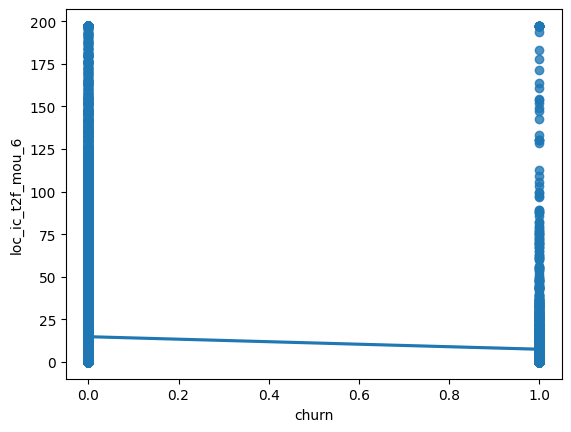

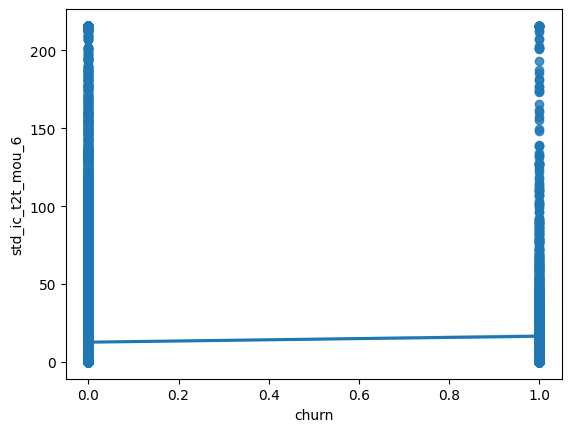

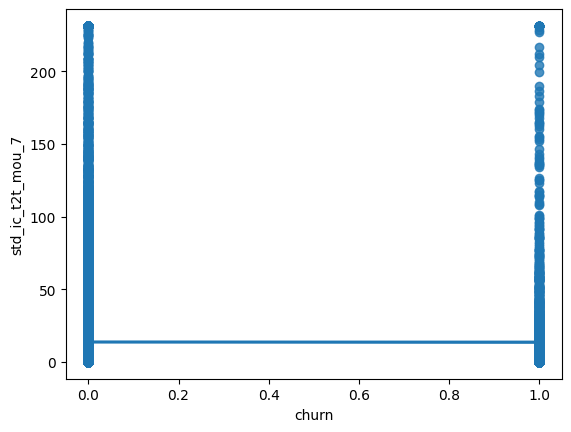

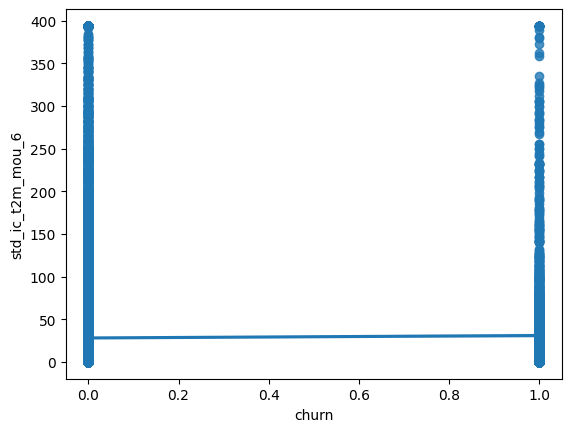

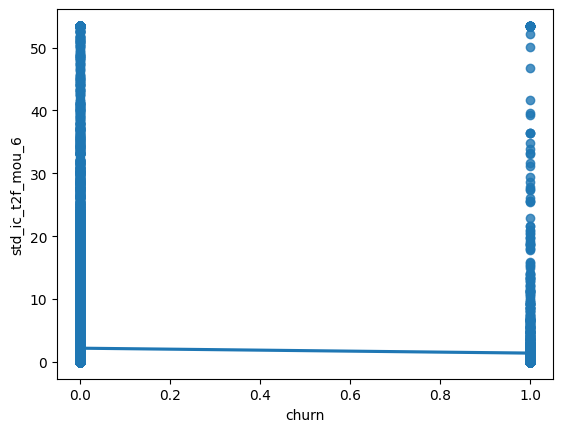

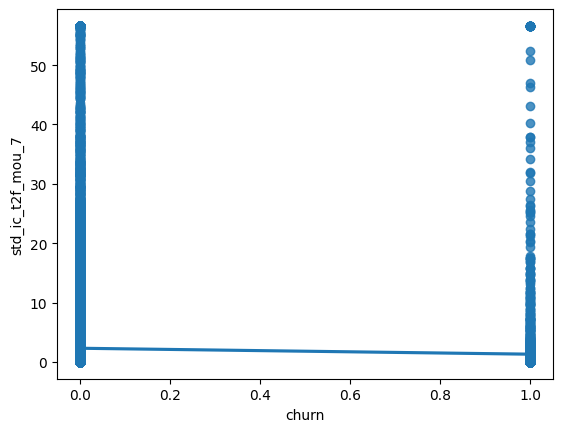

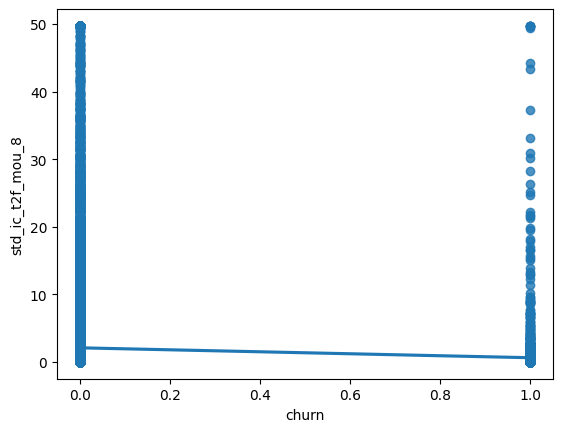

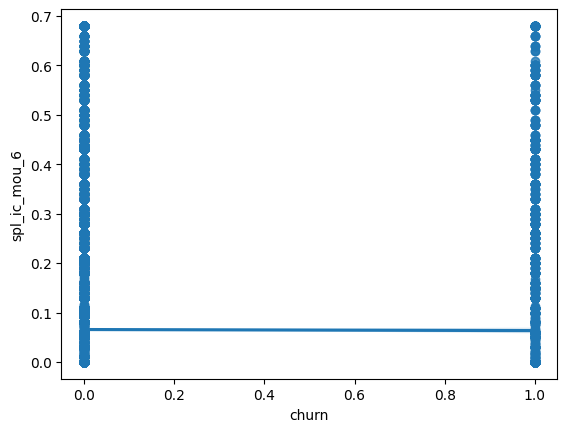

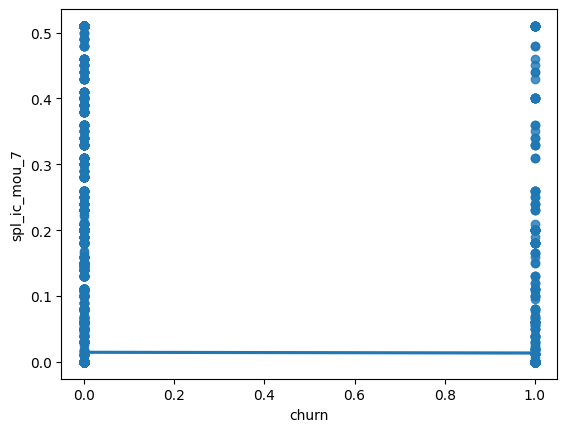

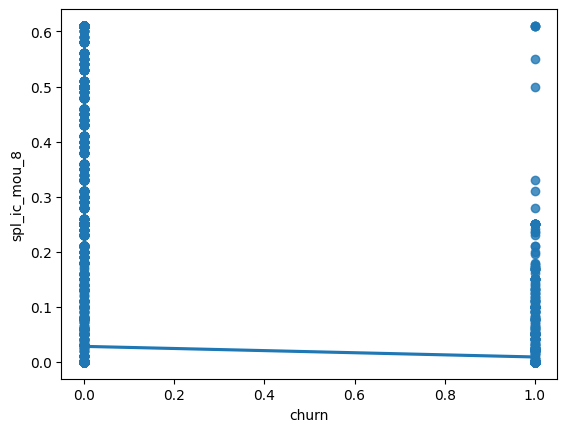

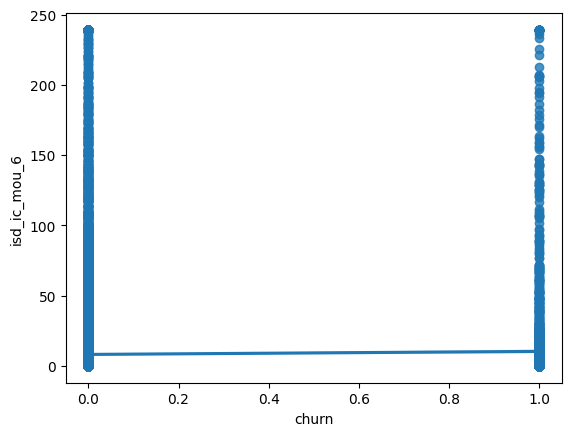

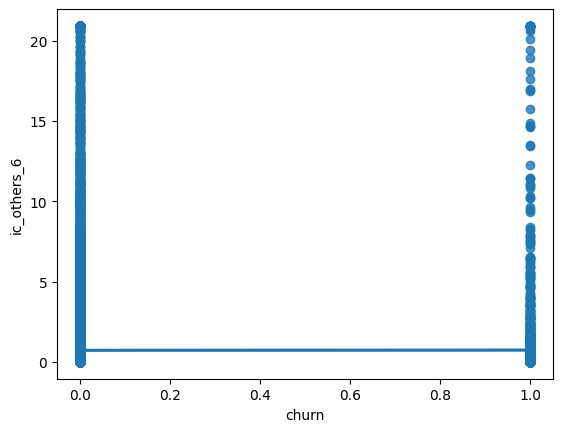

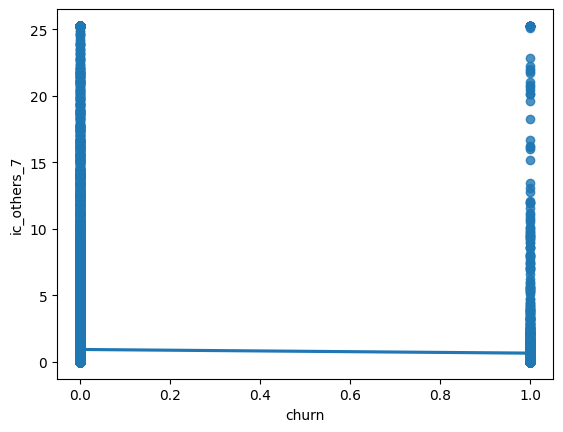

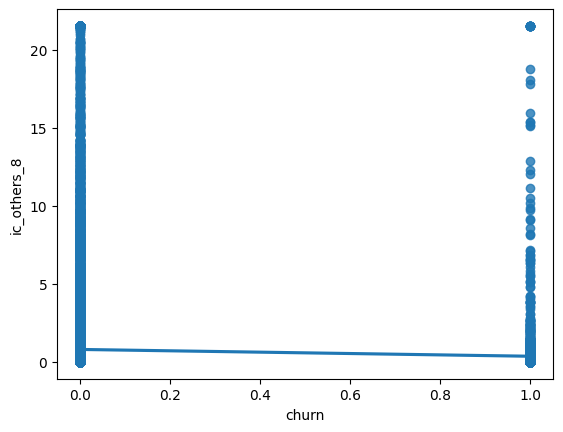

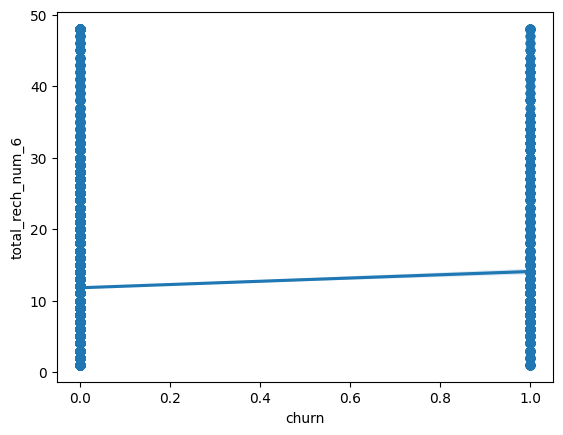

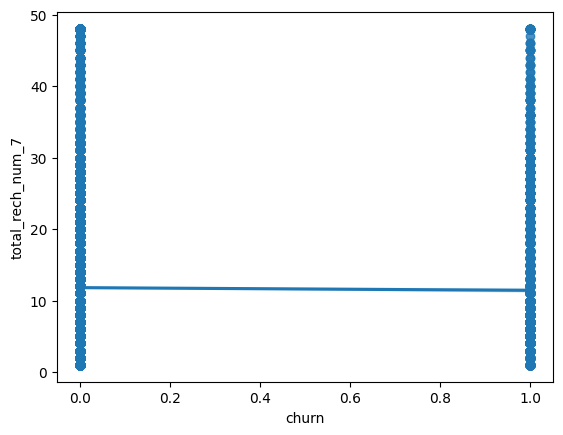

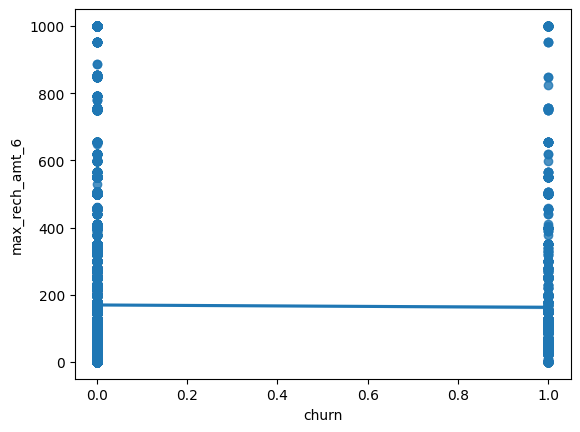

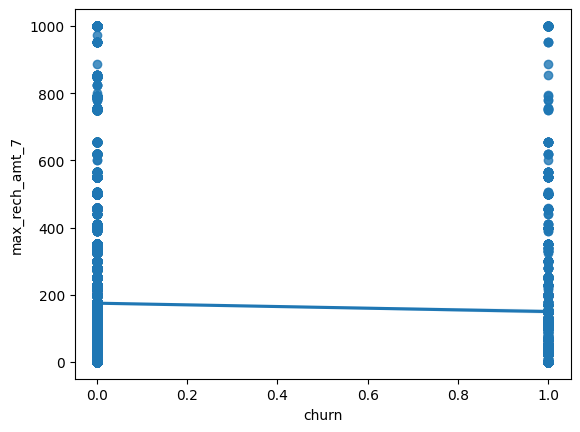

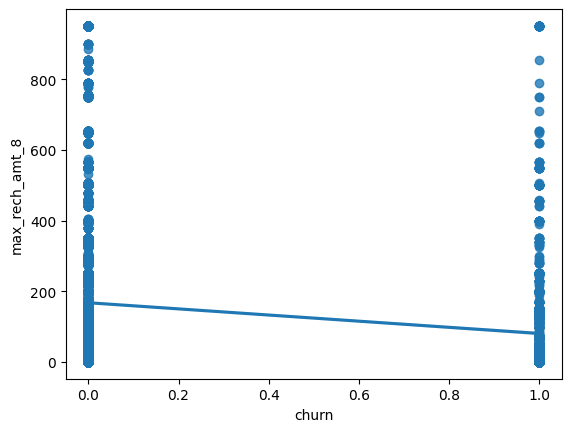

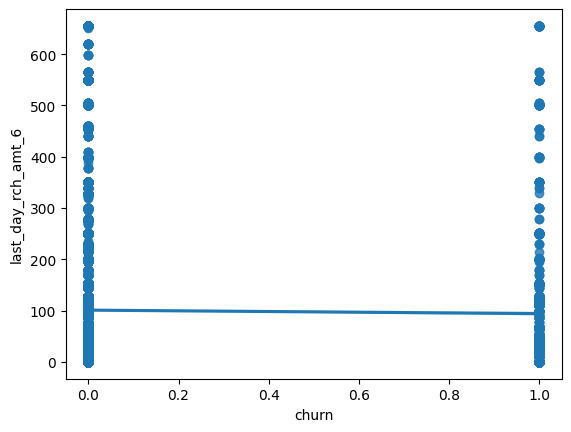

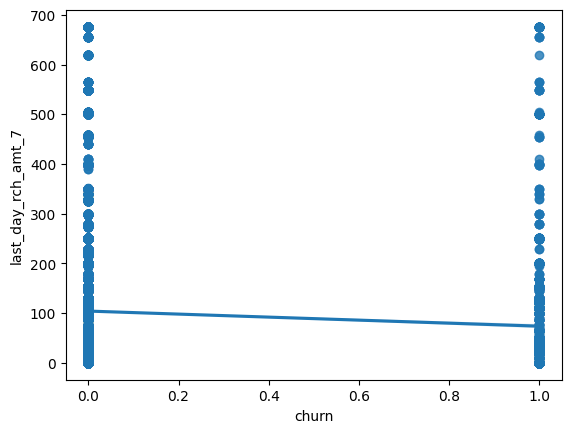

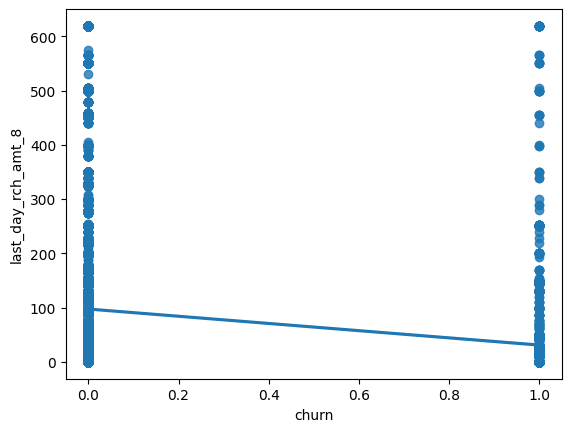

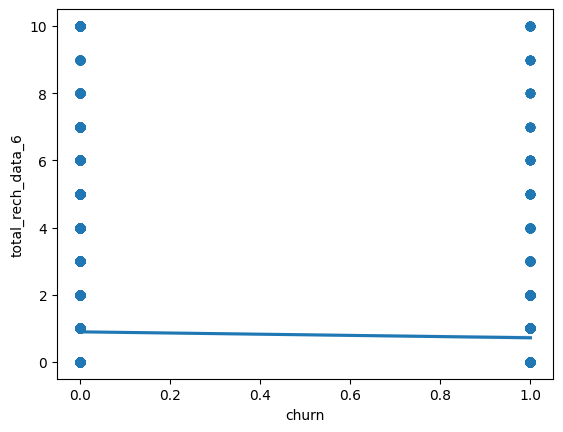

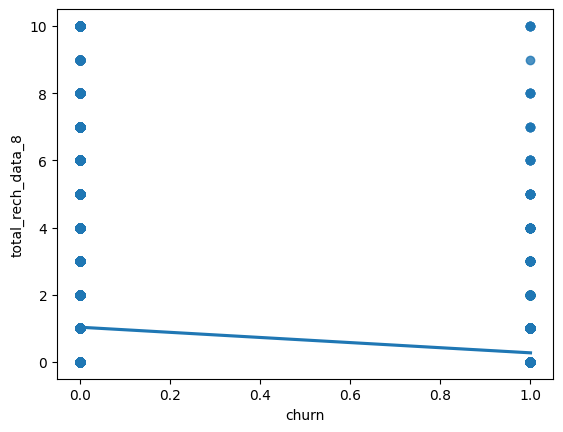

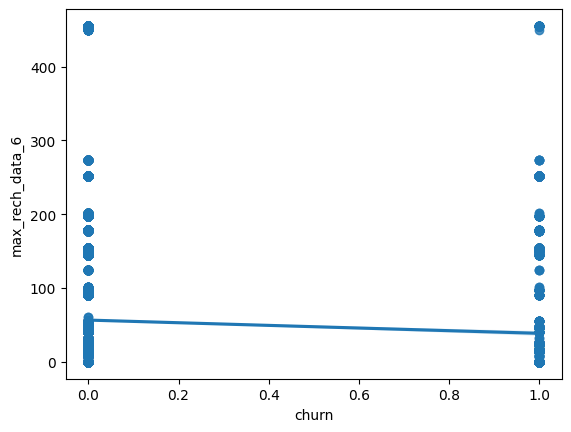

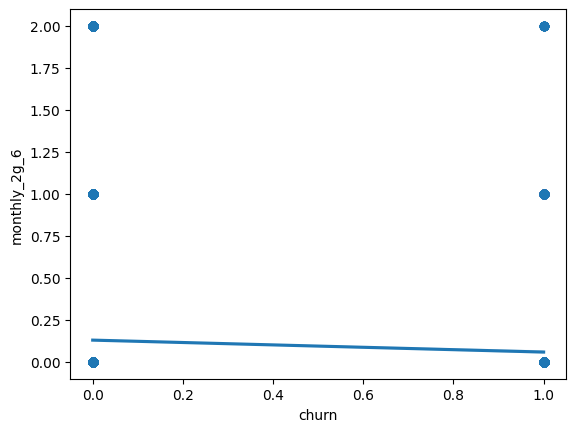

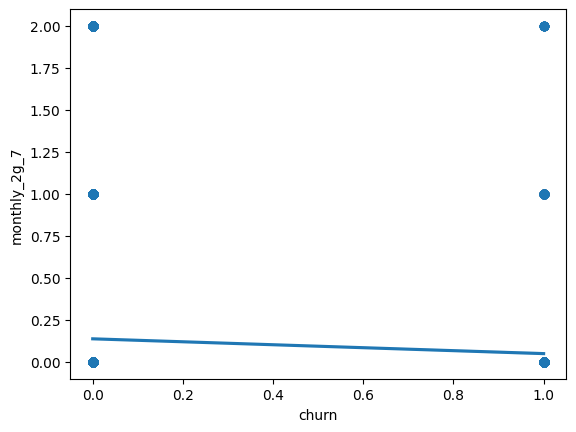

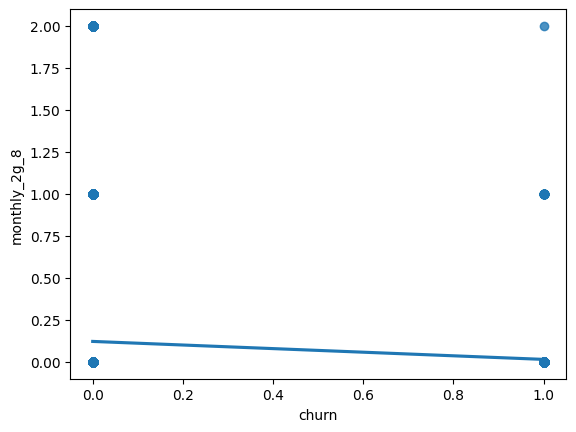

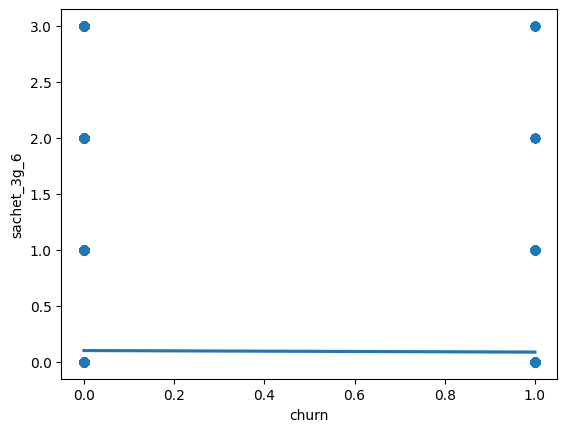

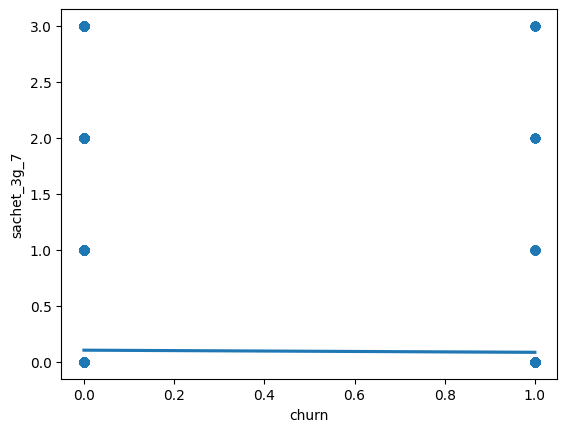

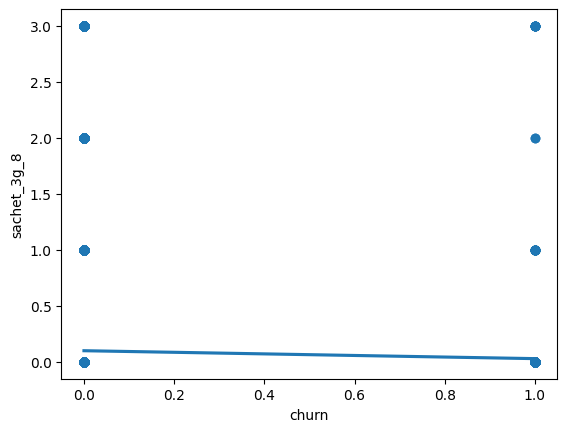

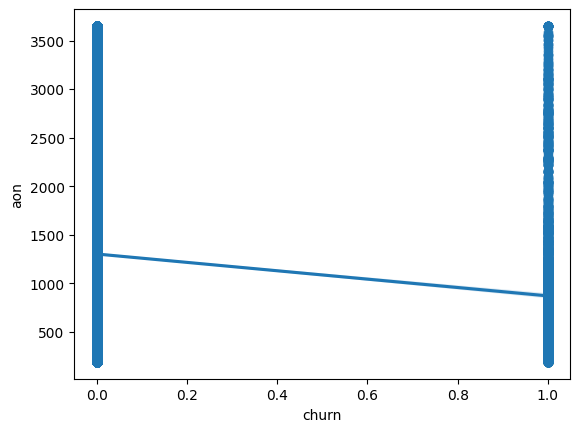

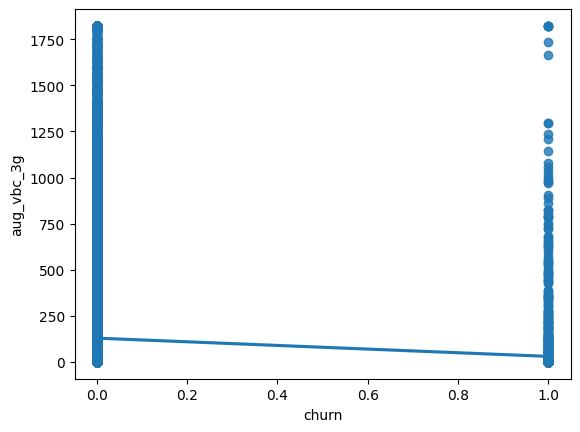

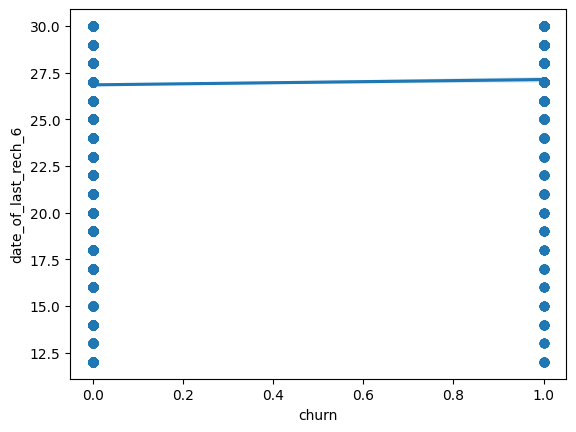

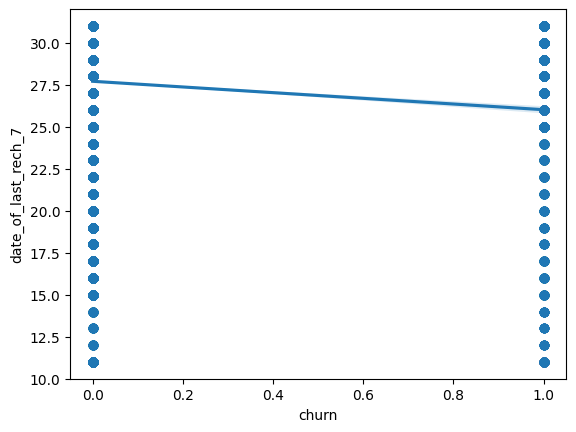

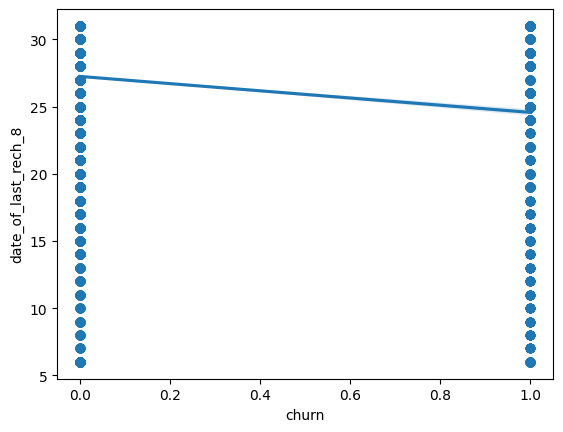

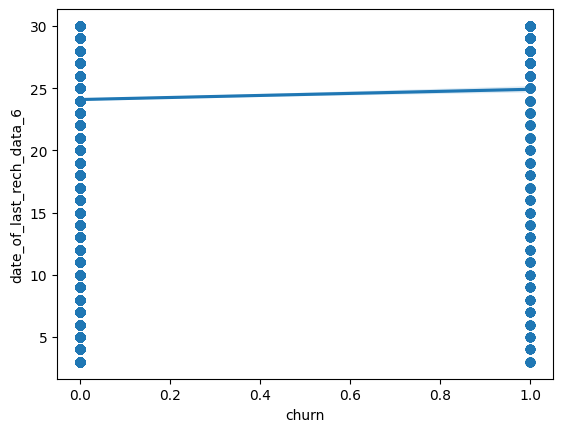

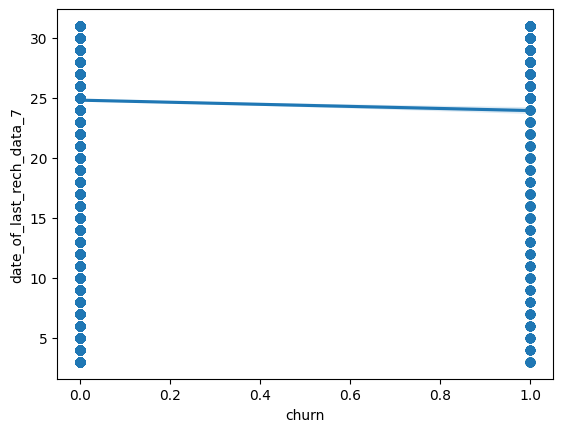

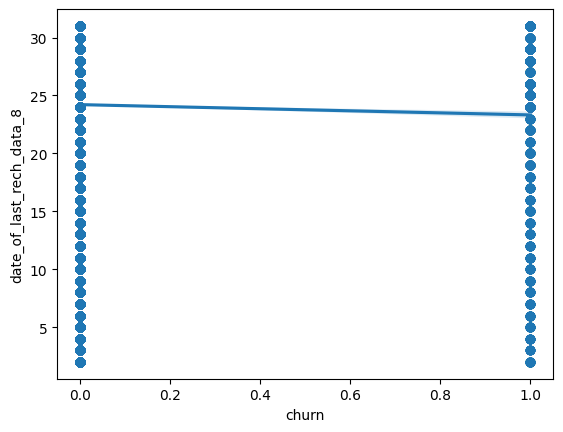

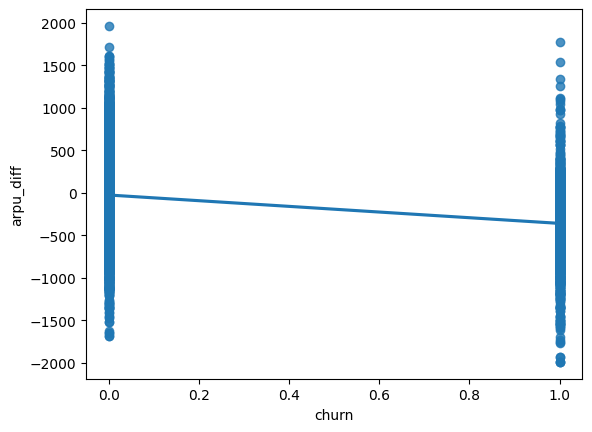

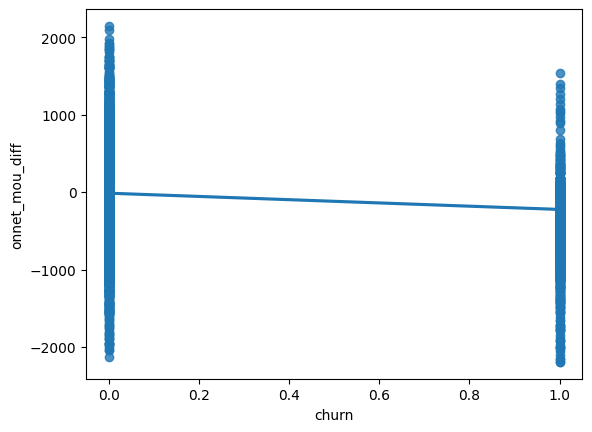

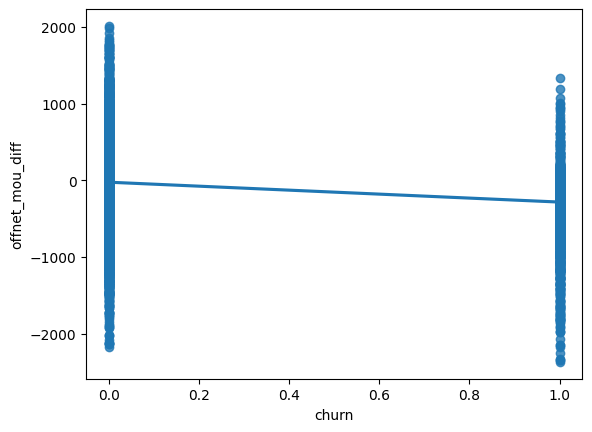

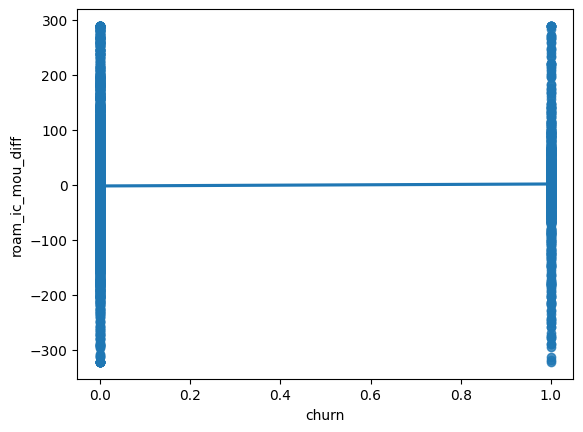

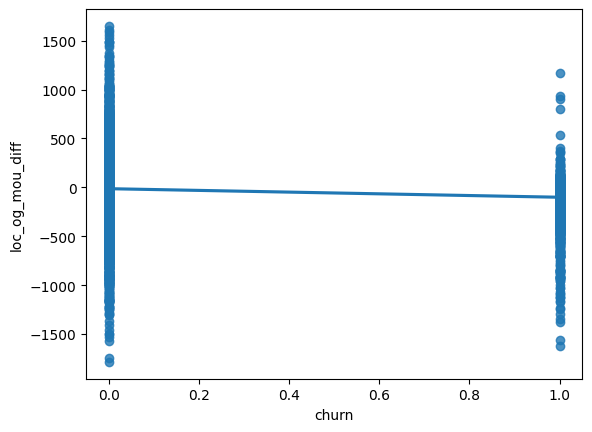

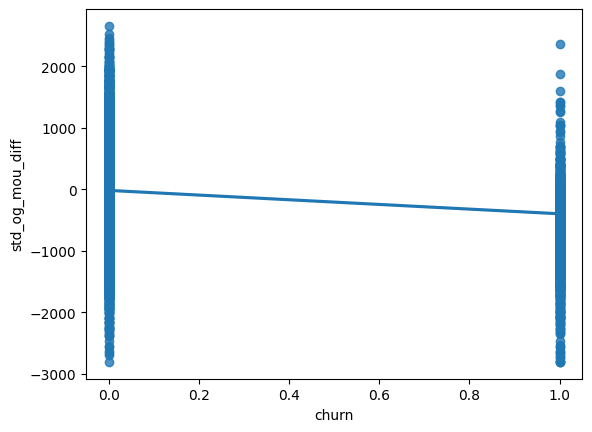

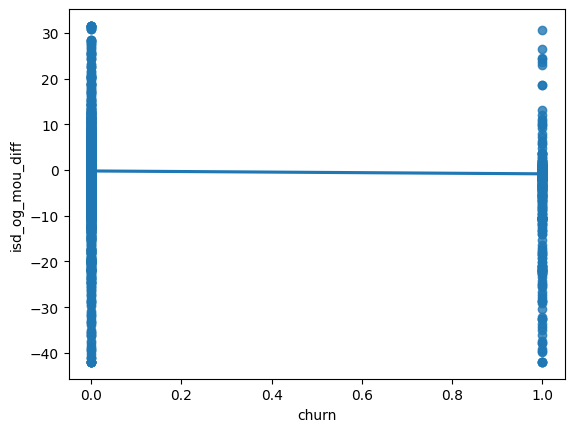

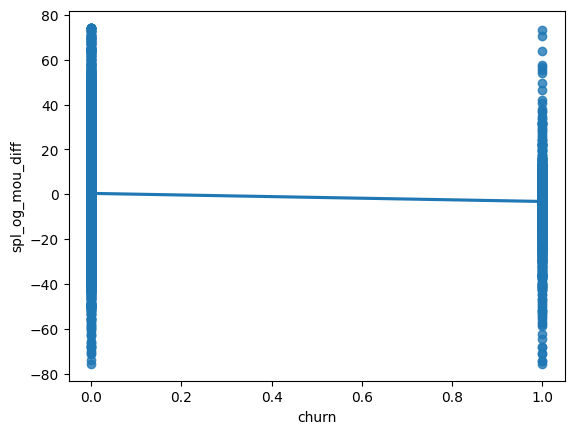

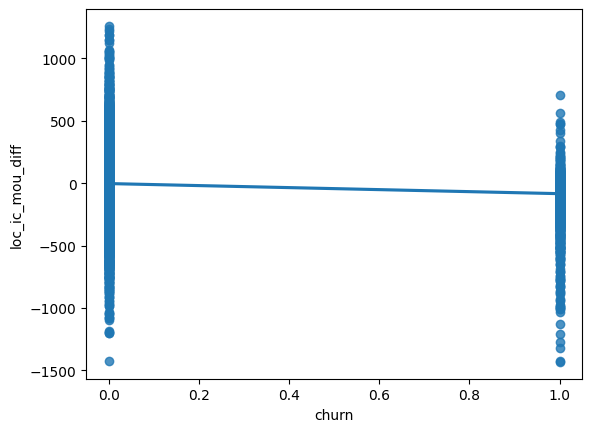

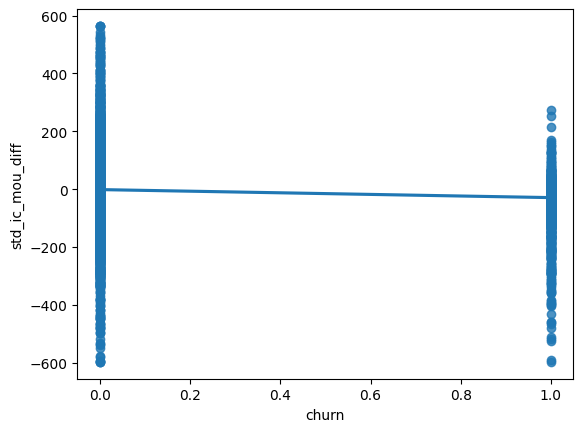

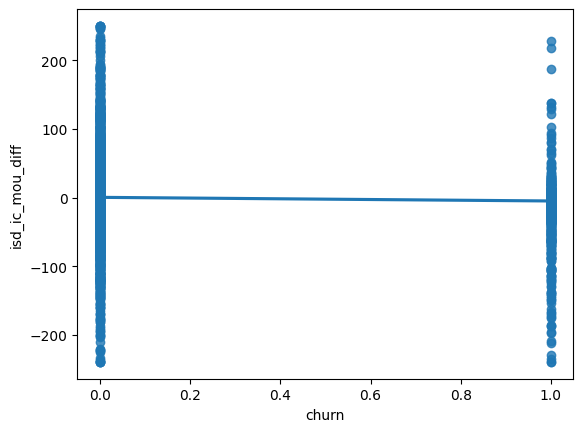

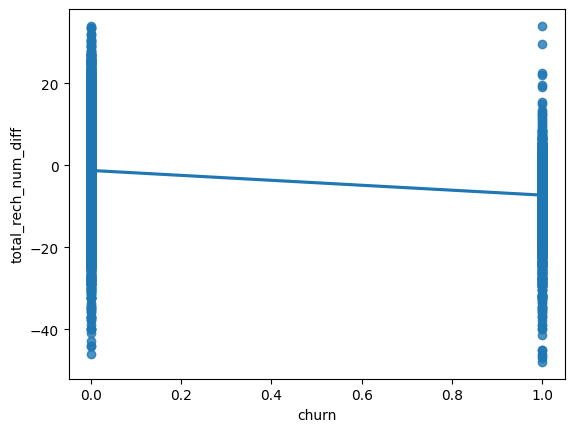

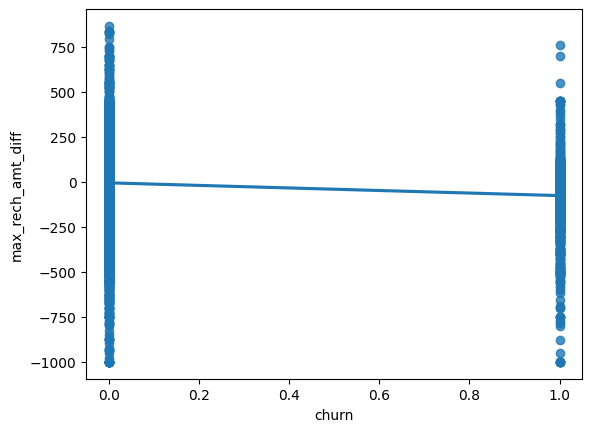

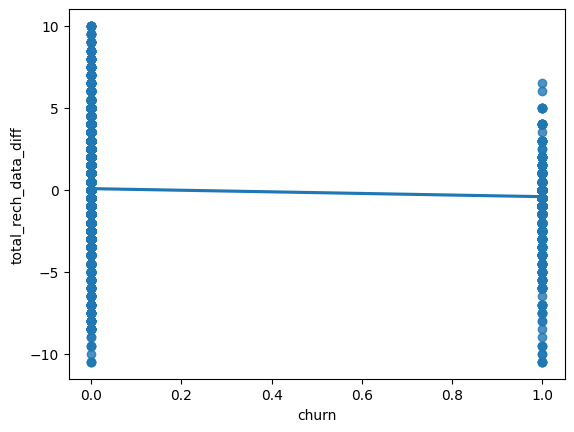

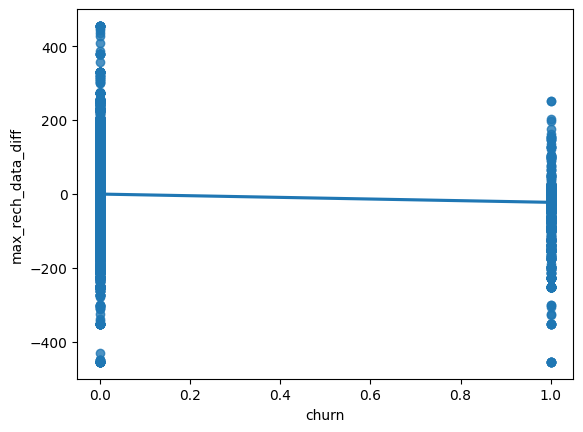

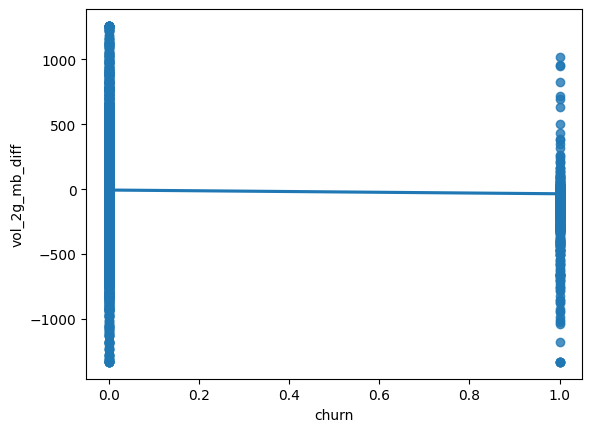

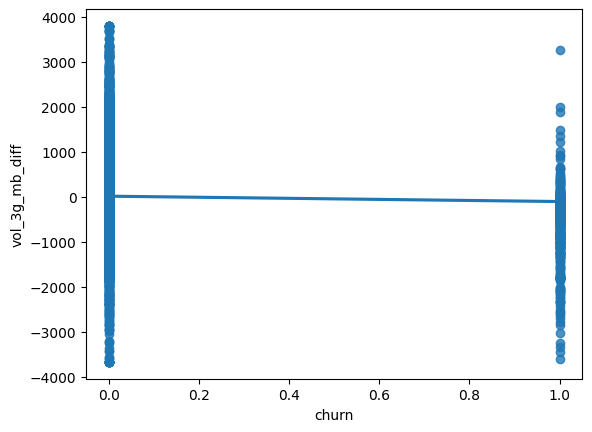

In [35]:
#Bivariate Analysis of all columns
for i in df3.columns:    
    bivariate(df3['churn'], df3[i])

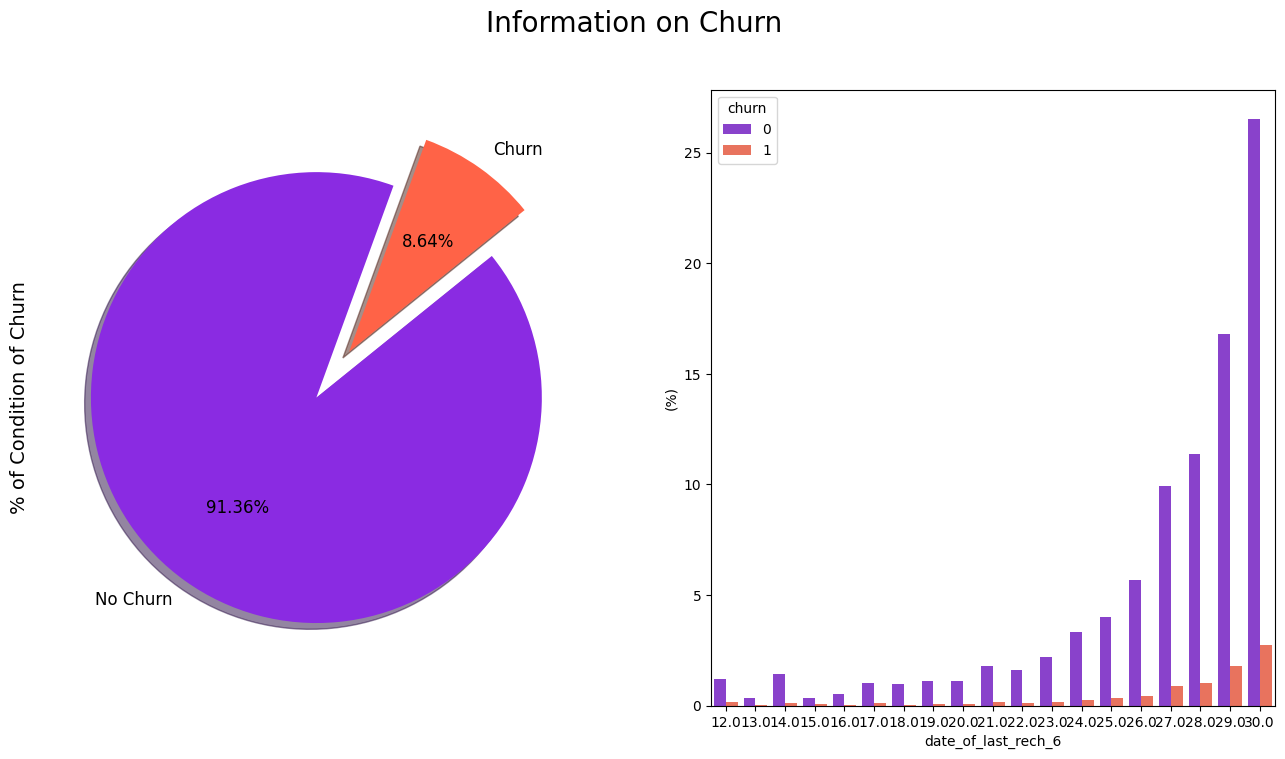

In [36]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#8A2BE2", "#FF6347"]

labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)

df3["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Churn', fontsize=14)

palette = ["#8A2BE2", "#FF6347"]
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=df3, palette=palette, estimator=lambda x: len(x) / len(df3) * 100)
ax[1].set(ylabel="(%)")
plt.show()

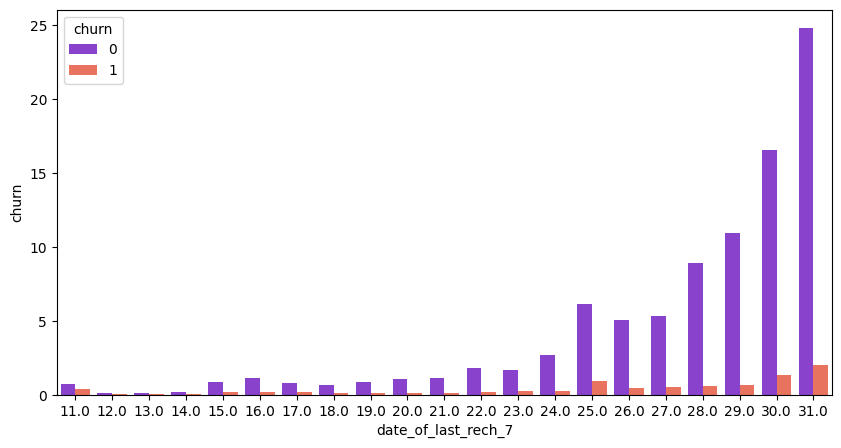

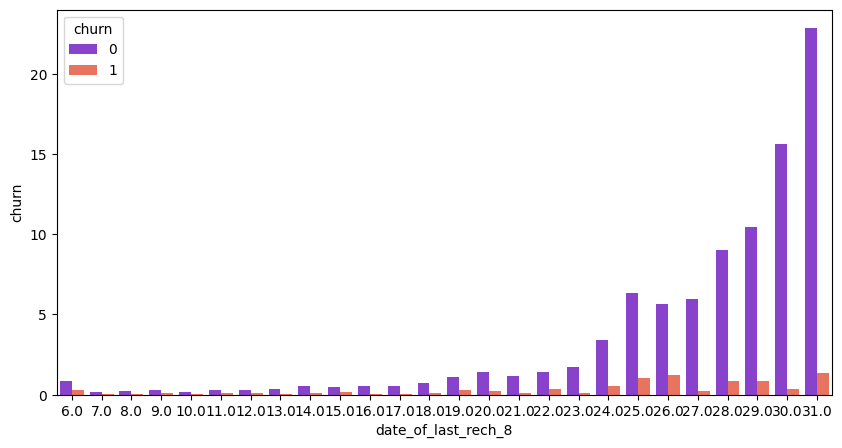

In [37]:
plt.figure(figsize=(10,5))
palette = ["#8A2BE2", "#FF6347"]
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=df3, palette=palette, 
            estimator=lambda x: len(x) / len(df3) * 100)

plt.figure(figsize=(10,5))
palette = ["#8A2BE2", "#FF6347"]
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=df3, palette=palette, 
            estimator=lambda x: len(x) / len(df3) * 100)

plt.show()

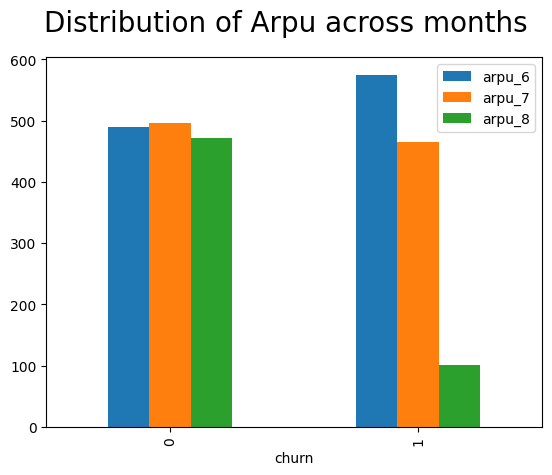

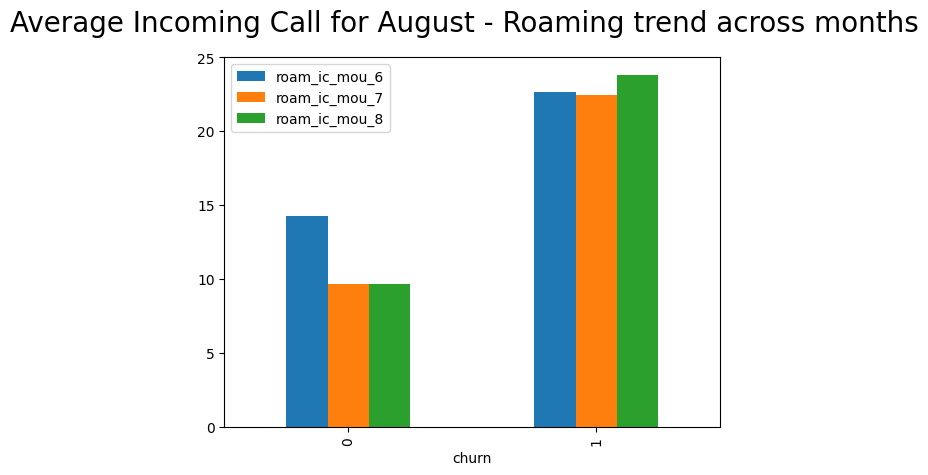

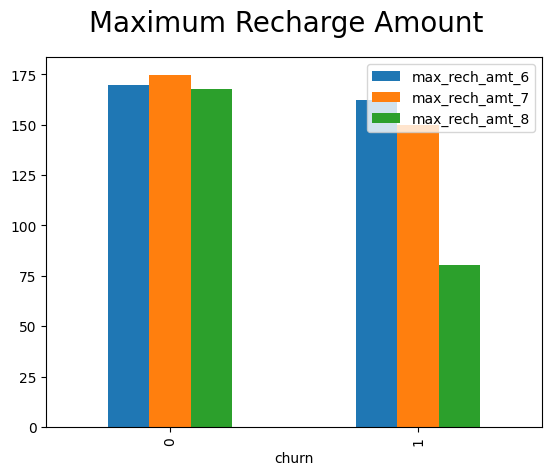

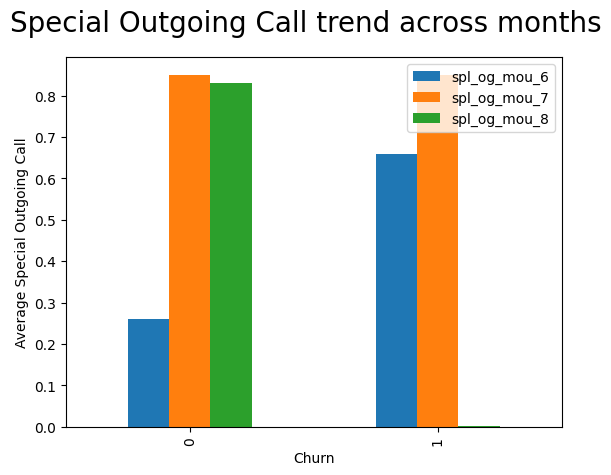

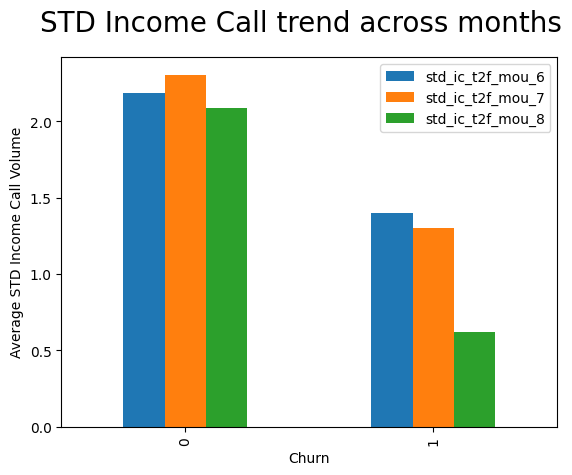

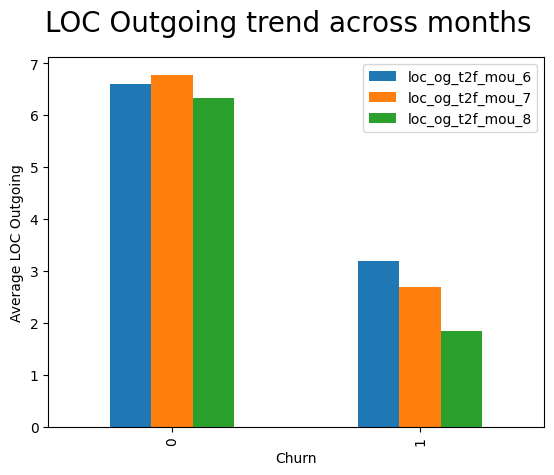

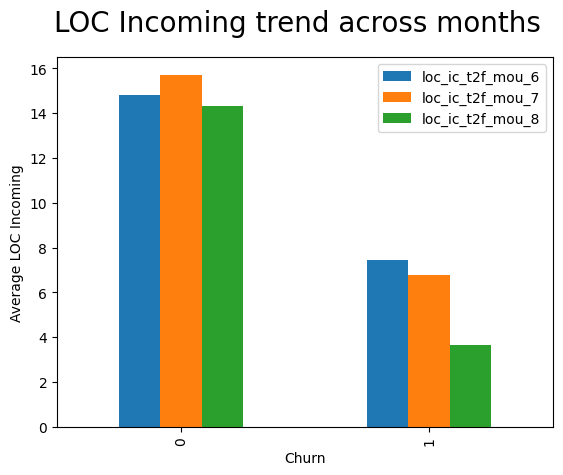

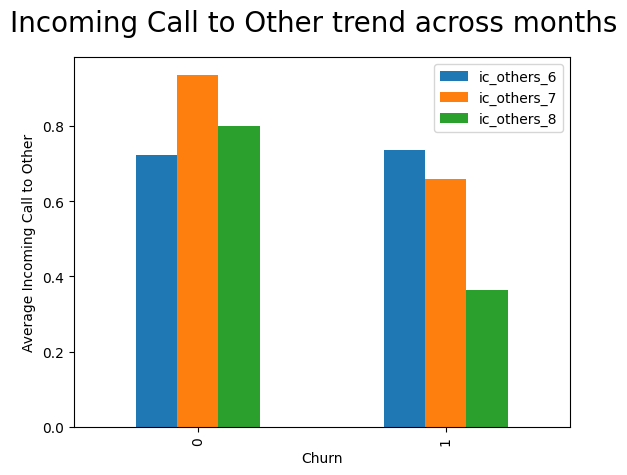

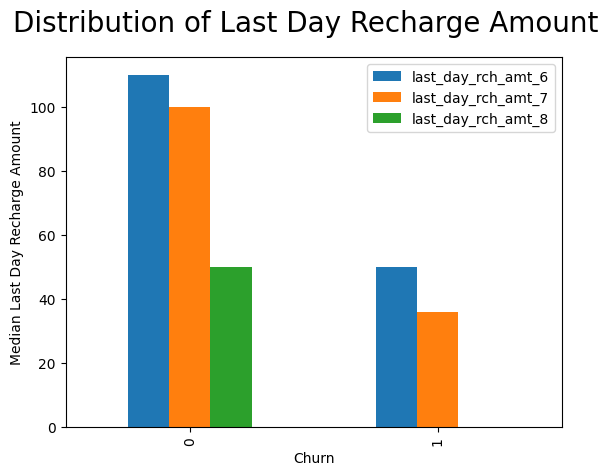

In [38]:
df2['churn'] = df2['churn'].astype('object', copy=False)

# Distribution of ARPU across months
df_sample = df2.groupby(['churn'])[['arpu_6', 'arpu_7', 'arpu_8']].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Arpu across months', fontsize=20)
plt.show()

# Average Incoming Call for August - Roaming trend across months
df_sample = df2.groupby(['churn'])[['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8']].mean()
df_sample.plot.bar()
plt.suptitle('Average Incoming Call for August - Roaming trend across months', fontsize=20)
plt.show()

# Maximum Recharge Amount
df_sample = df2.groupby(['churn'])[['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8']].mean()
df_sample.plot.bar()
plt.suptitle('Maximum Recharge Amount', fontsize=20)
plt.show()

# Special Outgoing Call trend across months
df_sample = df2.groupby(['churn'])[['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8']].median()
df_sample.plot.bar()
plt.suptitle('Special Outgoing Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average Special Outgoing Call")
plt.show()

# STD Incoming Call trend across months
df_sample = df2.groupby(['churn'])[['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8']].mean()
df_sample.plot.bar()
plt.suptitle('STD Income Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average STD Income Call Volume")
plt.show()

# LOC Outgoing trend across months
df_sample = df2.groupby(['churn'])[['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8']].mean()
df_sample.plot.bar()
plt.suptitle('LOC Outgoing trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC Outgoing")
plt.show()

# LOC Incoming trend across months
df_sample = df2.groupby(['churn'])[['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']].mean()
df_sample.plot.bar()
plt.suptitle('LOC Incoming trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC Incoming")
plt.show()

# Incoming call to Other trend across months
df_sample = df2.groupby(['churn'])[['ic_others_6', 'ic_others_7', 'ic_others_8']].mean()
df_sample.plot.bar()
plt.suptitle('Incoming Call to Other trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average Incoming Call to Other")
plt.show()

# Distribution of Last Day Recharge Amount
df_sample = df2.groupby(['churn'])[['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Last Day Recharge Amount', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Median Last Day Recharge Amount")
plt.show()


In [39]:
# Putting feature variable to X
X = df3.drop(['churn'],axis=1)
# Putting response variable to y
y = df3['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (20985, 83)
Number transactions y_train dataset:  (20985,)
Number transactions X_test dataset:  (8994, 83)
Number transactions y_test dataset:  (8994,)


In [40]:
type(X_test)

pandas.core.frame.DataFrame

## Scaling using MinMax Scaler

In [41]:
#Scaling the values uisng MinMax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

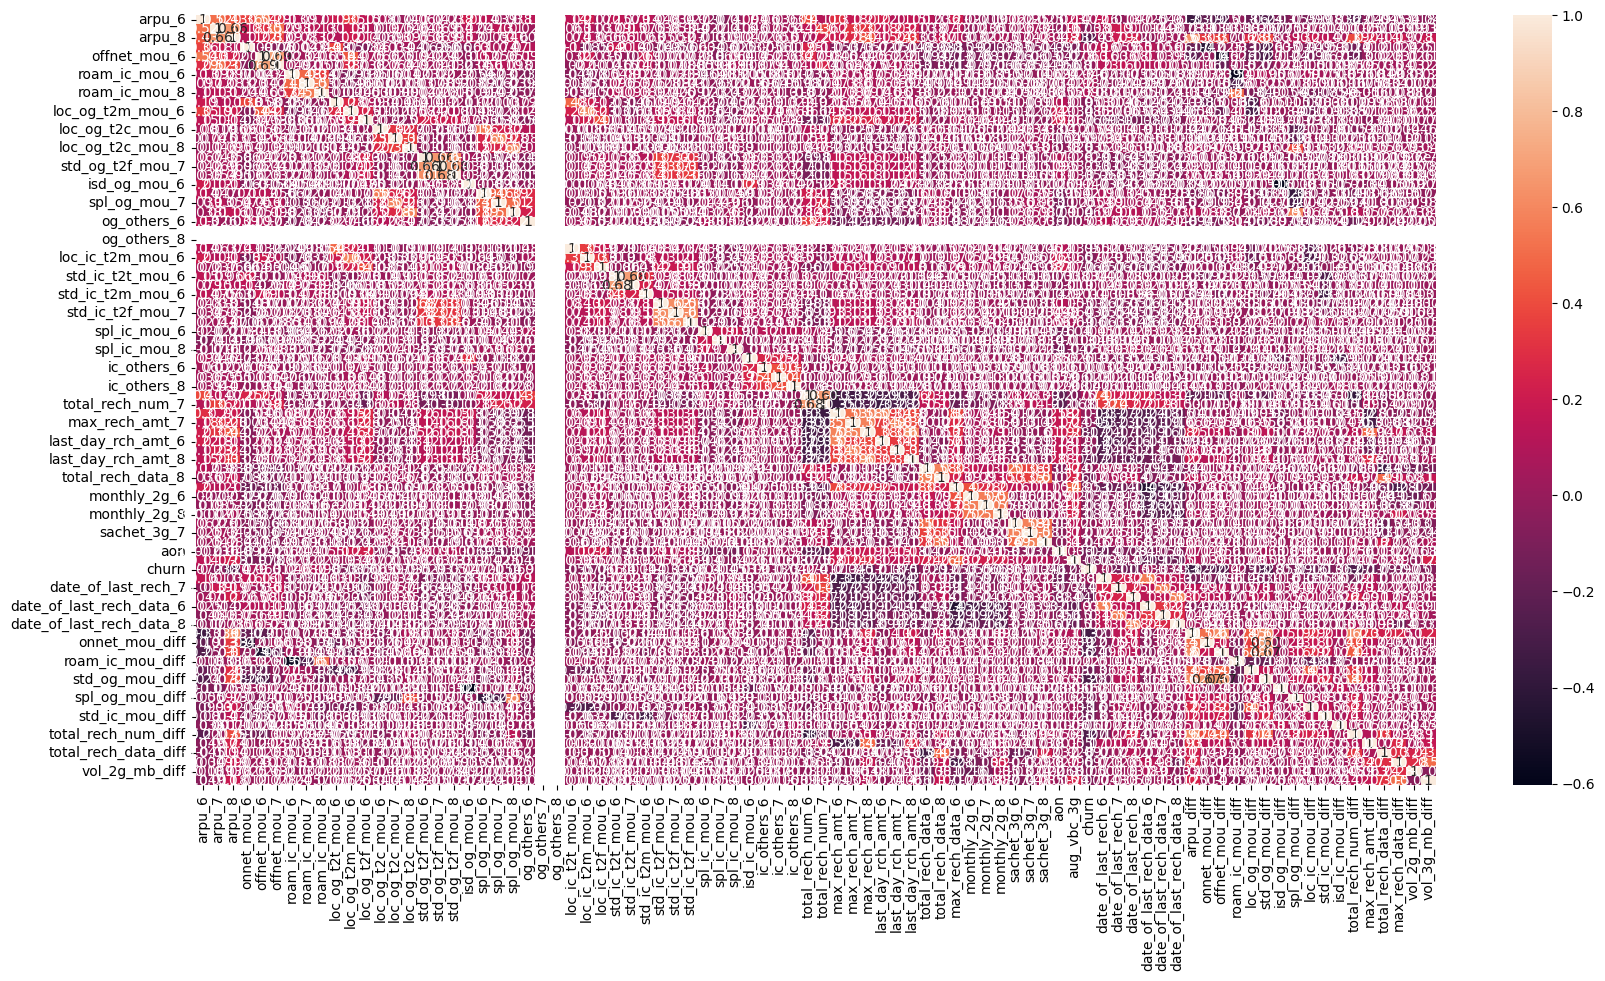

In [42]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df3.corr(),annot = True)
plt.show()

#### Creating the Dataframes as and when needed

In [43]:
X_train_df=pd.DataFrame(data = X_train, columns = X.columns[:])

In [44]:
X_test_df=pd.DataFrame(data = X_test, columns = X.columns[:])

In [45]:
y_train_df=pd.DataFrame(data = y_train, columns =['churn'])

In [46]:
y_test_df=pd.DataFrame(data = y_test, columns = ['churn'])

# Creating initial RFE for Feature Elimination 

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=16)  # Use keyword argument n_features_to_select
rfe = rfe.fit(X_train_df, y_train_df)

# Now, you can print the selected features and their rankings
list(zip(X_train_df.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 42),
 ('arpu_7', False, 19),
 ('arpu_8', False, 8),
 ('onnet_mou_6', False, 50),
 ('offnet_mou_6', False, 27),
 ('offnet_mou_7', False, 28),
 ('roam_ic_mou_6', False, 30),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 6),
 ('loc_og_t2t_mou_6', False, 11),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2f_mou_6', False, 38),
 ('loc_og_t2c_mou_6', False, 33),
 ('loc_og_t2c_mou_7', False, 56),
 ('loc_og_t2c_mou_8', False, 17),
 ('std_og_t2f_mou_6', False, 58),
 ('std_og_t2f_mou_7', False, 61),
 ('std_og_t2f_mou_8', False, 21),
 ('isd_og_mou_6', False, 7),
 ('spl_og_mou_6', False, 44),
 ('spl_og_mou_7', False, 43),
 ('spl_og_mou_8', False, 16),
 ('og_others_6', False, 53),
 ('og_others_7', False, 67),
 ('og_others_8', False, 68),
 ('loc_ic_t2t_mou_6', False, 2),
 ('loc_ic_t2m_mou_6', True, 1),
 ('loc_ic_t2f_mou_6', False, 5),
 ('std_ic_t2t_mou_6', False, 62),
 ('std_ic_t2t_mou_7', False, 52),
 ('std_ic_t2m_mou_6', False, 25),
 ('std_ic_t2f_mou_6', False, 45),
 ('std

# Creating Logistic Regression model with RFE

In [48]:
#Building a basic logistic regression model
col = X_train_df.columns[rfe.support_]

X_train_rfe=X_train_df[col]
model_lrrfe = logreg.fit(X_train_rfe,y_train)
pred_probs_test = model_lrrfe.predict_proba(X_test_df[col])[:,1]
roc_auc_score(y_test, pred_probs_test)


0.8736382340829462

In [49]:
#Making prediction on the test data
pred_test = model_lrrfe.predict_proba(X_test_df[col])
y_pred_default = model_lrrfe.predict(X_test_df[col])
# print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6644 1535]
 [ 140  675]]
0.8137647320435846


In [50]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [51]:

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

In [52]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [53]:
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8736382340829462


In [54]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

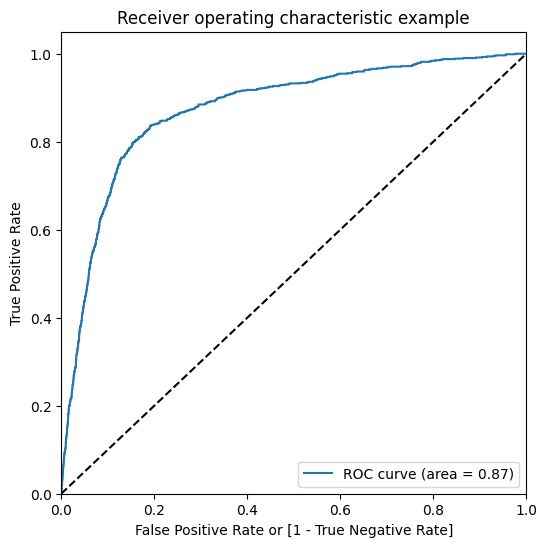

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.031668    1    0    0    0    0    0    0    0    0    0
1      0    0.070754    1    0    0    0    0    0    0    0    0    0
2      0    0.222158    1    1    1    0    0    0    0    0    0    0
3      0    0.192247    1    1    0    0    0    0    0    0    0    0
4      0    0.364607    1    1    1    1    0    0    0    0    0    0

In [55]:
#Plotting ROC Curve
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

In [56]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.090616  0.000000  1.000000
0.1   0.1  0.322882  0.258222  0.971779
0.2   0.2  0.488993  0.443820  0.942331
0.3   0.3  0.629642  0.600929  0.917791
0.4   0.4  0.736936  0.723438  0.872393
0.5   0.5  0.813765  0.812324  0.828221
0.6   0.6  0.860907  0.870767  0.761963
0.7   0.7  0.889704  0.916249  0.623313
0.8   0.8  0.903046  0.948404  0.447853
0.9   0.9  0.910718  0.980438  0.211043


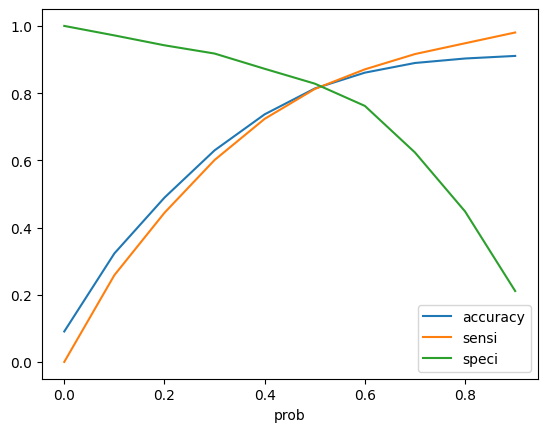

In [57]:
#Plotting the data in a line plot
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [58]:
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold'])

In [59]:
# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.514574104526291]


In [60]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)
y_pred_final.churn.value_counts()

churn
0    8179
1     815
Name: count, dtype: int64

In [61]:
#Creating confusion matrix
confusion = confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6587, 1592],
       [ 132,  683]], dtype=int64)

In [62]:
#Model Evaluation
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))
# positive predictive value 
print('Precision: ', TP / float(TP+FP))
# Negative predictive value
print('Recall: ',TN / float(TN+ FN))
## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8137647320435846
Sensitivity:  0.838036809815951
Specificity:  0.8053551778946081
False postive rate:  0.19464482210539186
Precision:  0.30021978021978024
Recall:  0.9803542193778836
Misclassification Rate:  0.19168334445185678


# Tuning VIF

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_df[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_df[col].values, i) for i in range(X_train_df[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
9       std_og_mou_diff  592.11
7       offnet_mou_diff  478.59
6        onnet_mou_diff  427.28
8       loc_og_mou_diff  393.06
10      loc_ic_mou_diff  126.96
11      std_ic_mou_diff   99.58
12      isd_ic_mou_diff   93.99
15       vol_3g_mb_diff   91.02
13  total_rech_num_diff   82.09
14   max_rech_data_diff   65.96
5   date_of_last_rech_8   21.63
1      loc_og_t2m_mou_6    2.93
2      loc_ic_t2m_mou_6    2.87
3    last_day_rch_amt_8    1.91
4     total_rech_data_8    1.37
0         roam_ic_mou_7    1.09

In [64]:
print(col)

Index(['roam_ic_mou_7', 'loc_og_t2m_mou_6', 'loc_ic_t2m_mou_6',
       'last_day_rch_amt_8', 'total_rech_data_8', 'date_of_last_rech_8',
       'onnet_mou_diff', 'offnet_mou_diff', 'loc_og_mou_diff',
       'std_og_mou_diff', 'loc_ic_mou_diff', 'std_ic_mou_diff',
       'isd_ic_mou_diff', 'total_rech_num_diff', 'max_rech_data_diff',
       'vol_3g_mb_diff'],
      dtype='object')


In [65]:
# Dropping the PhoneService column 'arpu_6','arpu_7','arpu_8'
col = col.drop(['onnet_mou_diff','std_og_mou_diff','vol_3g_mb_diff','max_rech_data_diff','std_ic_mou_diff','isd_ic_mou_diff','total_rech_num_diff','loc_ic_mou_diff','loc_og_mou_diff','offnet_mou_diff'], 1)

In [66]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_df[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_df[col].values, i) for i in range(X_train_df[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1     loc_og_t2m_mou_6  2.63
2     loc_ic_t2m_mou_6  2.62
5  date_of_last_rech_8  2.45
3   last_day_rch_amt_8  1.60
4    total_rech_data_8  1.31
0        roam_ic_mou_7  1.07

### Recreating the Logistic model again with uncorrelated Features

In [67]:
#Building a basic logistic regression model
#col = X_train_df.columns[rfe.support_]

X_train_rfe=X_train_df[col]
model_lrrfe = logreg.fit(X_train_rfe,y_train)
pred_probs_test = model_lrrfe.predict_proba(X_test_df[col])[:,1]
roc_auc_score(y_test, pred_probs_test)

0.8258316037555407

In [68]:
#Making prediction on the test data
pred_test = model_lrrfe.predict_proba(X_test_df[col])
y_pred_default = model_lrrfe.predict(X_test_df[col])
# print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

[[5943 2236]
 [ 145  670]]
0.735267956415388


In [69]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8258316037555407


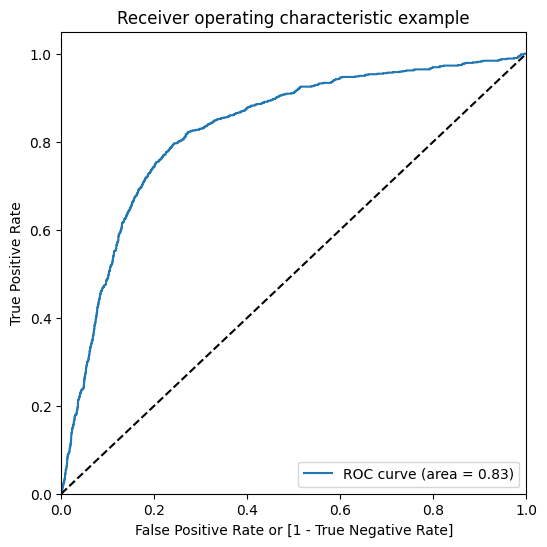

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.137798    1    1    0    0    0    0    0    0    0    0
1      0    0.195628    1    1    0    0    0    0    0    0    0    0
2      0    0.256398    1    1    1    0    0    0    0    0    0    0
3      0    0.258730    1    1    1    0    0    0    0    0    0    0
4      0    0.532246    1    1    1    1    1    1    0    0    0    0

In [70]:
#Plotting ROC Curve
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

     prob  accuracy     sensi     speci
0.0   0.0  0.090616  0.000000  1.000000
0.1   0.1  0.216478  0.140971  0.974233
0.2   0.2  0.336335  0.274361  0.958282
0.3   0.3  0.482099  0.437217  0.932515
0.4   0.4  0.594841  0.565595  0.888344
0.5   0.5  0.735268  0.726617  0.822086
0.6   0.6  0.835779  0.854994  0.642945
0.7   0.7  0.875473  0.919428  0.434356
0.8   0.8  0.895819  0.966622  0.185276
0.9   0.9  0.904714  0.986673  0.082209


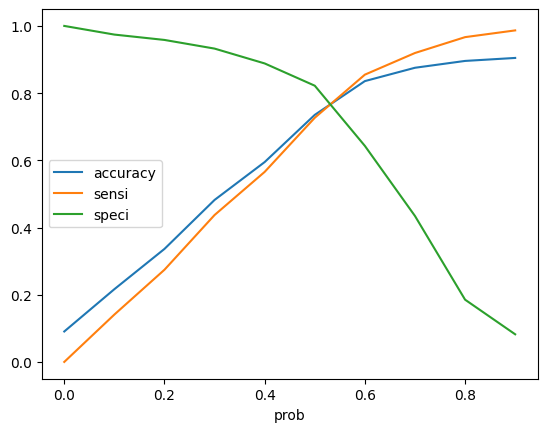

In [71]:

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

#Plotting the data in a line plot
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [72]:
# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.5336835745952012]


In [73]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)
y_pred_final.churn.value_counts()

churn
0    8179
1     815
Name: count, dtype: int64

In [74]:
#Creating confusion matrix
confusion = confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[5801, 2378],
       [ 141,  674]], dtype=int64)

In [75]:

#Model Evaluation
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))
# positive predictive value 
print('Precision: ', TP / float(TP+FP))
# Negative predictive value
print('Recall: ',TN / float(TN+ FN))
## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.735267956415388
Sensitivity:  0.8269938650306748
Specificity:  0.7092554101968456
False postive rate:  0.29074458980315443
Precision:  0.22083879423328964
Recall:  0.9762706159542242
Misclassification Rate:  0.2800756059595286


With just 6 features the model here is avoiding overfitting and is highly robust with and accuracy of .75

# Feature Reduction with PCA

In [76]:
# Since there is class imbalance, we have to handle it
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

#Doing the PCA on the train data
pca.fit(X_train)

colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.019424  0.329617 -0.045053 -0.164950 -0.038705 -0.136681  0.072762   
1 -0.011849  0.347668 -0.034030  0.034139 -0.147776 -0.098950 -0.081448   
2 -0.037028  0.363711 -0.024165  0.185640 -0.147375 -0.076676 -0.043515   
3  0.089443  0.092974 -0.003107 -0.164900 -0.075888 -0.031576  0.037119   
4  0.050708  0.279566  0.060007 -0.222824 -0.015822 -0.068535  0.075829   
5  0.058427  0.275485  0.059394 -0.085336 -0.100176 -0.046846 -0.040586   
6 -0.018159  0.028585  0.021684  0.024383 -0.098063 -0.065553 -0.028693   
7 -0.019027  0.032379  0.021620  0.001635 -0.083877 -0.067779 -0.010737   
8 -0.016893  0.048101  0.017569 -0.004794 -0.076899 -0.064323 -0.010205   
9 -0.021485  0.102565  0.017169 -0.083132  0.108330  0.018179  0.062133   

        PC8       PC9      PC10           Feature  
0  0.017387 -0.101400 -0.004406            arpu_6  
1 -0.055122 -0.073167 -0.066573            arpu_7  
2 -0.046176 -0.061654 -0.104814            arpu_8  
3  0.027685 -0.112156 -0.162798       onnet_mou_6  
4 -0.157656 -0.053501  0.106350      offnet_mou_6  
5 -0.192357 -0.032232  0.034777      offnet_mou_7  
6  0.033287 -0.019900 -0.131518     roam_ic_mou_6  
7  0.034785 -0.007248 -0.097302     roam_ic_mou_7  
8  0.028149 -0.000701 -0.086340     roam_ic_mou_8  
9 -0.018353 -0.072598  0.043572  loc_og_t2t_mou_6

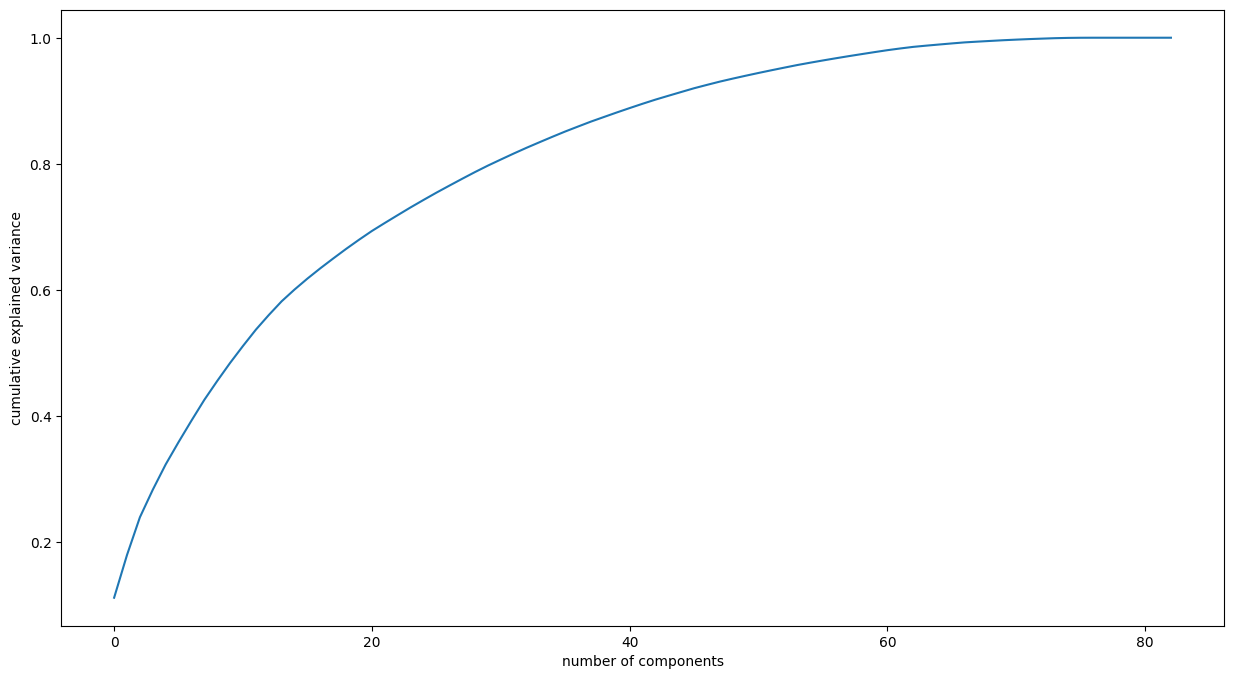

In [77]:
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [78]:
# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      11.17
1      17.95
2      23.93
3      28.30
4      32.31
5      35.85
6      39.26
7      42.56
8      45.55
9      48.42
10     51.11
11     53.69
12     56.01
13     58.19
14     60.06
15     61.79
16     63.43
17     64.98
18     66.50
19     67.95
20     69.34
21     70.61
22     71.85
23     73.08
24     74.26
25     75.42
26     76.52
27     77.62
28     78.69
29     79.71
30     80.67
31     81.62
32     82.54
33     83.42
34     84.28
35     85.12
36     85.92
37     86.70
38     87.42
39     88.14
40     88.84
41     89.52
42     90.18
43     90.79
44     91.39
45     91.99
46     92.52
47     93.04
48     93.51
49     93.97
50     94.41
51     94.84
52     95.25
53     95.66
54     96.04
55     96.40
56     96.74
57     97.08
58     97.40
59     97.72
60     98.02
61     98.30
62     98.55
63     98.74
64     98.92
65     99.10
66     99.26
67     99.38
68     99.49
69     99.60
70     99.70
71     99.78
72     99.86
73     99.93
74     99.97
75     99.99
76    100.00

50 components explain more than 95% of the variance.

In [79]:
pca_final = IncrementalPCA(n_components=50)
df_train_pca = pca_final.fit_transform(X_train)
df_test_pca = pca_final.transform(X_test)
df_train_pca.shape

(20985, 50)

In [80]:
#Checking the corelation of the new dataset
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("Maximum correlation:",corrmat_nodiag.max(), ", Minimum correlation: ", corrmat_nodiag.min(),)

Maximum correlation: 0.003395681634008261 , Minimum correlation:  -0.004169792931410313


Corelations are very close to zero which means the components are not having any problem of multicolinearity

## Logistic Regression with PCA

In [81]:
#Building a basic logistic regression model
lr_pca = LogisticRegression(class_weight='balanced')
model_lrpca = lr_pca.fit(df_train_pca,y_train)
pred_probs_test = model_lrpca.predict_proba(df_test_pca)[:,1]
roc_auc_score(y_test, pred_probs_test)

0.8761238755244052

In [82]:
#Making prediction on the test data
pred_test = model_lrpca.predict_proba(df_test_pca)
y_pred_default = model_lrpca.predict(df_test_pca)
# print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6765 1414]
 [ 165  650]]
0.8244385145652657


In [83]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [84]:
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8761238755244052


In [85]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

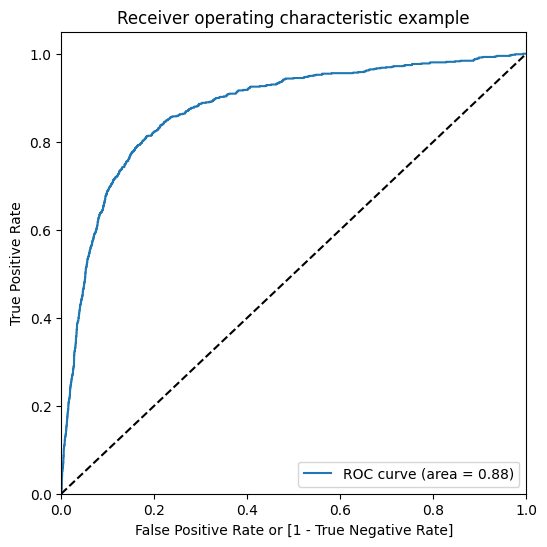

(array([0.        , 0.        , 0.        , ..., 0.99975547, 0.99987774,
        1.        ]),
 array([0.        , 0.00122699, 0.00245399, ..., 1.        , 1.        ,
        1.        ]),
 array([           inf, 9.98219841e-01, 9.97346247e-01, ...,
        1.86549512e-04, 5.06134928e-05, 3.88964217e-05]))

In [86]:
#Plotting ROC Curve
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [87]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.036262    1    0    0    0    0    0    0    0    0    0
1      0    0.165157    1    1    0    0    0    0    0    0    0    0
2      0    0.092213    1    0    0    0    0    0    0    0    0    0
3      0    0.463229    1    1    1    1    1    0    0    0    0    0
4      0    0.561689    1    1    1    1    1    1    0    0    0    0

In [88]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.090616  0.000000  1.000000
0.1   0.1  0.356460  0.295391  0.969325
0.2   0.2  0.529019  0.487590  0.944785
0.3   0.3  0.662108  0.637486  0.909202
0.4   0.4  0.758172  0.748013  0.860123
0.5   0.5  0.824439  0.827118  0.797546
0.6   0.6  0.864354  0.878347  0.723926
0.7   0.7  0.890927  0.916127  0.638037
0.8   0.8  0.907605  0.947915  0.503067
0.9   0.9  0.912608  0.977381  0.262577


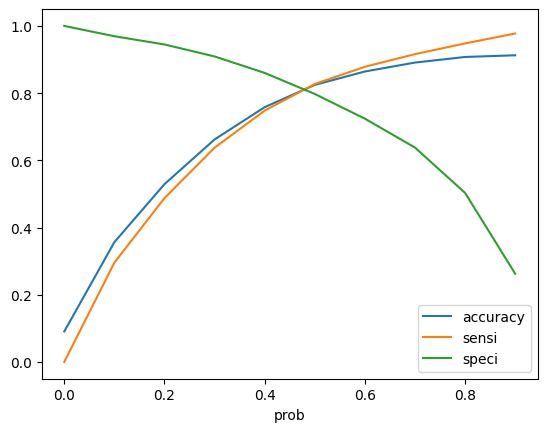

In [89]:
#Plotting the data in a line plot
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [90]:
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.47684191959402067]


Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0

In [91]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)
y_pred_final.churn.value_counts()

churn
0    8179
1     815
Name: count, dtype: int64

In [92]:
#Creating confusion matrix
confusion = confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6715, 1464],
       [ 159,  656]], dtype=int64)

In [93]:
#Model Evaluation
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))
# positive predictive value 
print('Precision: ', TP / float(TP+FP))
# Negative predictive value
print('Recall: ',TN / float(TN+ FN))
## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8244385145652657
Sensitivity:  0.8049079754601227
Specificity:  0.8210050128377552
False postive rate:  0.17899498716224477
Precision:  0.30943396226415093
Recall:  0.9768693628164097
Misclassification Rate:  0.18045363575717144


## Decision Tree Classifier with PCA

In [94]:
# Fitting decision tree classifier with default hyperparameters
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [95]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86      8179
           1       0.22      0.66      0.34       815

    accuracy                           0.76      8994
   macro avg       0.59      0.72      0.60      8994
weighted avg       0.89      0.76      0.81      8994

[[6328 1851]
 [ 278  537]]
Acuracy Score 0.763286635534801


In [96]:
#Printing the metrics of the decisoon tree with default parameters and 5 depth
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.763286635534801
Sensitivity:  0.6588957055214724
Specificity:  0.773688715001834
false postive rate:  0.22631128499816602
positive predictive value:  0.22487437185929648
Negative predictive value:  0.9579170451105056
Misclassification Rate:  0.23671336446519903


The sensitivity is not good, so we tune the hyperparameters.

## Decision Tree Classifier + PCA with Hyperparameter Tuning

In [97]:
# GridSearchCV to find optimal max_depth
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [98]:
y_train.shape

(20985,)

In [99]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.216194      0.031074         0.000407        0.000813   
1       0.318435      0.008097         0.003531        0.006089   
2       0.469009      0.009944         0.000406        0.000811   
3       0.701795      0.083804         0.004734        0.006272   
4       0.884476      0.134176         0.001611        0.003222   

   param_max_depth            params  split0_test_score  split1_test_score  \
0                1  {'max_depth': 1}           0.750536           0.632833   
1                2  {'max_depth': 2}           0.757208           0.720276   
2                3  {'max_depth': 3}           0.729330           0.673815   
3                4  {'max_depth': 4}           0.825590           0.761973   
4                5  {'max_depth': 5}           0.798189           0.783417   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.741720           0.751966           0.649988         0.705409   
1           0.752442           0.764594           0.764594         0.751823   
2           0.706934           0.741720           0.695735         0.709507   
3           0.799381           0.807720           0.721944         0.783321   
4           0.786991           0.767691           0.753634         0.777984   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.052652               39            0.748928            0.646116   
1        0.016436               37            0.759888            0.725280   
2        0.024087               38            0.729926            0.686264   
3        0.037048               33            0.828925            0.773290   
4        0.015606               34            0.807660            0.801346   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.751310            0.748570            0.644687   
1            0.763700            0.760603            0.764772   
2            0.721944            0.734513            0.698773   
3            0.816655            0.807005            0.726114   
4            0.808435            0.775971            0.766619   

   mean_train_score  std_train_score  
0          0.707922         0.051059  
1          0.754849         0.014897  
2          0.714284         0.018645  
3          0.790398         0.037080  
4          0.792006         0.017343

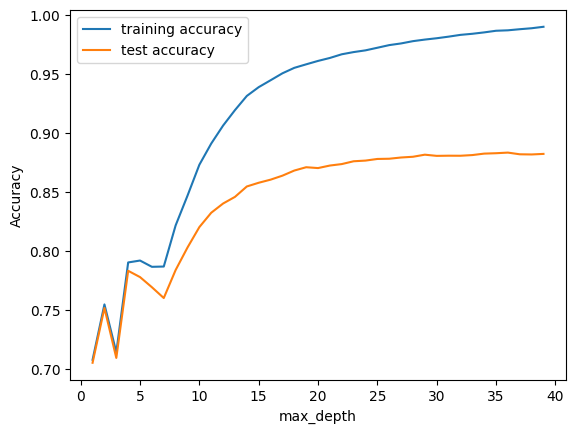

In [100]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Optimum Max Depth is 15 - 20

In [101]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [102]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.706863      0.129150         0.003224        0.003949   
1       1.353074      0.063599         0.002420        0.002946   
2       1.348596      0.138344         0.001511        0.002530   
3       1.171665      0.068319         0.003631        0.003687   
4       1.143319      0.046716         0.002229        0.003008   

   param_min_samples_leaf                    params  split0_test_score  \
0                       5   {'min_samples_leaf': 5}           0.840839   
1                      25  {'min_samples_leaf': 25}           0.777937   
2                      45  {'min_samples_leaf': 45}           0.763641   
3                      65  {'min_samples_leaf': 65}           0.750060   
4                      85  {'min_samples_leaf': 85}           0.739576   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.856088           0.853467           0.854420           0.852990   
1           0.775792           0.786038           0.788659           0.783178   
2           0.751966           0.757684           0.754825           0.764117   
3           0.763402           0.761973           0.747439           0.768168   
4           0.753395           0.762449           0.755063           0.771027   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.851561        0.005465                1            0.944127   
1         0.782321        0.004828                2            0.837265   
2         0.758447        0.004792                3            0.802180   
3         0.758208        0.008034                4            0.770670   
4         0.756302        0.010434                5            0.760960   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.944067            0.940255            0.943352   
1            0.823147            0.832202            0.839707   
2            0.790446            0.794139            0.790446   
3            0.789373            0.782523            0.766619   
4            0.771623            0.780975            0.771206   

   split4_train_score  mean_train_score  std_train_score  
0            0.940731          0.942507         0.001673  
1            0.827913          0.832047         0.006037  
2            0.793841          0.794210         0.004290  
3            0.787110          0.779259         0.009035  
4            0.784191          0.773791         0.008195

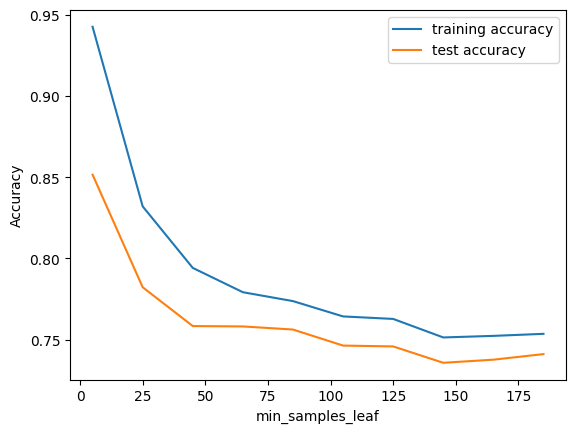

In [103]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Optimum Minimum Sample Leaf is 5 to 125

In [104]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [105]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.918565      0.180229         0.001812        0.003146   
1       1.739120      0.050423         0.002018        0.003116   
2       1.826351      0.207724         0.006340        0.005871   
3       1.657478      0.059360         0.001610        0.003221   
4       1.745742      0.249612         0.002019        0.003117   

   param_min_samples_split                     params  split0_test_score  \
0                        5   {'min_samples_split': 5}           0.874672   
1                       25  {'min_samples_split': 25}           0.835359   
2                       45  {'min_samples_split': 45}           0.803431   
3                       65  {'min_samples_split': 65}           0.783178   
4                       85  {'min_samples_split': 85}           0.764117   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.886347           0.890874           0.885156           0.881344   
1           0.845604           0.851084           0.833214           0.834644   
2           0.817012           0.823207           0.812723           0.811294   
3           0.794139           0.798427           0.793186           0.798189   
4           0.791041           0.784608           0.781511           0.786514   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.883679        0.005434                1            0.995116   
1         0.839981        0.007079                2            0.938051   
2         0.813533        0.006533                3            0.894985   
3         0.793424        0.005537                4            0.866154   
4         0.781558        0.009252                5            0.840481   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.994401            0.995711            0.995116   
1            0.933464            0.934120            0.929056   
2            0.890398            0.894270            0.892125   
3            0.859662            0.862283            0.864487   
4            0.847927            0.842268            0.844413   

   split4_train_score  mean_train_score  std_train_score  
0            0.994758          0.995020         0.000435  
1            0.930069          0.932952         0.003197  
2            0.895938          0.893543         0.002012  
3            0.871039          0.864725         0.003836  
4            0.849714          0.844961         0.003435

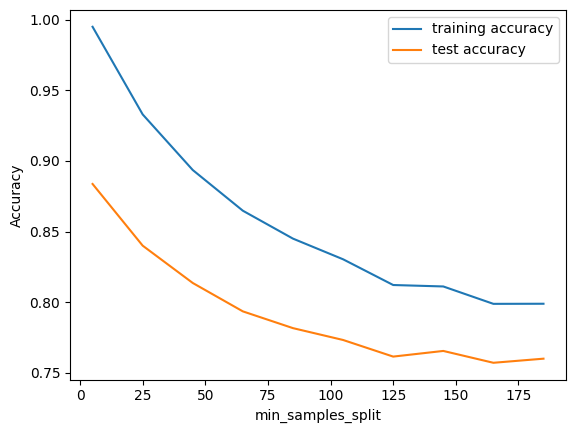

In [106]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Optimum samples split seems tobe 20-25

In [107]:
#Creating the final decison tree with all the hyperparmeters
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(5, 200, 20),
                         'min_samples_split': range(5, 200, 20)},
             refit='recall_score', return_train_score=True, verbose=1)

In [108]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.792599      0.007705         0.001606        0.003211   
1       1.785322      0.013740         0.003311        0.004059   
2       1.787974      0.007294         0.003015        0.003130   
3       1.829267      0.021207         0.004827        0.007689   
4       2.043300      0.047483         0.005322        0.004396   

  param_criterion  param_max_depth  param_min_samples_leaf  \
0         entropy                5                       5   
1         entropy                5                       5   
2         entropy                5                       5   
3         entropy                5                       5   
4         entropy                5                       5   

   param_min_samples_split                                             params  \
0                        5  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                       25  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                       45  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                       65  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                       85  {'criterion': 'entropy', 'max_depth': 5, 'min_...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.758637           0.758875           0.781749           0.785799   
1           0.758399           0.758399           0.781749           0.785799   
2           0.757446           0.758399           0.781749           0.785799   
3           0.758399           0.758399           0.780081           0.785799   
4           0.758399           0.758399           0.780081           0.785799   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.729330         0.762878        0.020204              157   
1           0.729092         0.762688        0.020312              158   
2           0.729092         0.762497        0.020356              170   
3           0.729330         0.762402        0.019929              173   
4           0.729569         0.762449        0.019850              171   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.766381            0.771623            0.789552   
1            0.766381            0.771086            0.789552   
2            0.766381            0.771086            0.789552   
3            0.766381            0.771086            0.787884   
4            0.766381            0.771086            0.787884   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.792352            0.739040          0.771789         0.019184  
1            0.792352            0.739040          0.771682         0.019186  
2            0.792352            0.739040          0.771682         0.019186  
3            0.792352            0.739040          0.771349         0.018885  
4            0.792352            0.739218          0.771384         0.018824

In [109]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8109602096735765
DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5)


In [110]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(df_train_pca,y_train)
y_pred_default = clf_gini.predict(df_test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[6797, 1382],
       [ 298,  517]], dtype=int64)

In [111]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.6343558282208589
Specificity:  0.8310306883482088
false postive rate:  0.16896931165179116
positive predictive value:  0.27224855186940494
Negative predictive value:  0.9579985905567301
Misclassification Rate:  0.1867911941294196


We have considerably reduced the misclassification rate, cmpared to the model with default hyper-parameters

## Random Forest Classifier with PCA

In [112]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')
# fit
rfc.fit(df_train_pca,y_train)
# Making predictions
y_pred_default = rfc.predict(df_test_pca)
confusion_rf=confusion_matrix(y_test,y_pred_default)

TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.1067484662576687
Specificity:  0.9948648979092799
false postive rate:  0.005135102090720137
positive predictive value:  0.6744186046511628
Negative predictive value:  0.9178793006204173
Misclassification Rate:  0.08561263064265065


We can improve the model further by tuning the hyperparamters

## Random Forest Classification + PCA with Hyperparameter tuning

In [113]:
#New Model with tuning max_depth
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)
rf_with_pca.fit(df_train_pca, y_train)

# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.284231      0.025213         0.031781        0.003547   
1      16.950086      0.235821         0.059637        0.004047   
2      23.610279      0.284272         0.086177        0.013836   
3      24.001038      1.381504         0.075814        0.011390   

   param_max_depth             params  split0_test_score  split1_test_score  \
0                2   {'max_depth': 2}           0.784608           0.774601   
1                7   {'max_depth': 7}           0.876102           0.880391   
2               12  {'max_depth': 12}           0.911604           0.914701   
3               17  {'max_depth': 17}           0.916607           0.917798   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.797713           0.801763           0.785323         0.788802   
1           0.888730           0.889445           0.889921         0.884918   
2           0.916607           0.914701           0.916845         0.914892   
3           0.921849           0.921134           0.919228         0.919323   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.009785                4            0.792054            0.788003   
1        0.005626                3            0.909876            0.913510   
2        0.001879                2            0.975220            0.975518   
3        0.001968                1            0.988861            0.989278   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.805158            0.794258            0.780260   
1            0.911246            0.909697            0.908744   
2            0.974923            0.973195            0.974684   
3            0.991482            0.989933            0.989755   

   mean_train_score  std_train_score  
0          0.791947         0.008149  
1          0.910615         0.001653  
2          0.974708         0.000807  
3          0.989862         0.000893

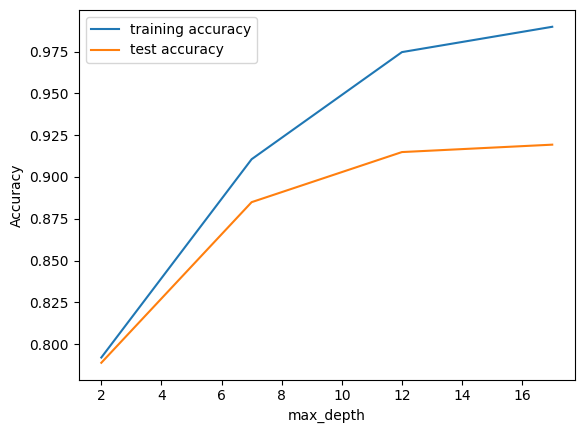

In [114]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Optimum depth is 12

In [115]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)
rf.fit(df_train_pca, y_train)

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      21.287479      0.381281         0.072398        0.005323   
1     111.385316      1.290305         0.376589        0.024281   
2     196.938307      0.627357         0.675261        0.025217   
3     261.073165     27.906078         0.797676        0.090212   

   param_n_estimators                  params  split0_test_score  \
0                 100   {'n_estimators': 100}           0.904456   
1                 500   {'n_estimators': 500}           0.906362   
2                 900   {'n_estimators': 900}           0.904217   
3                1300  {'n_estimators': 1300}           0.904932   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.909936           0.910889           0.910412           0.914701   
1           0.908744           0.912557           0.909936           0.915178   
2           0.907553           0.912557           0.909697           0.913748   
3           0.907791           0.912318           0.908983           0.914224   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.910079        0.003279                2            0.958184   
1         0.910555        0.003054                1            0.960031   
2         0.909554        0.003438                4            0.959733   
3         0.909650        0.003293                3            0.960388   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.956636            0.955861            0.956874   
1            0.959316            0.959137            0.959316   
2            0.958899            0.958661            0.958721   
3            0.958661            0.958959            0.959733   

   split4_train_score  mean_train_score  std_train_score  
0            0.958363          0.957184         0.000953  
1            0.960031          0.959566         0.000385  
2            0.960388          0.959280         0.000675  
3            0.960686          0.959685         0.000784

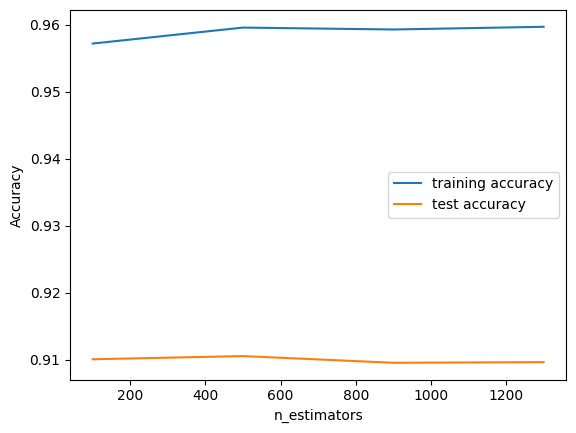

In [116]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As the estimators increase, there is a small improvement in the accuracy till 500 estimators

In [117]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)
rf.fit(df_train_pca, y_train)

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      12.023380      0.333128         0.088002        0.012215   
1      24.482187      0.197831         0.081658        0.012187   
2      42.275836      0.403728         0.074227        0.013395   
3      59.461593      0.317415         0.070914        0.000930   
4      67.088977      5.856080         0.062753        0.014084   

   param_max_features                params  split0_test_score  \
0                   4   {'max_features': 4}           0.904694   
1                   8   {'max_features': 8}           0.903979   
2                  14  {'max_features': 14}           0.906362   
3                  20  {'max_features': 20}           0.902549   
4                  24  {'max_features': 24}           0.900167   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.906838           0.914224           0.908744           0.916131   
1           0.907553           0.911842           0.910412           0.914701   
2           0.909459           0.910650           0.908506           0.912318   
3           0.903979           0.908983           0.910650           0.912318   
4           0.907315           0.908268           0.904932           0.910412   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.910126        0.004361                1            0.959554   
1         0.909697        0.003673                2            0.959257   
2         0.909459        0.002005                3            0.957529   
3         0.907696        0.003796                4            0.956993   
4         0.906219        0.003500                5            0.954134   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.958899            0.958125            0.958840   
1            0.959018            0.956040            0.956755   
2            0.957112            0.956934            0.954789   
3            0.951394            0.954372            0.953836   
4            0.952943            0.952287            0.952645   

   split4_train_score  mean_train_score  std_train_score  
0            0.961282          0.959340         0.001071  
1            0.959495          0.958113         0.001427  
2            0.955504          0.956374         0.001045  
3            0.954372          0.954193         0.001781  
4            0.952526          0.952907         0.000649

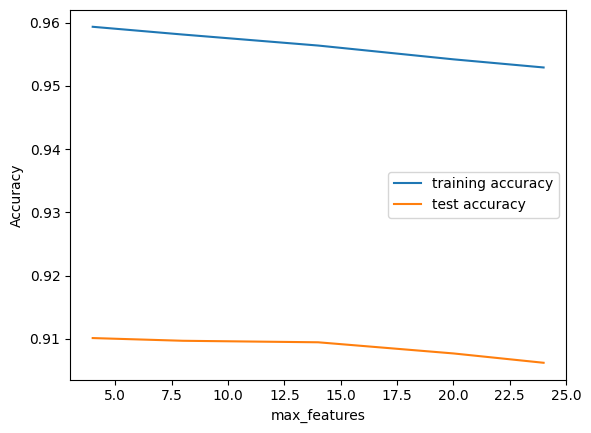

In [118]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

5- 7 features seem to be optimum.

In [119]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)
rf.fit(df_train_pca, y_train)

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      16.363235      0.088939         0.073008        0.007154   
1      15.261902      0.240301         0.065798        0.007893   
2      14.425840      0.214459         0.061126        0.009830   
3      12.919738      0.245706         0.073123        0.010545   
4      12.586304      0.045198         0.049978        0.003385   

   param_min_samples_leaf                     params  split0_test_score  \
0                     100  {'min_samples_leaf': 100}           0.855611   
1                     150  {'min_samples_leaf': 150}           0.844889   
2                     200  {'min_samples_leaf': 200}           0.835835   
3                     250  {'min_samples_leaf': 250}           0.821063   
4                     300  {'min_samples_leaf': 300}           0.820586   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.850846           0.855373           0.859185           0.872051   
1           0.836073           0.838218           0.852990           0.853705   
2           0.832738           0.830832           0.841315           0.842507   
3           0.816536           0.823445           0.839647           0.834644   
4           0.816536           0.810341           0.824637           0.832261   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.858613        0.007222                1            0.877174   
1         0.845175        0.007282                2            0.861091   
2         0.836645        0.004602                3            0.851978   
3         0.827067        0.008669                4            0.839171   
4         0.820872        0.007398                5            0.836252   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.879616            0.872885            0.873838   
1            0.860079            0.852871            0.858351   
2            0.850250            0.846497            0.845247   
3            0.836252            0.834465            0.840124   
4            0.831129            0.825113            0.829998   

   split4_train_score  mean_train_score  std_train_score  
0            0.877770          0.876257         0.002515  
1            0.854718          0.857422         0.003144  
2            0.842685          0.847331         0.003369  
3            0.836490          0.837300         0.002062  
4            0.824279          0.829354         0.004356

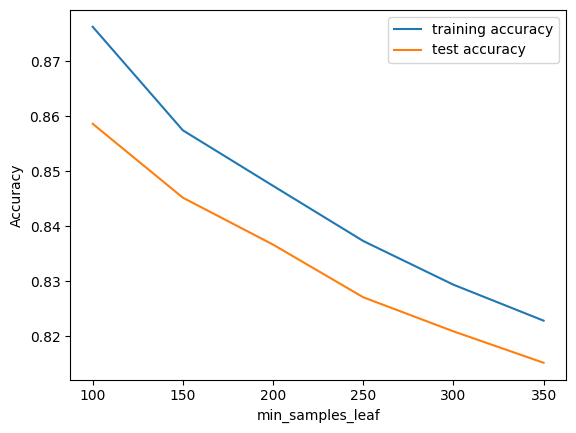

In [120]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

100 - 150 leaf samples seems to be the optimum

In [121]:
# GridSearchCV to find optimal min_samples_split
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True,n_jobs=-1)
rf.fit(df_train_pca, y_train)

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      21.063792      0.153461         0.079573        0.004183   
1      21.202521      0.689967         0.072425        0.011118   
2      20.830072      0.526851         0.080384        0.010759   
3      19.445338      0.448759         0.066188        0.013052   
4      19.271238      0.670407         0.070916        0.006529   

   param_min_samples_split                      params  split0_test_score  \
0                      200  {'min_samples_split': 200}           0.880867   
1                      250  {'min_samples_split': 250}           0.872766   
2                      300  {'min_samples_split': 300}           0.869192   
3                      350  {'min_samples_split': 350}           0.859423   
4                      400  {'min_samples_split': 400}           0.852275   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.882535           0.881106           0.884680           0.890160   
1           0.869669           0.866571           0.877055           0.883965   
2           0.861806           0.863950           0.870145           0.875149   
3           0.855849           0.856564           0.863950           0.867286   
4           0.852514           0.852514           0.858470           0.864665   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.883869        0.003425                1            0.911187   
1         0.874005        0.006068                2            0.899214   
2         0.868049        0.004730                3            0.891113   
3         0.860615        0.004386                4            0.882952   
4         0.856088        0.004885                5            0.869192   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.912020            0.905647            0.907613   
1            0.899392            0.891411            0.894270   
2            0.888492            0.882654            0.886526   
3            0.879378            0.874970            0.878663   
4            0.874077            0.867703            0.870324   

   split4_train_score  mean_train_score  std_train_score  
0            0.907076          0.908709         0.002464  
1            0.894925          0.895842         0.003063  
2            0.884143          0.886586         0.003018  
3            0.876340          0.878461         0.002747  
4            0.868358          0.869931         0.002251

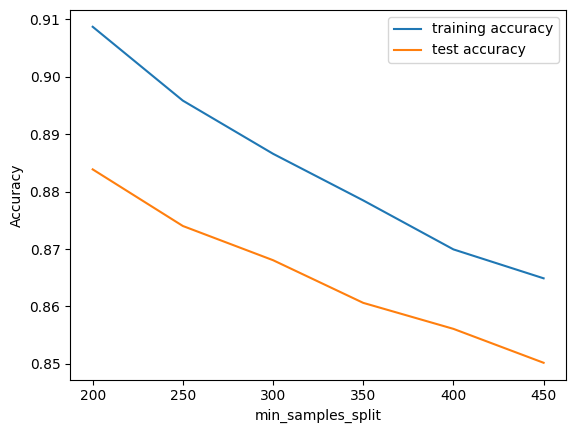

In [122]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

200-250 is the optimum range of minimum samples split.

In [123]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
We can get accuracy of 0.8595663569216108 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [124]:
#Building a model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=300)
# fit
rfc.fit(df_train_pca,y_train)
# predict
y_pred_default = rfc.predict(df_test_pca)

print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      8179
           1       0.35      0.70      0.47       815

    accuracy                           0.86      8994
   macro avg       0.66      0.79      0.69      8994
weighted avg       0.91      0.86      0.88      8994

[[7129 1050]
 [ 245  570]]
accuracy_score:   0.8560151211919057


In [125]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.8560151211919057
Sensitivity:  0.6993865030674846
Specificity:  0.8716224477319966
false postive rate:  0.12837755226800343
positive predictive value:  0.35185185185185186
Negative predictive value:  0.9667751559533496
Misclassification Rate:  0.1439848788080943


## PCA Model Performances

#### Logistic Regression with PCA
- Accuracy Score on test data:  0.82 approx
- Sensitivity:  0.80 approx
- Specificity:  0.81 approx
- False postive rate:  0.18 approx
- Precision:  0.30 approx
- Recall:  0.97 approx
- Misclassification Rate:  0.18 approx

#### Decision Tree Classifier with PCA
- Sensitivity:  0.64 approx
- Specificity:  0.81 approx
- False postive rate:  0.18 approx
- Precision:  0.26 approx
- Recall:  0.95 approx
- Misclassification Rate:  0.19 approx

#### Random Forest Classifier with PCA
- Accuracy Score:   0.86 approx
- Sensitivity:  0.69 approx
- Specificity:  0.88 approx
- False postive rate:  0.11 approx
- Precision:  0.37 approx
- Recall:  0.96 approx
- Misclassification Rate:  0.13 approx

In terms of overall accuracy the Random Forest classifier performs best, but since we are dealing with a business problem which requires the churn prediction to be optimum, our model metric should be Sensitivity. Thus, the Logistic Regression Model performs the best and can be used to perform the prediction.

## Random Forest on all Features without PCA + Hyperparameter Tuning

In [126]:
# specify number of folds for k-fold CV
n_folds = 5

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [300,400,500], 
    'max_features': [15, 20]
}

# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, verbose = 1, n_jobs=-1,return_train_score=True)

# fit
grid_search.fit(X_train,y_train)

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
We can get accuracy of 0.8717655468191565 using {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 150, 'min_samples_split': 200, 'n_estimators': 500}


In [127]:
#Creating a model with the best parameters
rfc_final = RandomForestClassifier(bootstrap=True,class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=150, 
                             min_samples_split=200,
                             max_features=15,
                             n_estimators=500)

# fit
rfc_final.fit(X_train,y_train)

# predict
predictions = rfc_final.predict(X_test)

confusion_rm_f = metrics.confusion_matrix( y_test, predictions )
TN = confusion_rm_f[0,0] # true positive 
TP = confusion_rm_f[1,1] # true negatives
FP = confusion_rm_f[0,1] # false positives
FN = confusion_rm_f[1,0] # false negatives

print('Accuracy Score: ',accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('Positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.8663553480097843
Sensitivity:  0.838036809815951
Specificity:  0.8691771610221298
False postive rate:  0.13082283897787014
Positive predictive value:  0.38961779806046776
Negative predictive value:  0.9817704736914791
Misclassification Rate:  0.1336446519902157


The model gives an accuracy of 87% and a Sensitivity of 82%, which is quite good.

## Feature Importance of the Final Random Forest Model

In [128]:
#feature_names=list(X_train.columns.values)
feature_names=X.columns
important_features_dict = {}
for name, importance in zip(feature_names, rfc_final.feature_importances_):
    important_features_dict[name]=importance
#Sorting Dictionary in descending order of the importance variable
d_descending = OrderedDict(sorted(important_features_dict.items(),key=lambda kv: kv[1], reverse=True))

#Feature Importance Top 15 Features
dic= dict(d_descending)

from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n=15
n_items = take(n, dic.items())
print('These are top 12 driver variable: ',n_items)

These are top 12 driver variable:  [('arpu_diff', 0.15959344255673308), ('roam_ic_mou_8', 0.15164620551120594), ('arpu_8', 0.14761753282998702), ('last_day_rch_amt_8', 0.10107533710626139), ('max_rech_amt_8', 0.06590064572163772), ('roam_ic_mou_diff', 0.05327936113267648), ('std_og_mou_diff', 0.04216827176736074), ('date_of_last_rech_8', 0.033996930475487214), ('total_rech_num_diff', 0.03202750491415343), ('max_rech_amt_diff', 0.025982071341525033), ('loc_ic_mou_diff', 0.021089134798905645), ('offnet_mou_diff', 0.01400359187176577), ('onnet_mou_diff', 0.012135913776841485), ('loc_og_mou_diff', 0.011322839569158659), ('date_of_last_rech_data_8', 0.00988098748792212)]


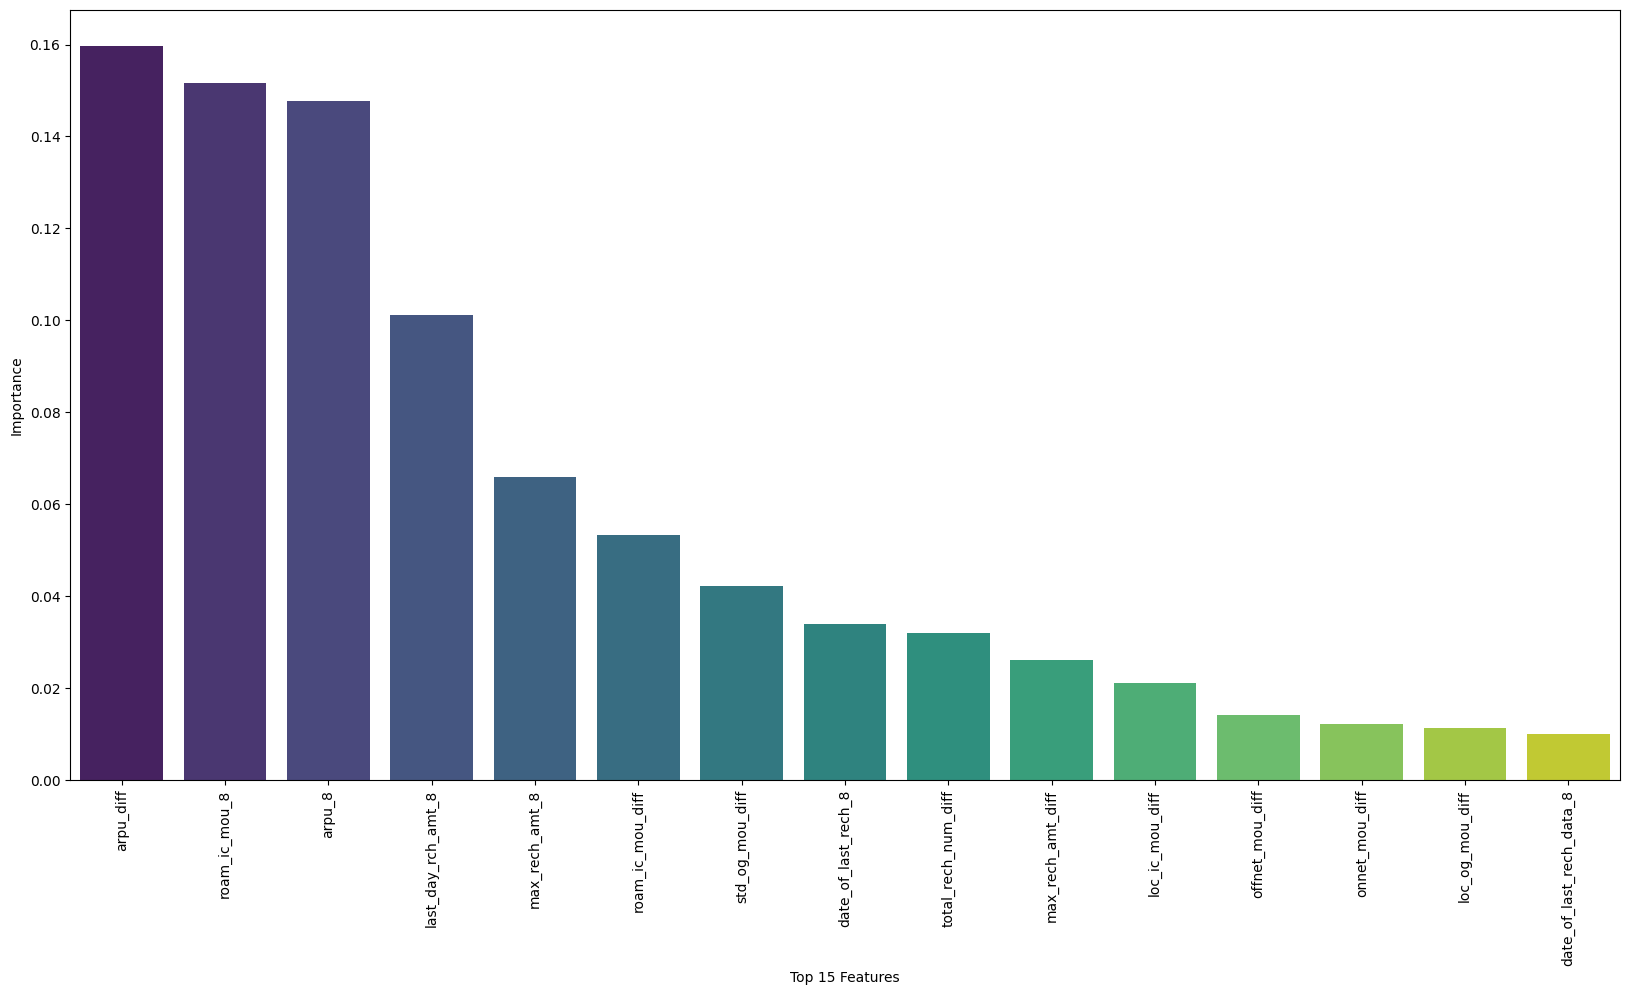

In [129]:
#Plotting the important Features
imp=rfc_final.feature_importances_
#names=X_train.columns.values
names=X.columns
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)


plt.figure(figsize=(20, 10))

ax = sns.barplot(x='Variable', y= 'importance', data=df_2[0:15], palette='viridis')
ax.set(xlabel = 'Top 15 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

In [130]:
end = time.time()
print("Total Time taken to run the full script is ",end - start)

Total Time taken to run the full script is  7729.763511896133


# Important churn indicators & Actionable recommendations


### Average_Revenue_Per_User(arpu) in August :
This is one of the most important factor for the Churn, If the candidate has arpu in August is low than high chance is that it will churn
### Roaming_Incoming_Calls_monthly_usage in August :
This means the person has transferred to a new geographic location hence the person is in roaming therefore not using this number anymore even for incoming calls.
### Last_recharge_amount & Maximum_recharge_amount  in August :
Since the last recharge is cruicial in continuing the service hence this is also an important churn factor. If the last recharge amount is lower thant the previous amount than the person is likely to churn.
### STD Outgoing Calls_monthly_usage difference with respect to earlier months :
Difference in average of Outgoing Calls in june and July w.r.t August, STD calls,Local Calls are important parameters because as the difference is increasing the customer is likely to churn out of the service provider
### Recharge amount difference with respect to earlier months :
Difference in average of recharge amount in june and July w.r.t August, STD calls,Local Calls are important parameters because as the difference is increasing the customer is likely to churn out of the service provider
### On Net Calls monthly difference with respect to earlier monthst :
Difference in average of in network calls in june and July w.r.t August, STD calls,Local Calls are important parameters because as the difference is increasing the customer is likely to churn out of the service provider

#### Hence as soon as the about indicators show up make sure the candidate is offered promotional offers to continue service





